# Planteamiento del proyecto

Se ha desarrollado un nuevo sistema de detección temprana de patologías cardiovasculares. Sin embargo, hacer la prueba y el diagnóstico es un proceso costoso y lento. Por lo tanto, tu compañía te pide desarrollar un algoritmo para eliminar casos que no requieren de una detección tan fina.

El dataset a utilizar es el que aparece en la carpeta: [Cardiovascular Disease Dataset](./Cardiovascular_Disease_Dataset.csv)

In [1]:
# Importación de algunas librerías
import pandas as pd 

rn_state = 42

Variables del dataset:
- ***patientid:*** Numero identificativo del paciente(único).
- ***age:*** Edad.
- ***gender:*** Género, 0 (female), 1 (male).
- ***chestpain:*** Tipo de dolor en el pecho,  0 (angina típica), 1 (angina atípica), 2 (dolor no anginoso), 3 (asintomático).
- ***restingBP:*** Presión arterial en reposo, 94-200 (in mm HG).
- ***serumcholestrol:*** Colesterol sérico, 126-564 (in mg/dl).
- ***fastingbloodsugar:*** Glucemia en ayunas, 0 (false), 1 (true) > 120 mg/dl.
- ***restingelectro:***  Resultados del electrocardiograma en reposo, 0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy).
- ***maxheartrate:*** Frecuencia cardíaca máxima alcanzada, 71-202.
- ***exerciseangia:*** Angina inducida por el ejercicio, 0 (no), 1 (yes).
- ***oldpeak:*** Viejo pico = ST, 0-6.2.
- ***slope:*** Pendiente del segmento ST del ejercicio máximo, 1 (pendiente ascendente), 2 (plana), 3 (pendiente descendente).
- ***noofmajorvessels:*** Número de vasos mayores (0, 1, 2, 3).
- ***tarjet*** Clasificación resultado 0 (Ausencia de enfermedad cardíaca), 1 (Presencia de enfermedad cardíaca).

## 1. Primer contacto con los datos

En este apartado cargaremos los datos y realizaremos una exploración de los mismos.

### 1.1. Carga de los datos

Cargaremos los datos en un dataframe de pandas.


In [2]:
df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df_cardiovascular.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


### 1.2. Limpieza de los datos

En este apartado realizaremos una limpieza de los datos.
- Obtenemos información del dataset.
- Sacamos los parámetros estadísticos más relevantes de las variables
- Identificamos y eliminamos los valores nulos y duplicados.
- Realizamos una transformación de variables para que sean más fáciles de analizar, si es necesario.
- Eliminamos las variables que no aportan ninguna información relevante.


In [3]:
# Mostramos información de los datos
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [4]:
# Hacemos un resumen de las métricas estadísticas más relevantes de los datos
df_cardiovascular.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [5]:
# Vemos la cantidad de valores NaN que hay
df_cardiovascular.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [6]:
# Vemos la cantidad de valores duplicados que hay
df_cardiovascular.duplicated().sum()

0

No tenemos ni valores perdidos(NaN) ni duplicados. Sólo tenemos que eliminar la variable **patientid**, que no aporta ninguna información relevante, antes de hacer un análisis más exaustivo.

In [7]:
df_cardiovascular_clean = df_cardiovascular.drop(columns='patientid')
df_cardiovascular_clean.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


### 1.3. EDA 

En esta etapa vamos a realizar un análisis más exaustivo de las variables.
- Veremos la distribución de las variables numéricas.
- Veremos la relación entre las variables numéricas y categóricas.
- Veremos la relación entre las variables categóricas.

#### 1.3.1. Distribución de las variables numéricas

En este apartado vamos a ver la distribución de las variables numéricas.



<Axes: >

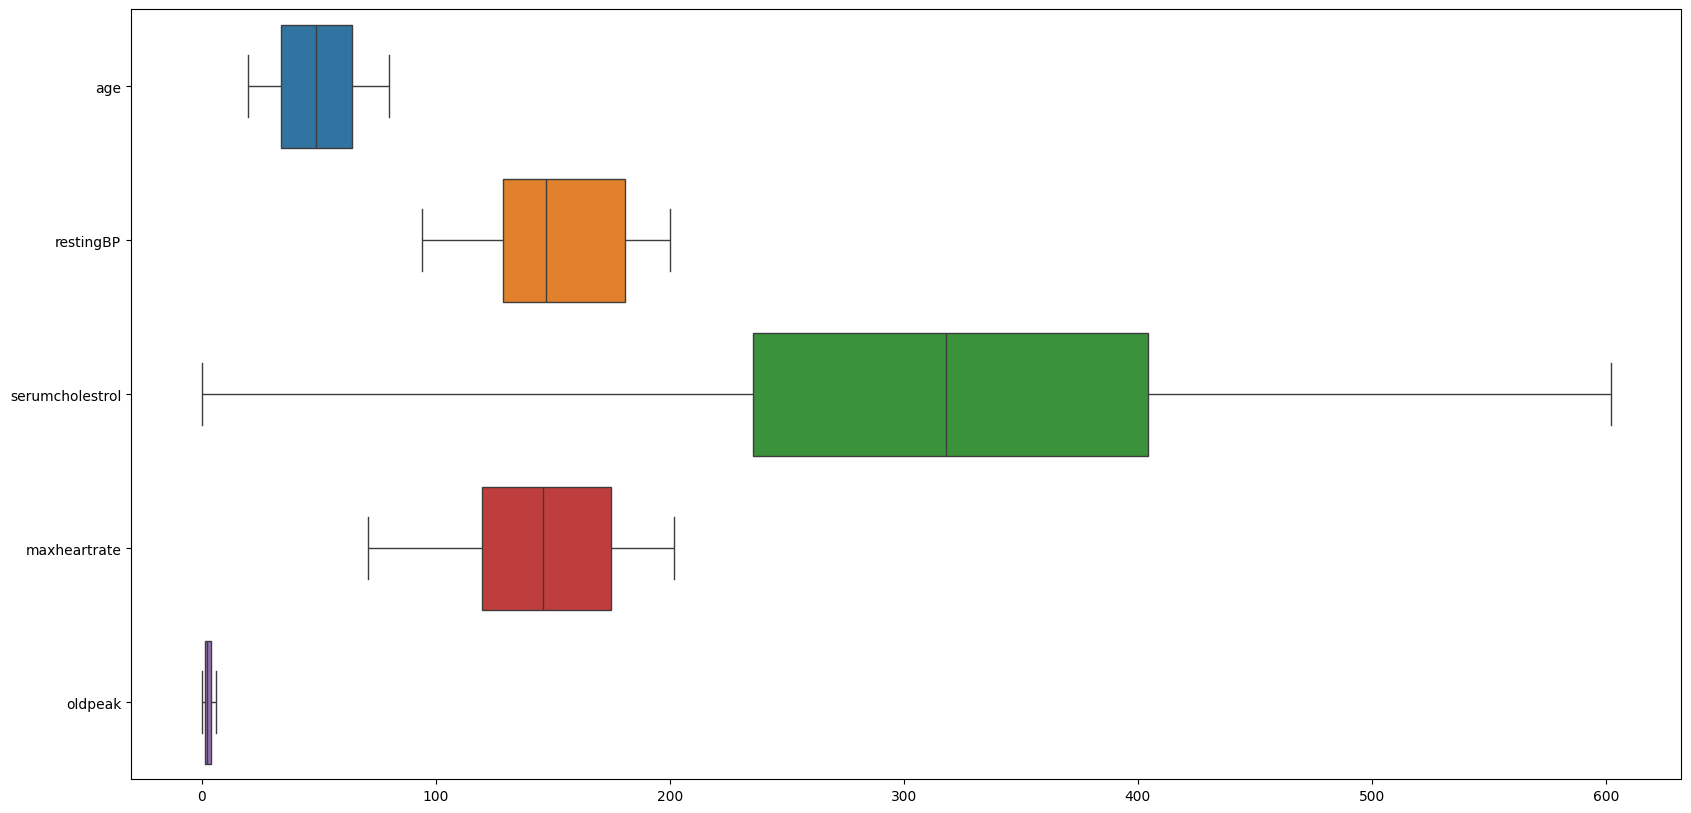

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir un umbral para el número máximo de valores únicos que puede tener una columna categórica
threshold = 10

# Identificar columnas numéricas basadas en el umbral de valores únicos
numerical_columns = [col for col in df_cardiovascular_clean.columns if df_cardiovascular_clean[col].nunique() > threshold]

df_cardiovascular_numerical = df_cardiovascular_clean[numerical_columns]

plt.figure(figsize = (20, 10))
sns.boxplot(data = df_cardiovascular_numerical, orient = "h")

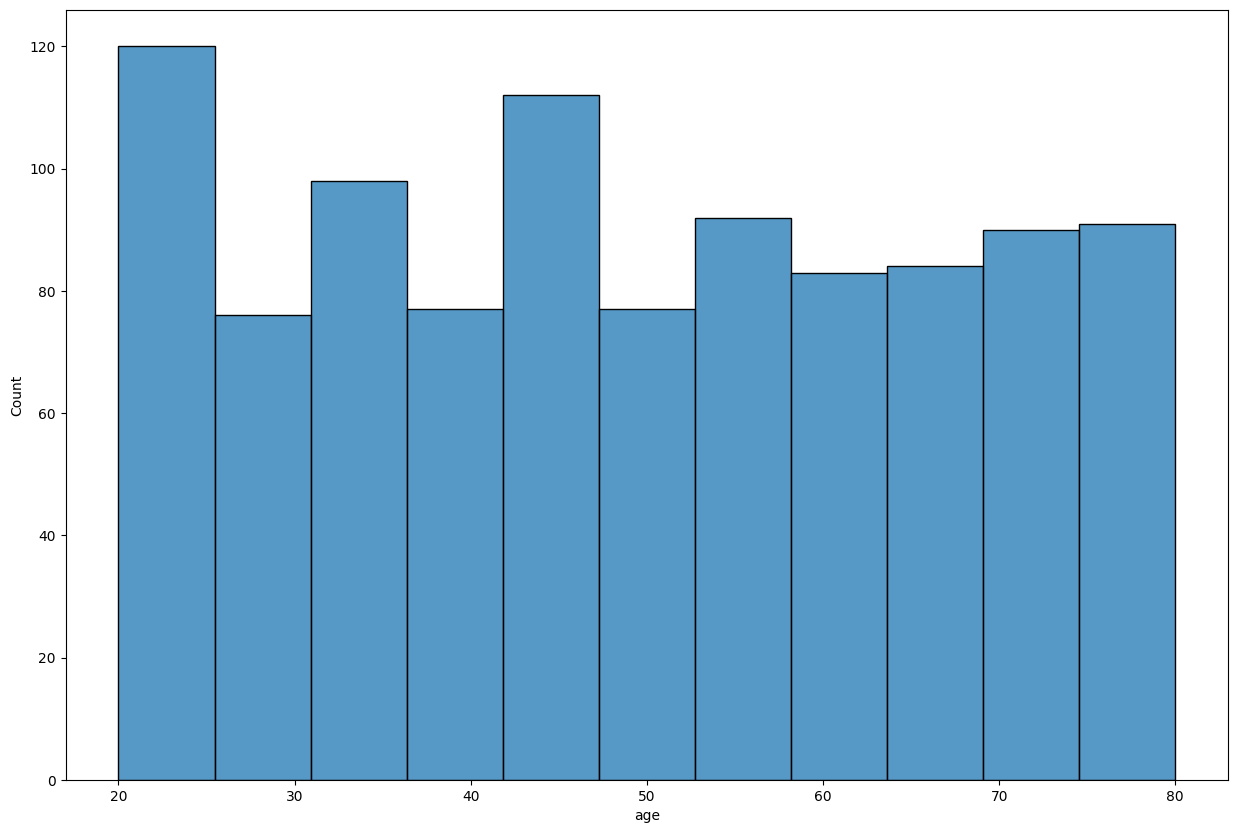

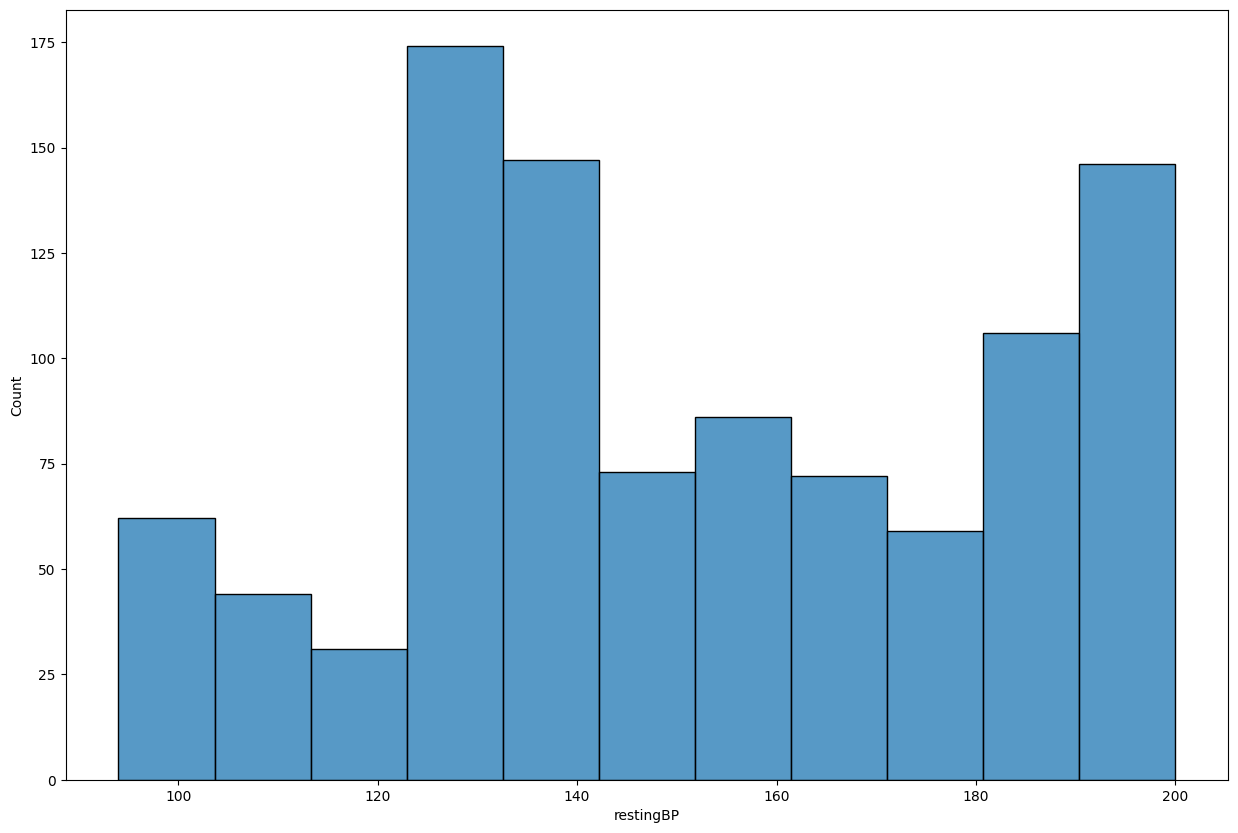

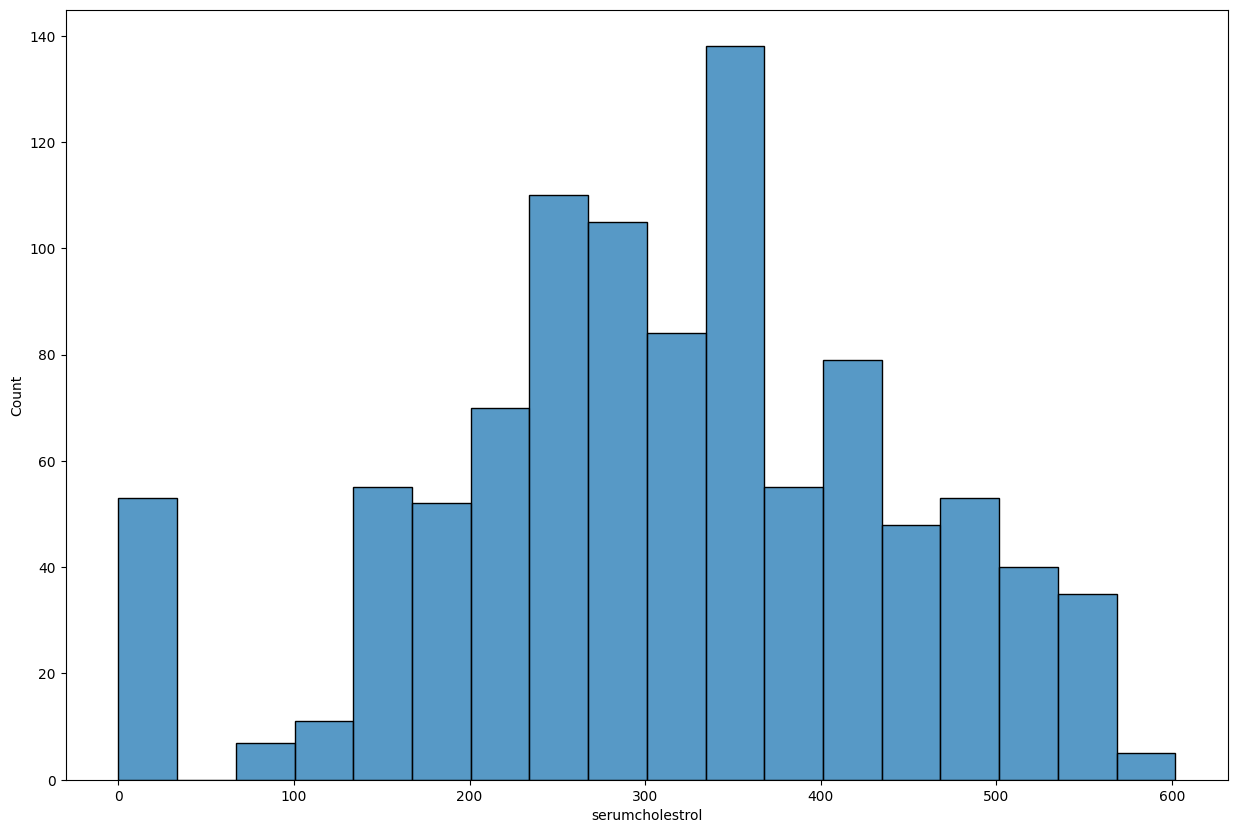

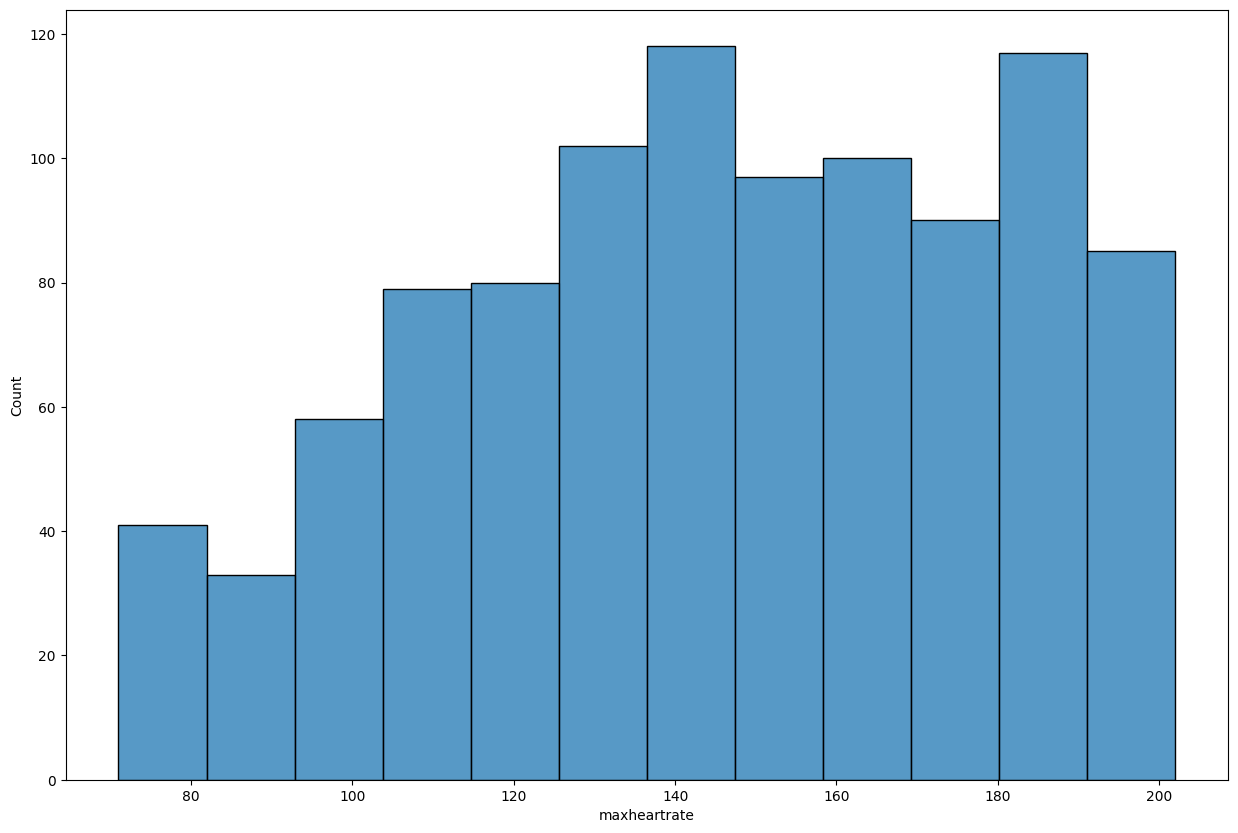

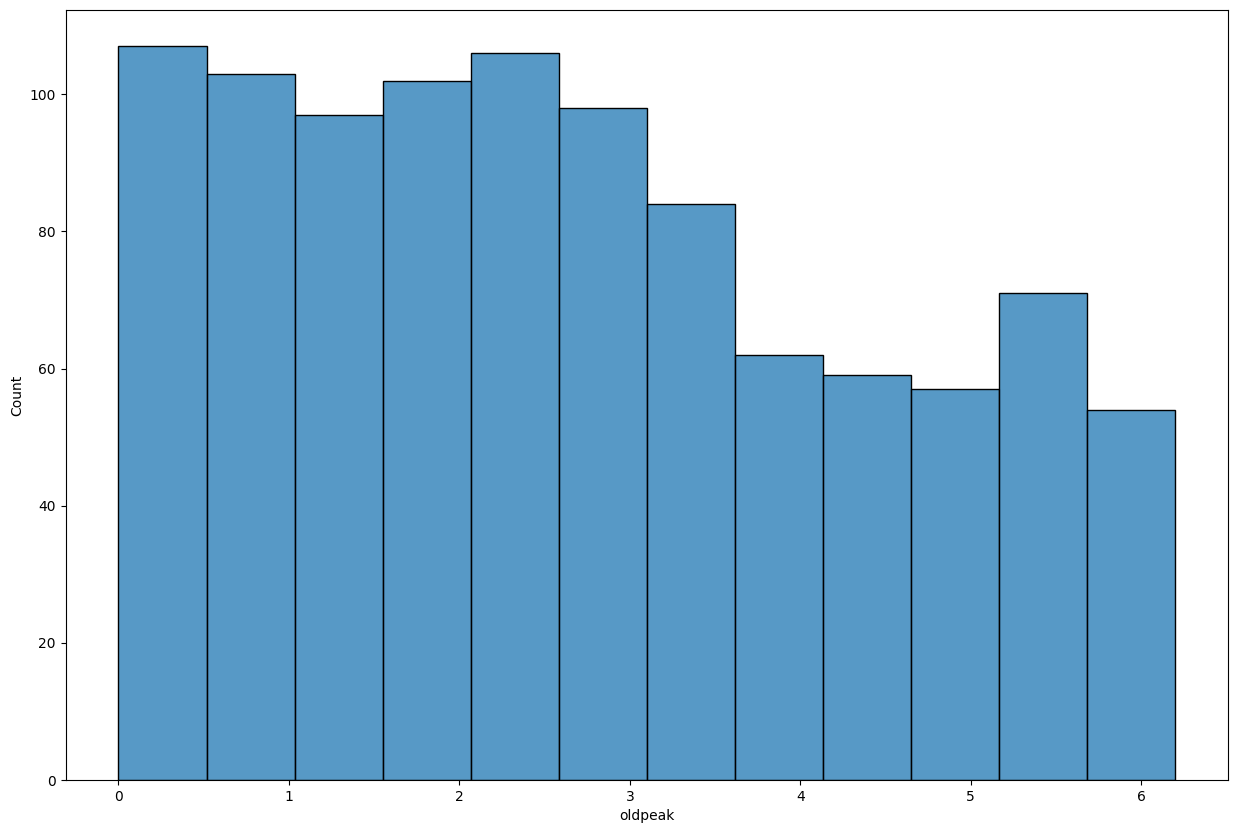

In [9]:
# Veamos los histogramas de las  variables numéricas
for col in numerical_columns:
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_cardiovascular_numerical[col])

#### 1.3.2. Relación entre las variables numéricas y categóricas

En este apartado vamos a ver la relación entre las variables numéricas y categóricas.

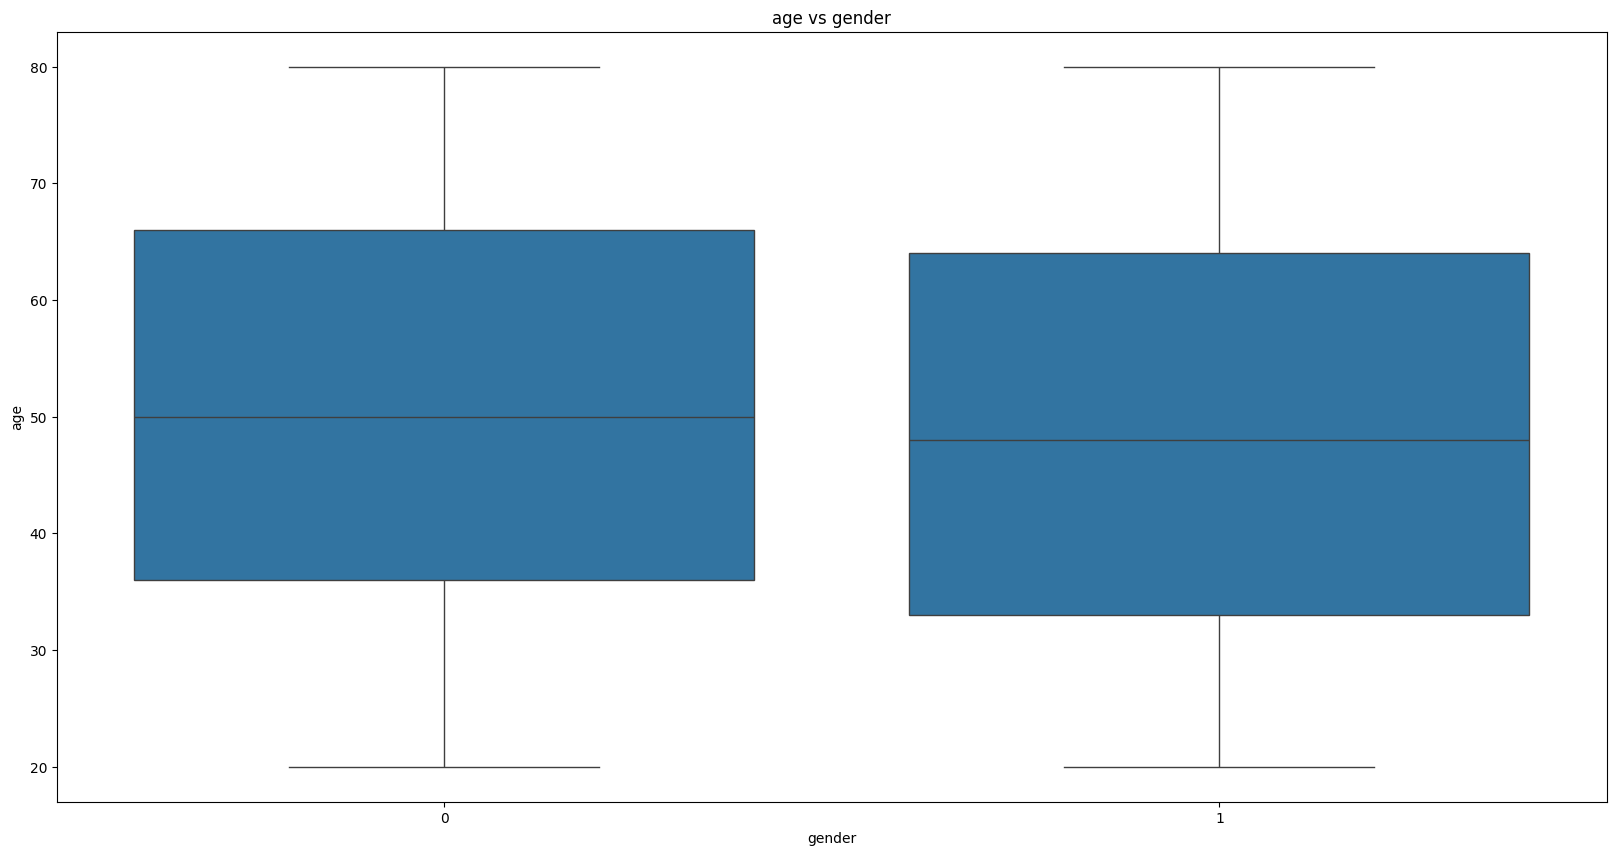

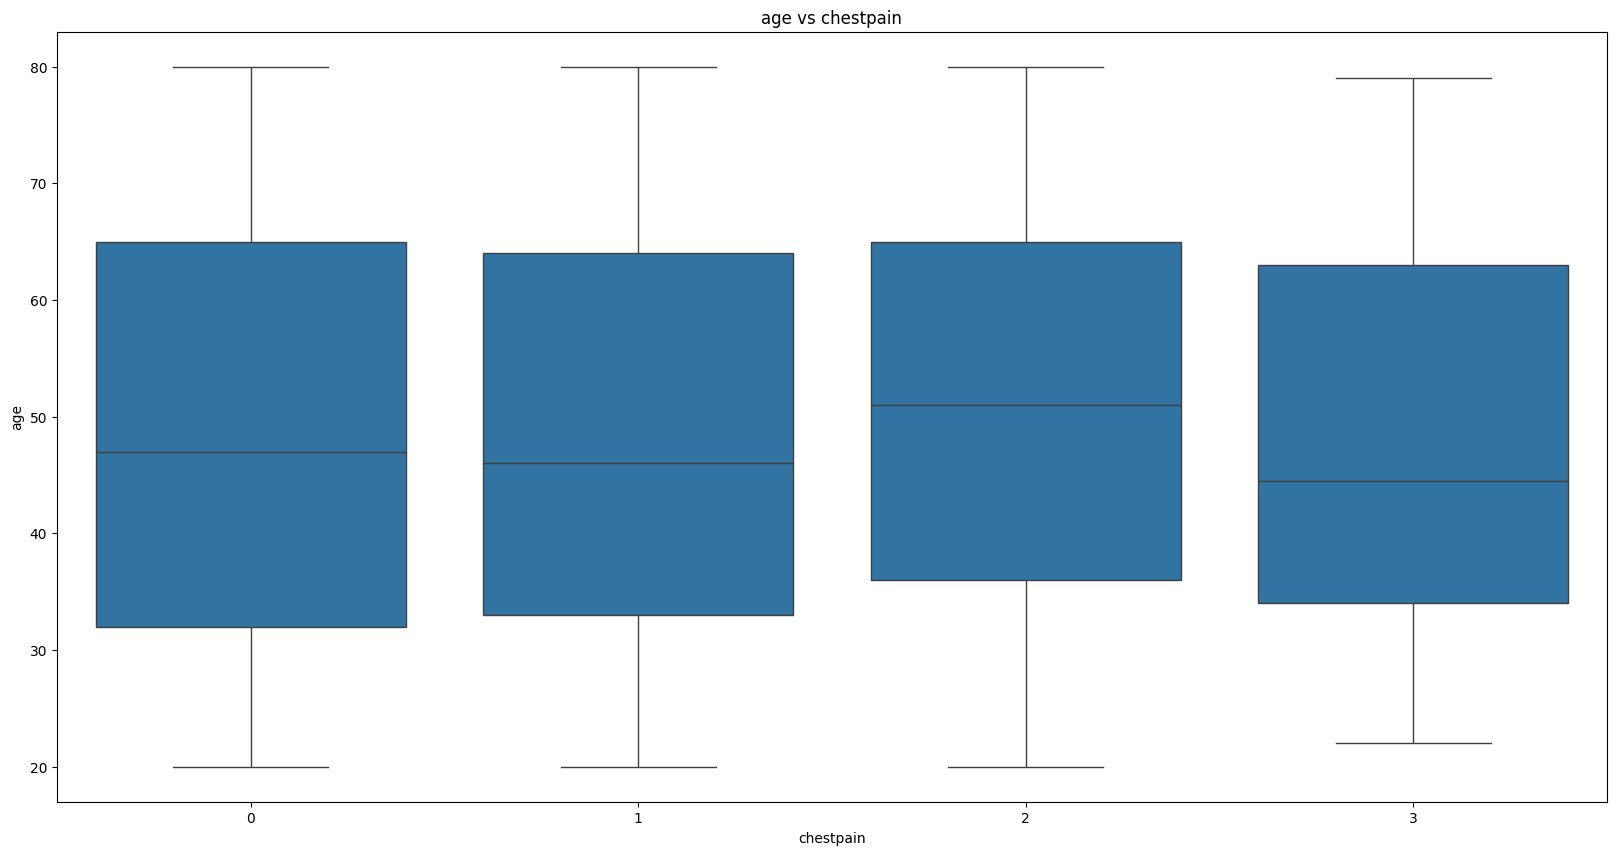

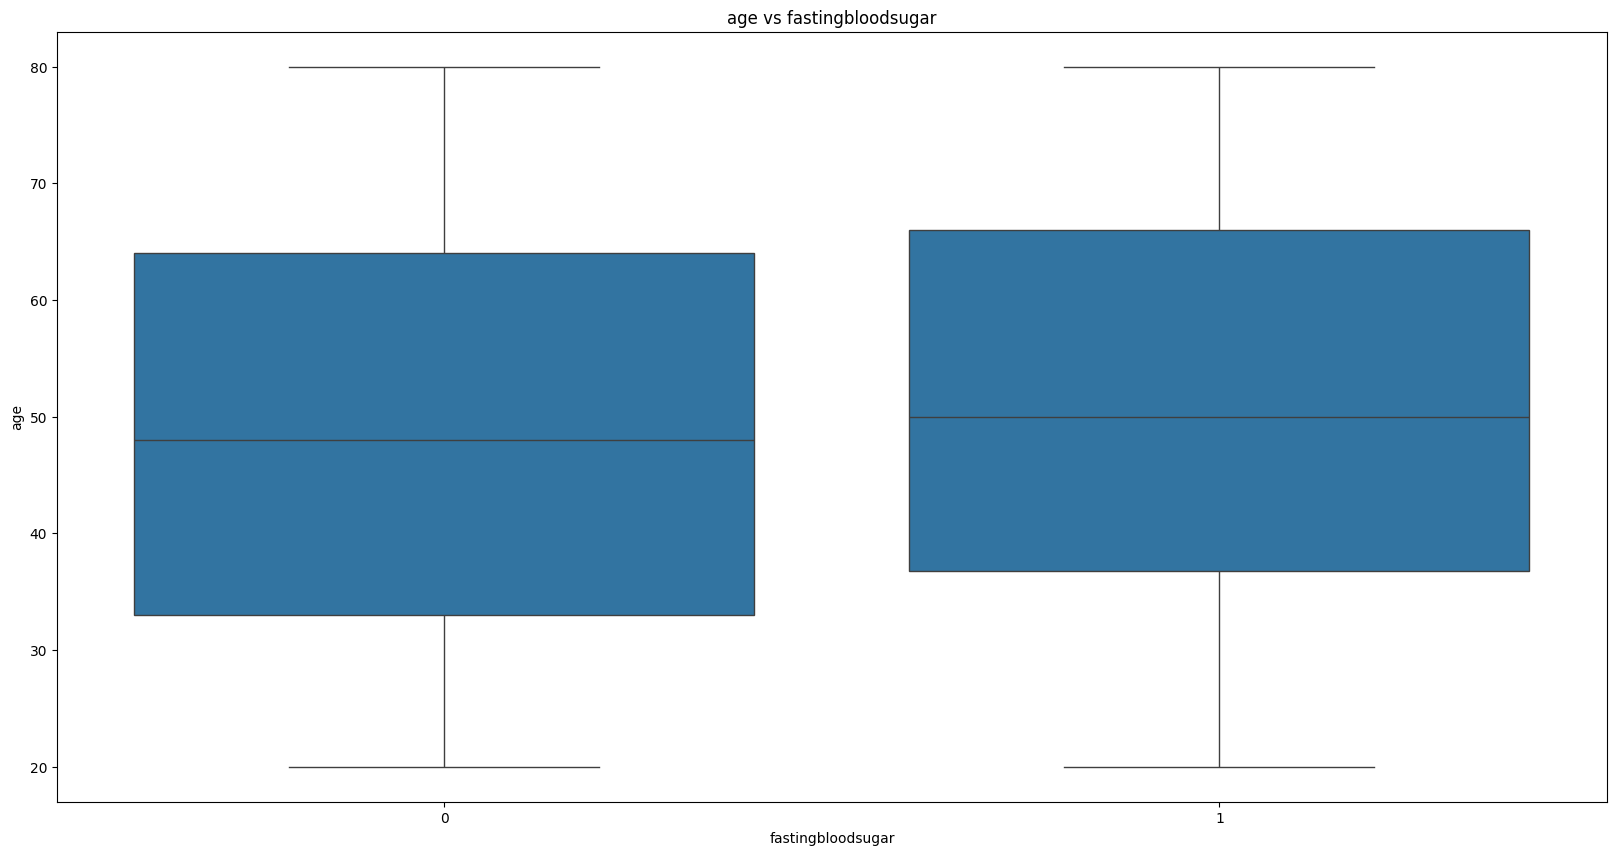

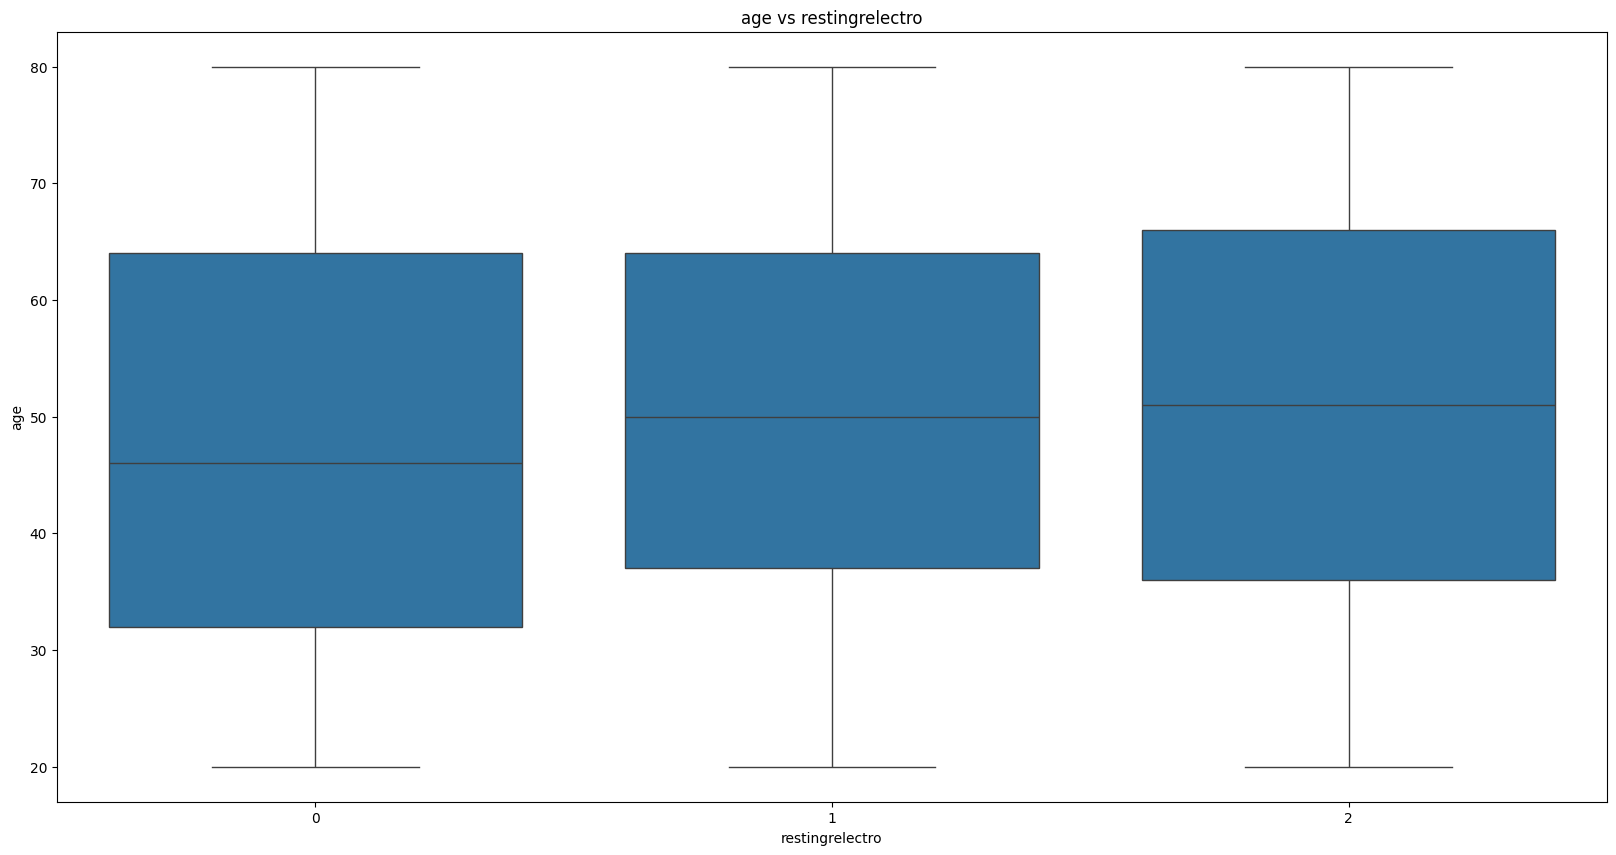

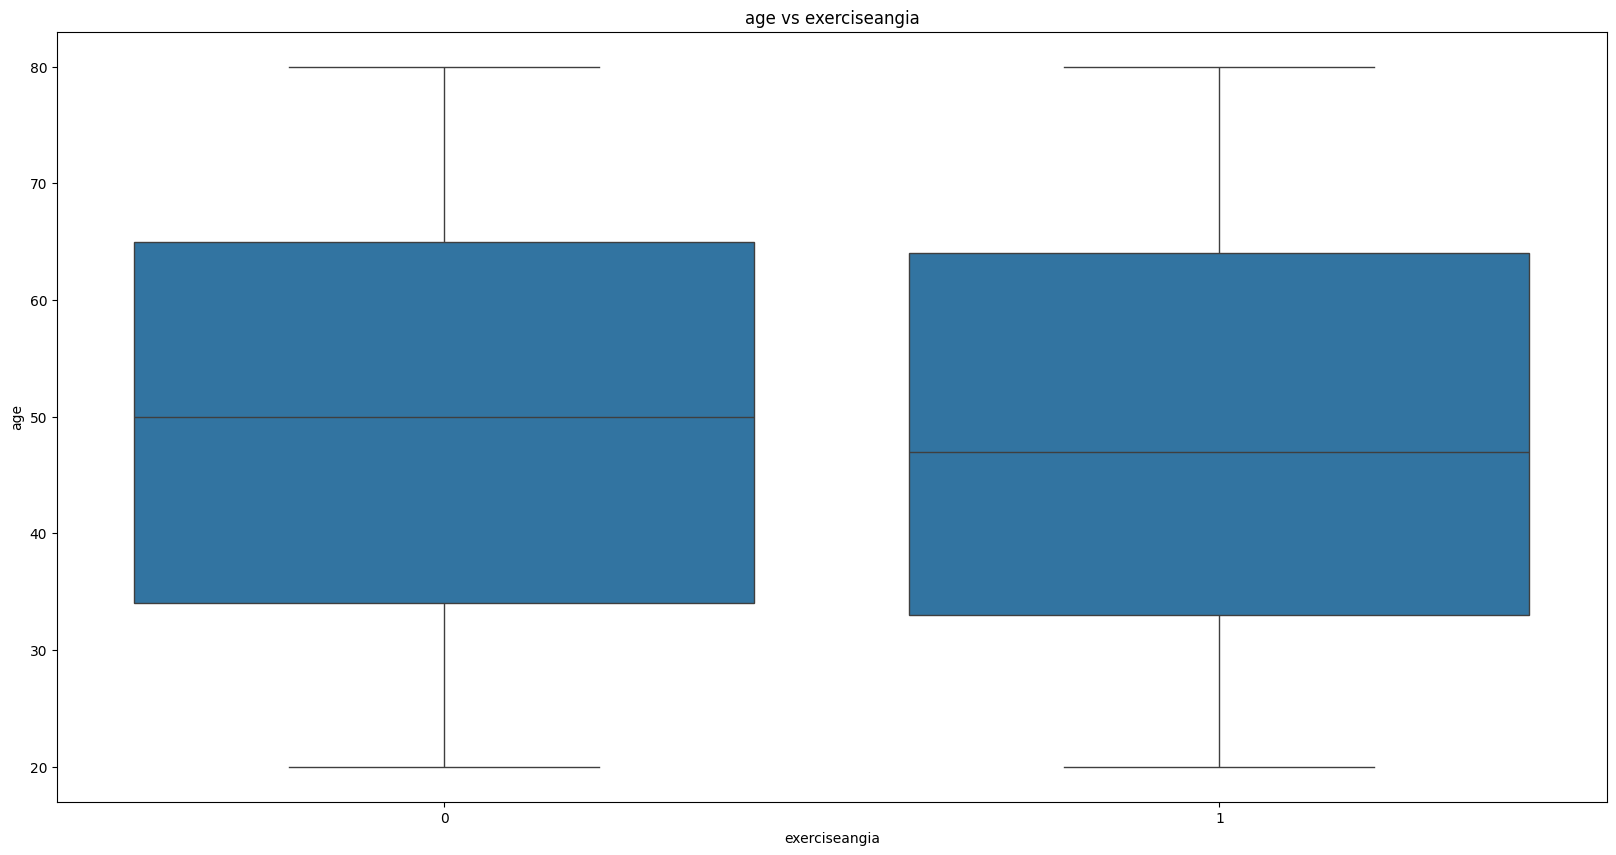

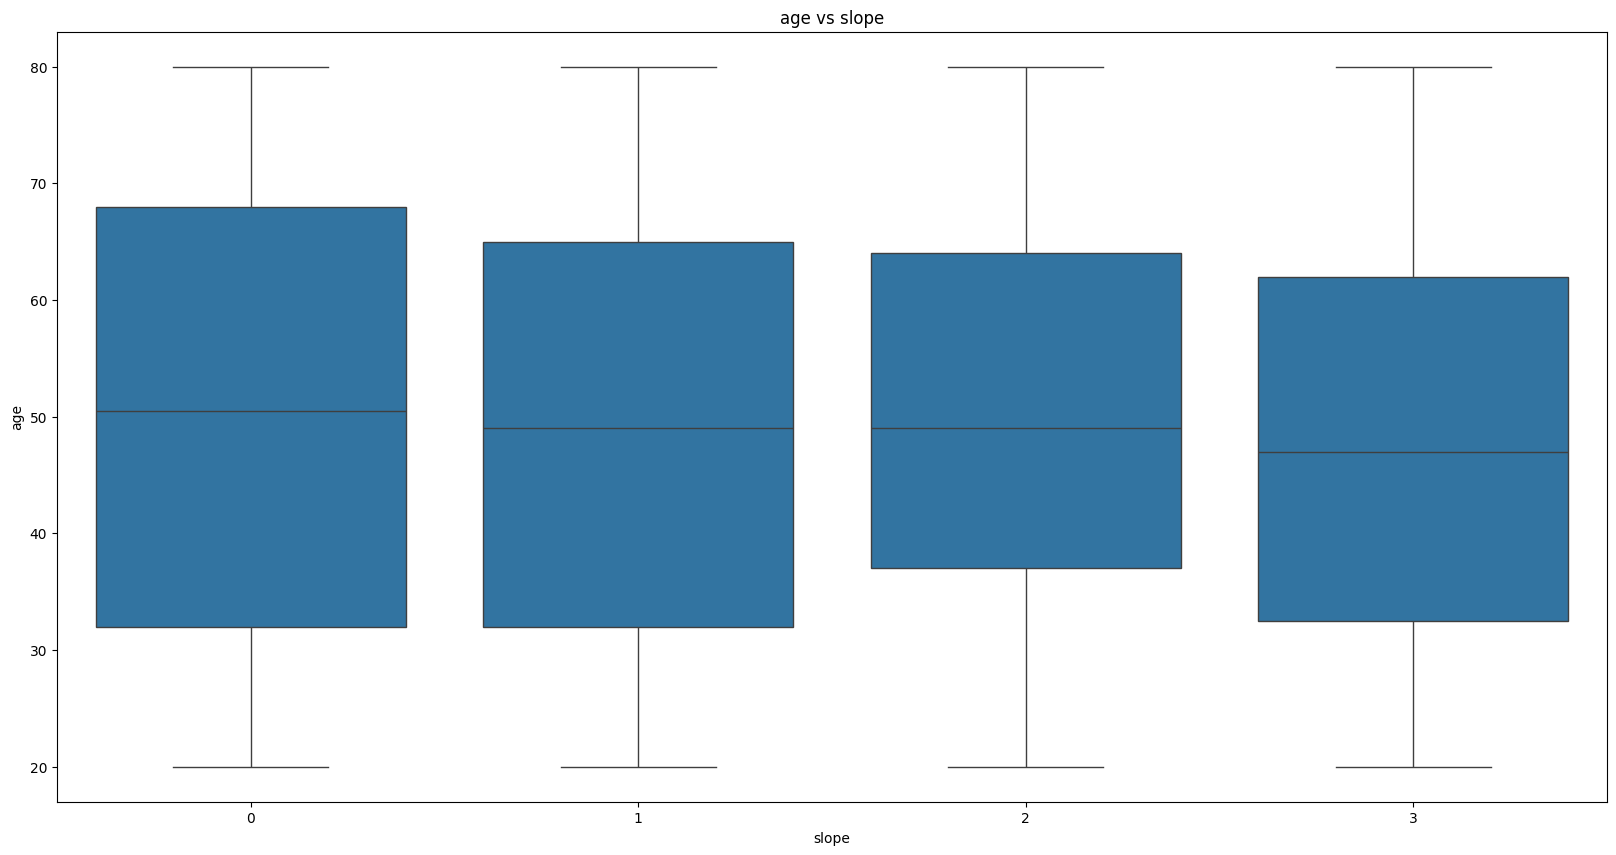

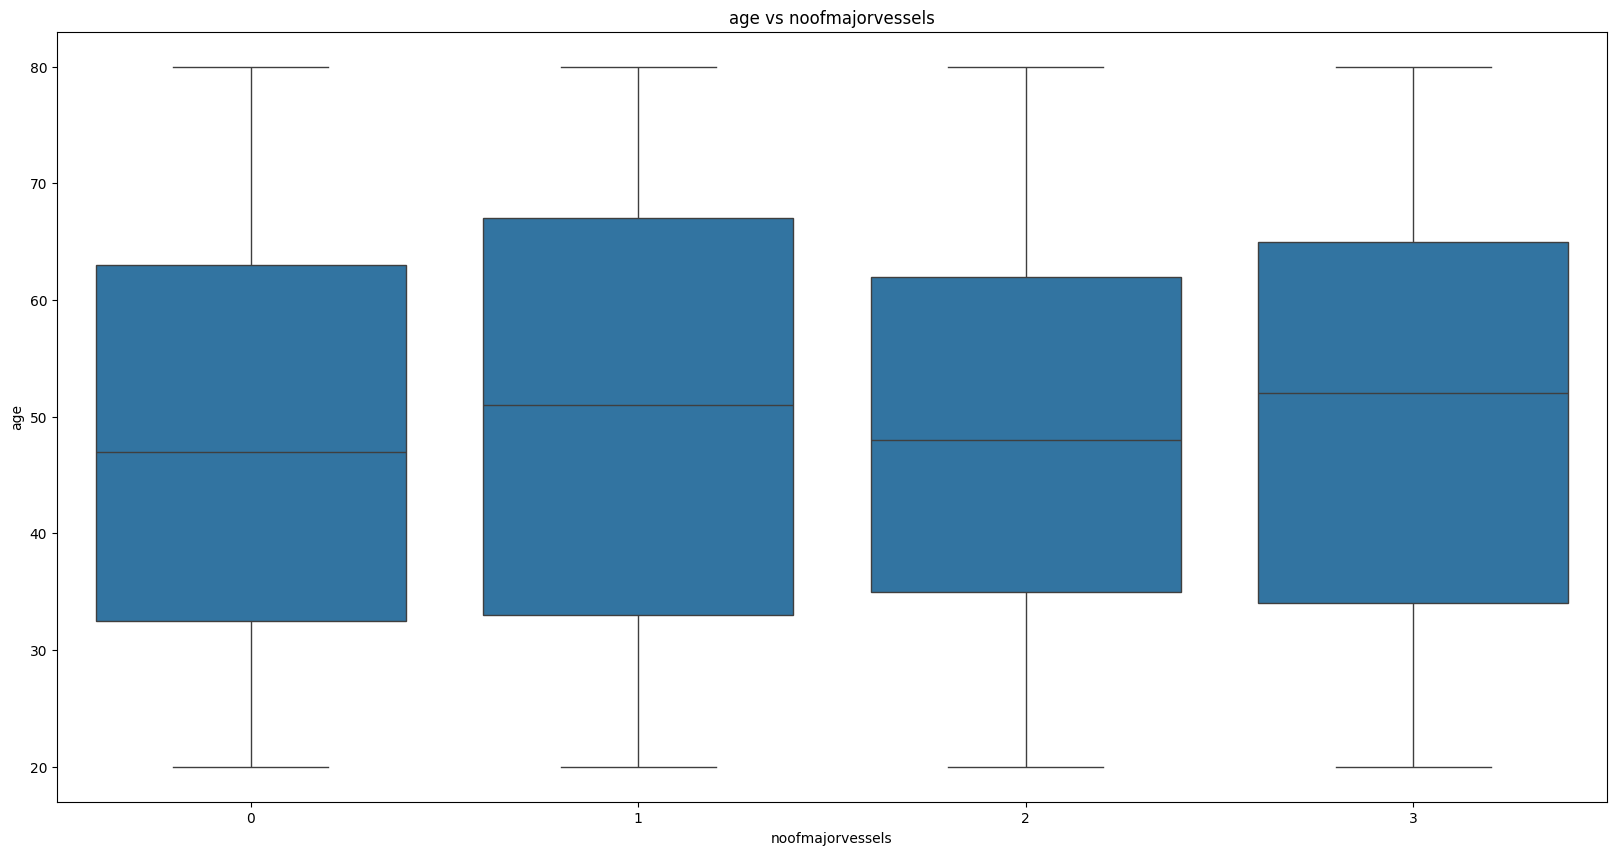

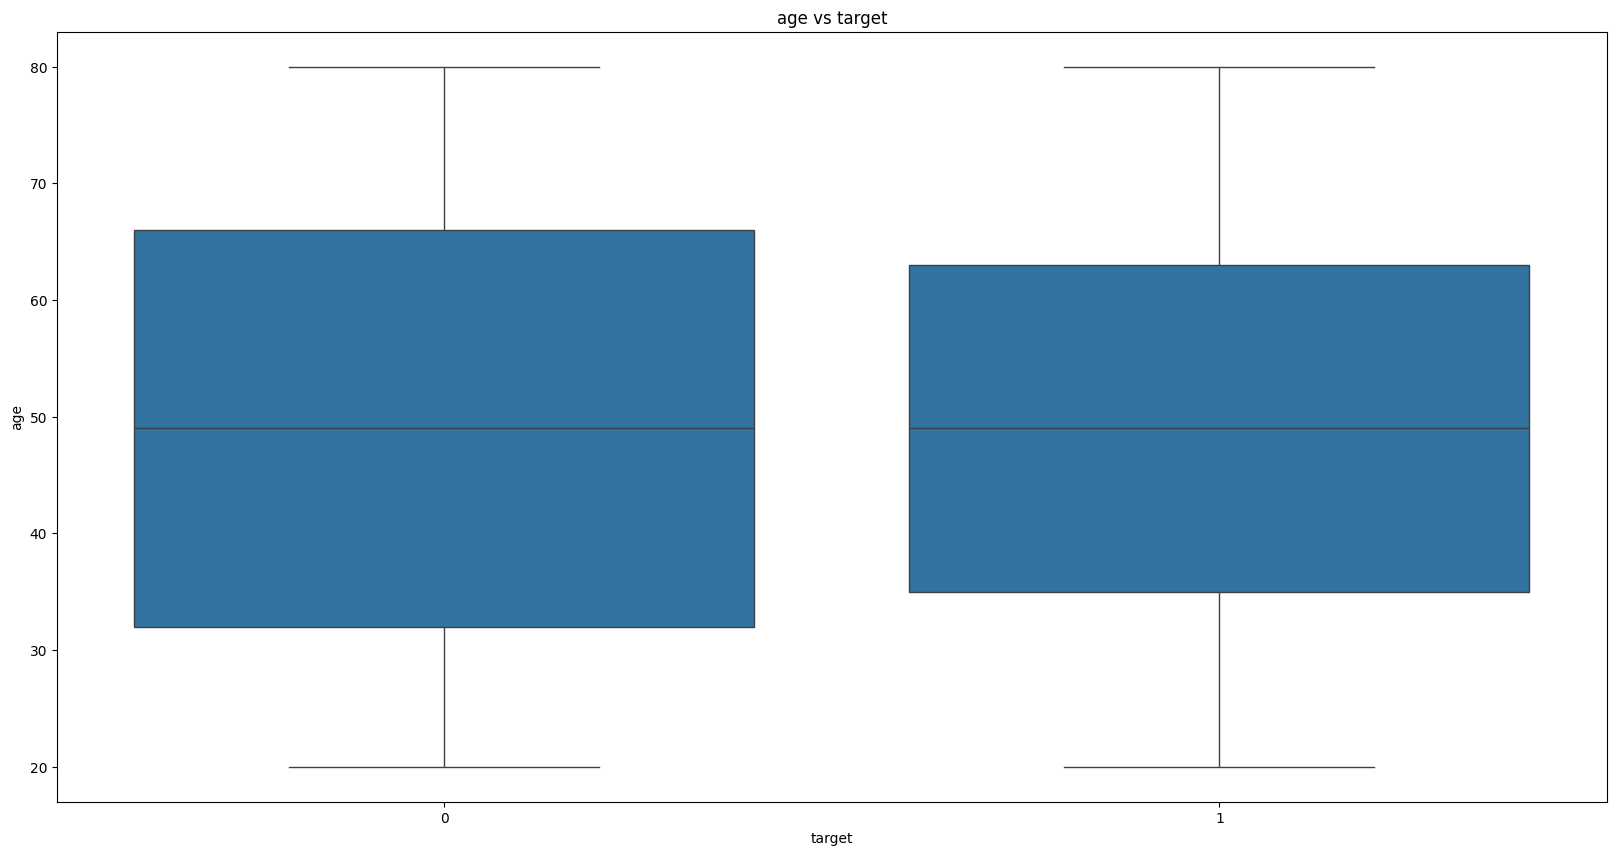

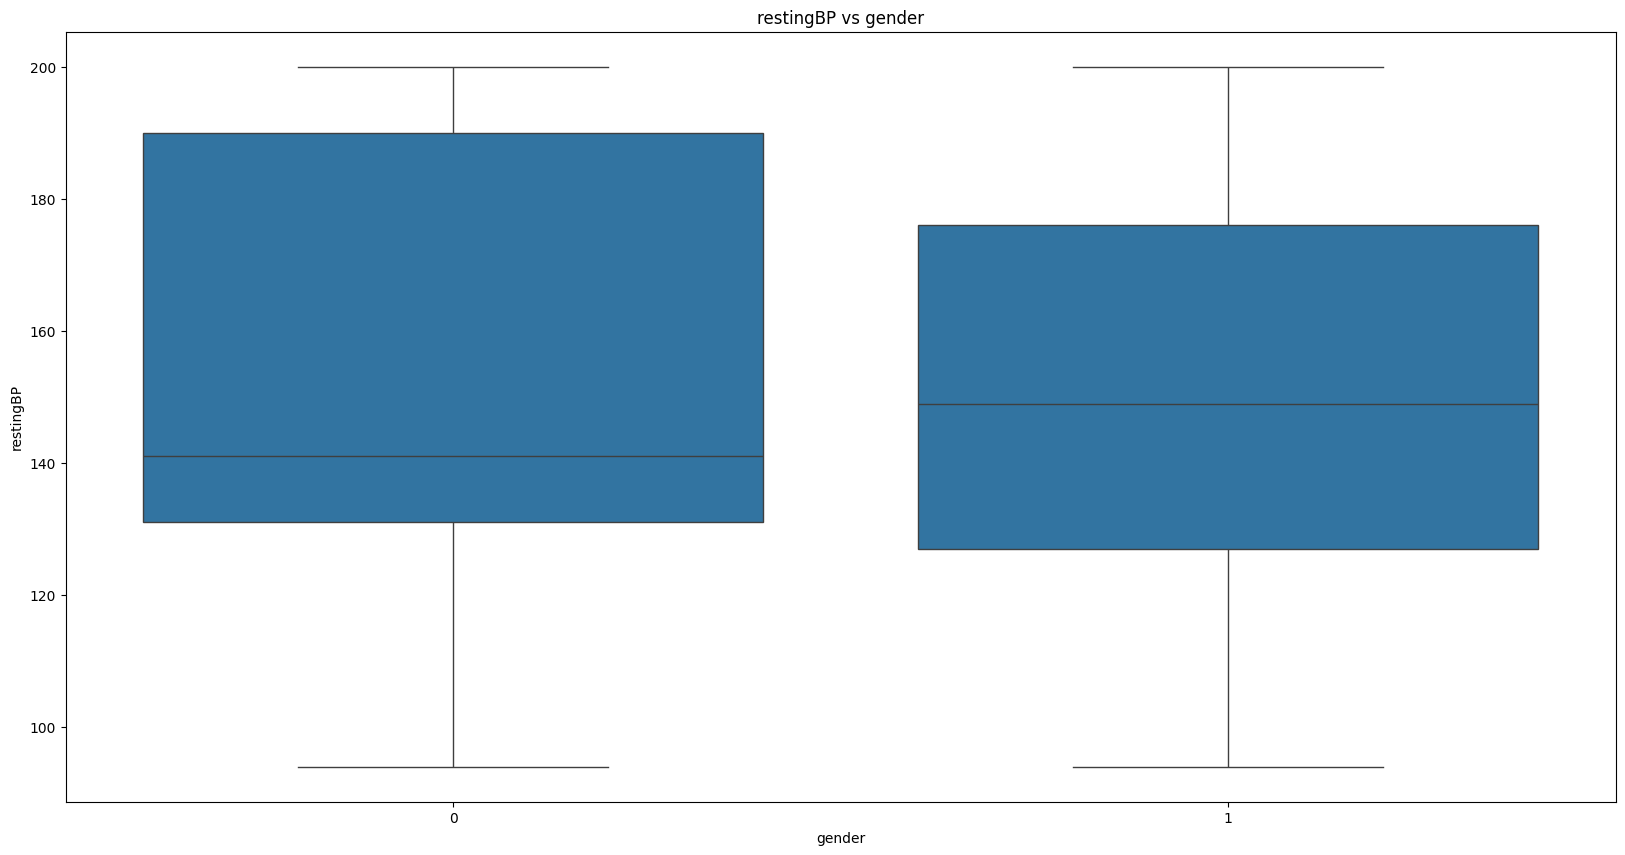

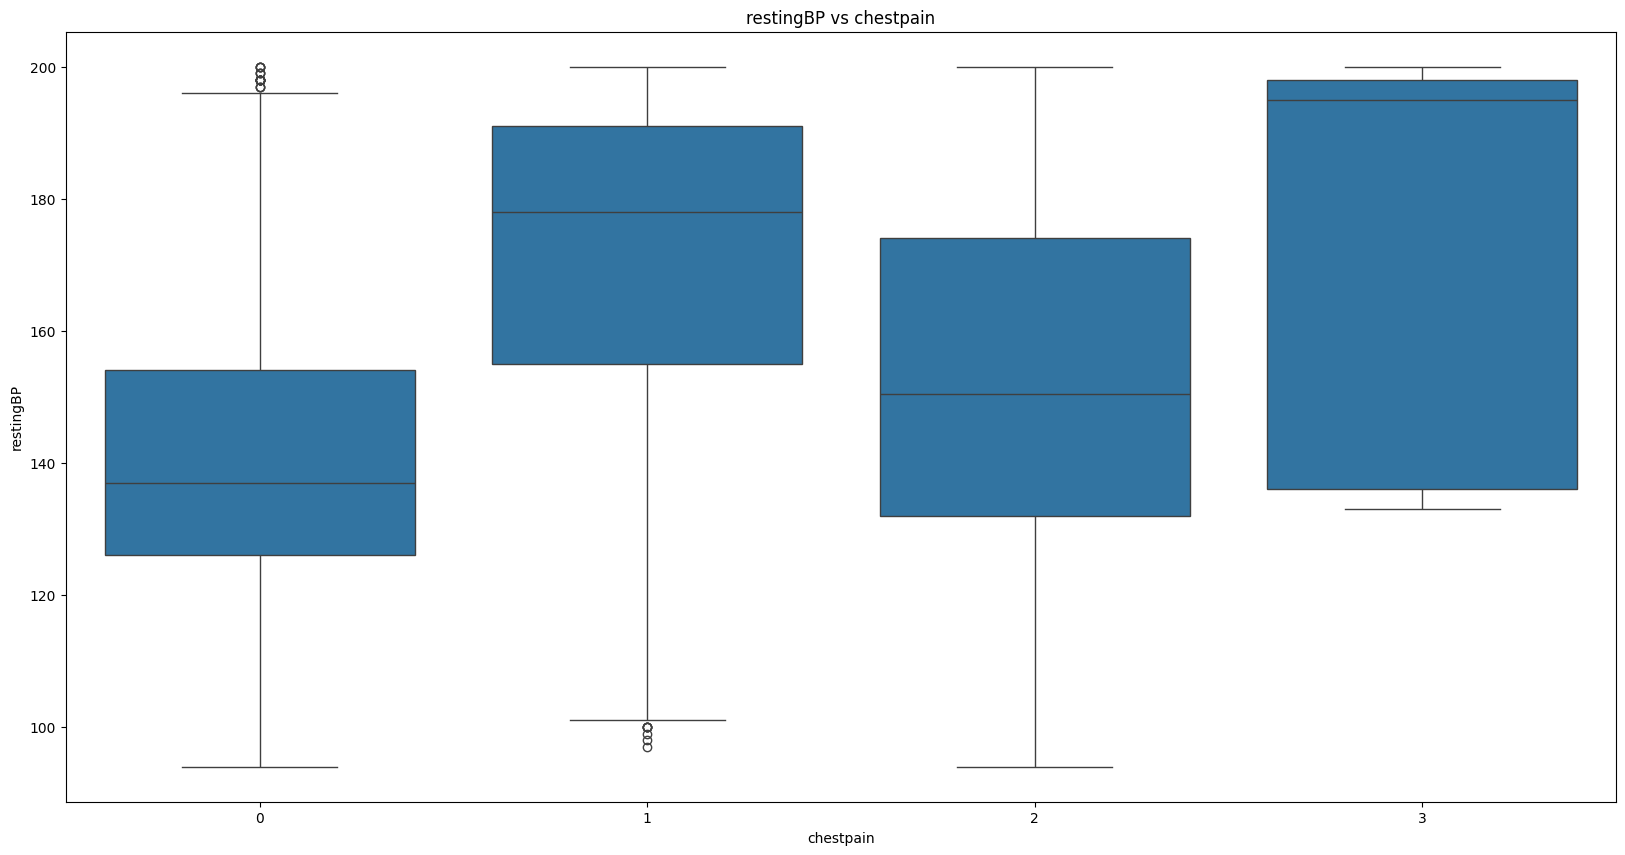

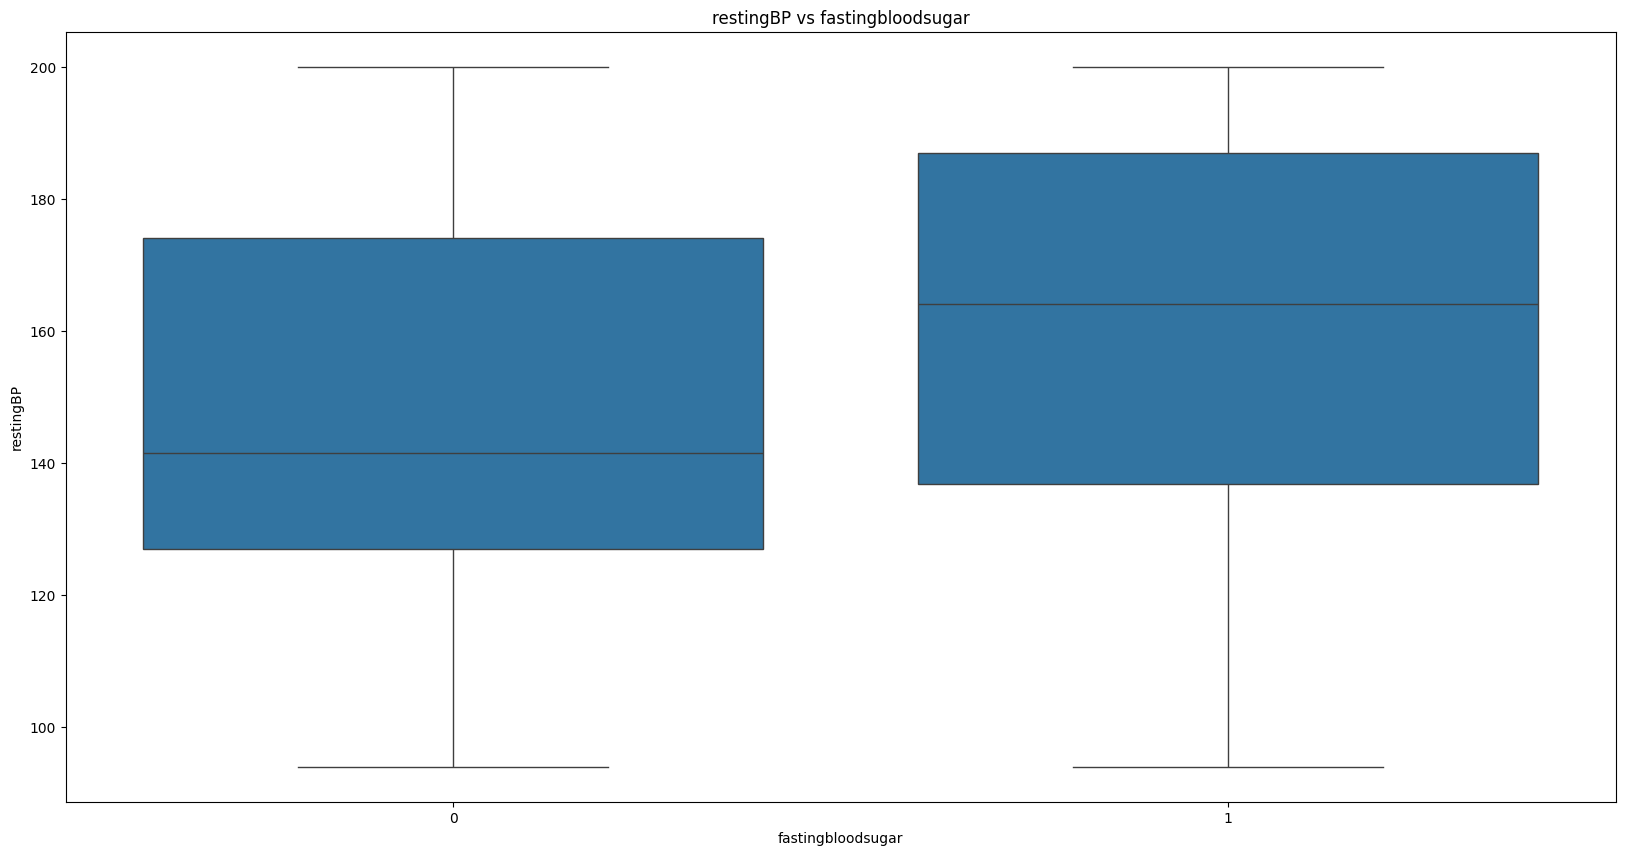

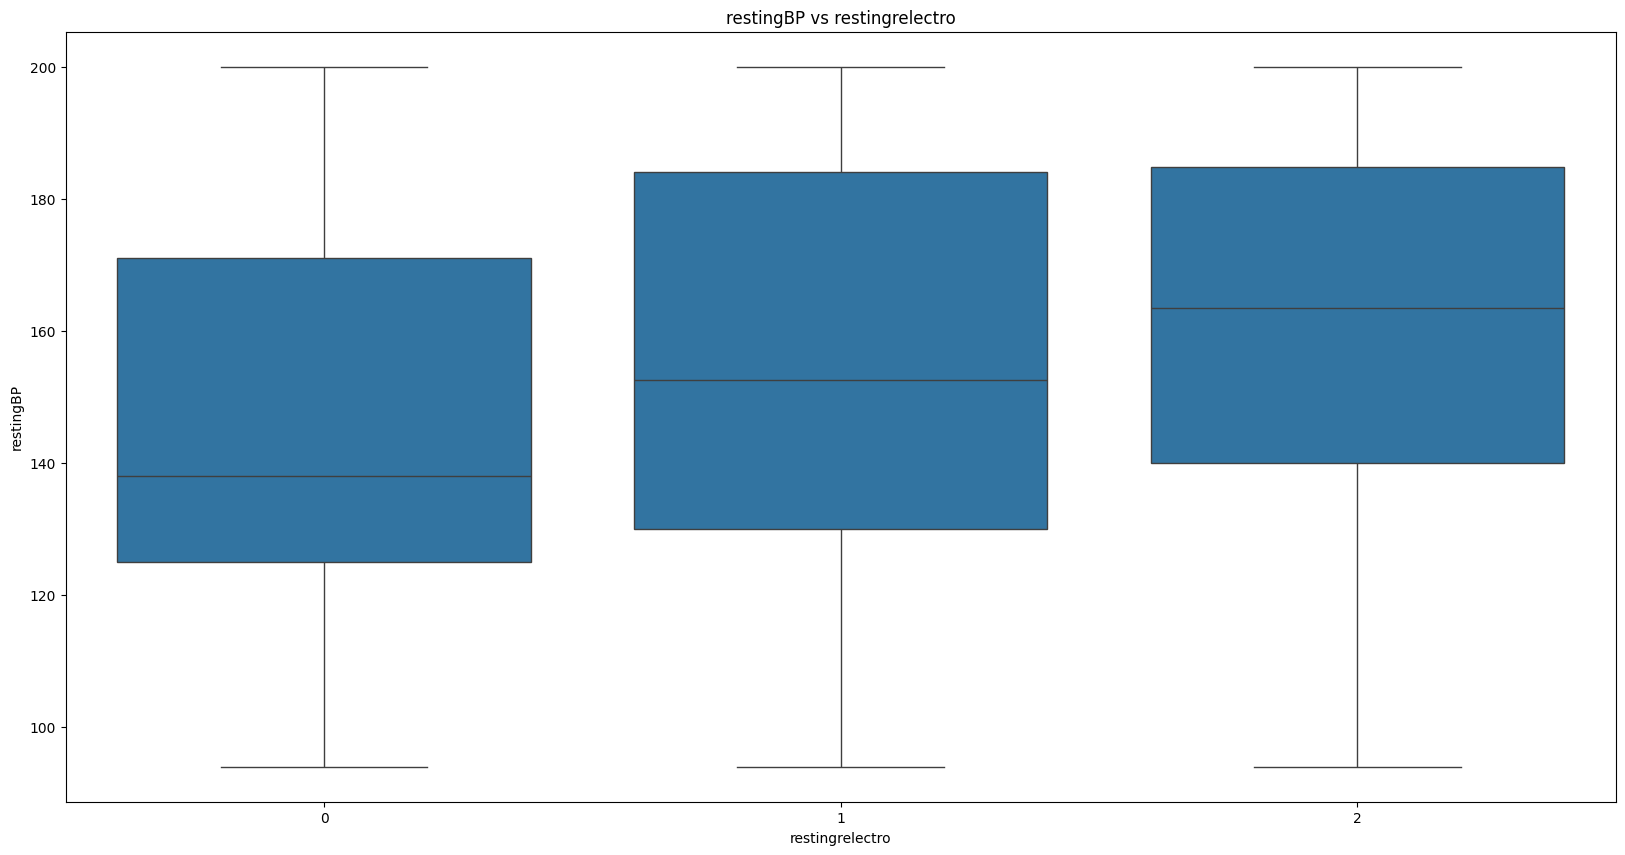

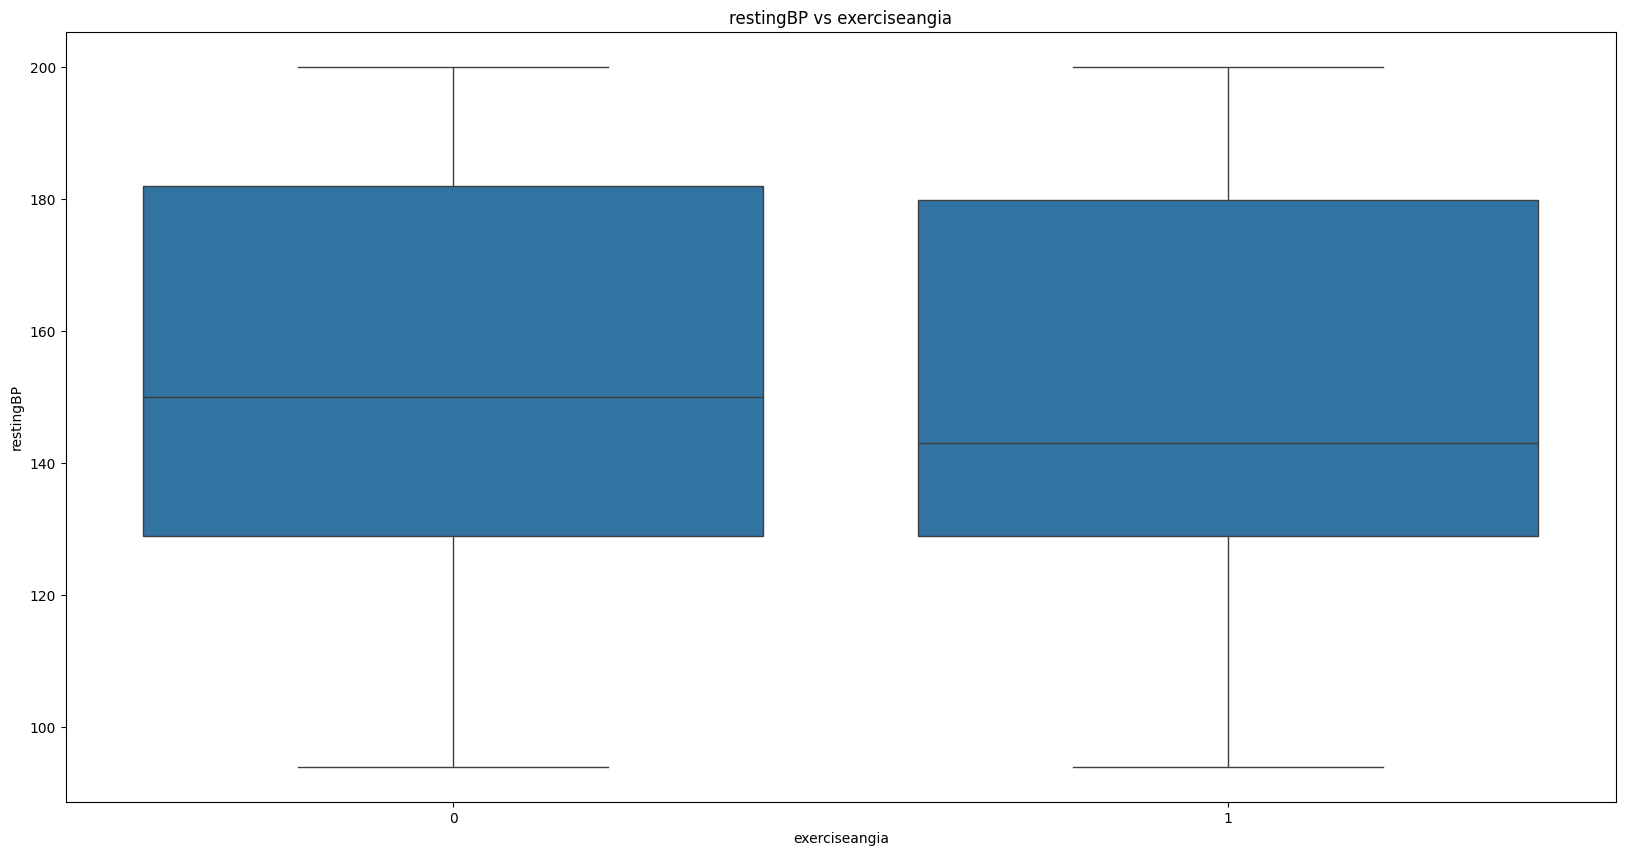

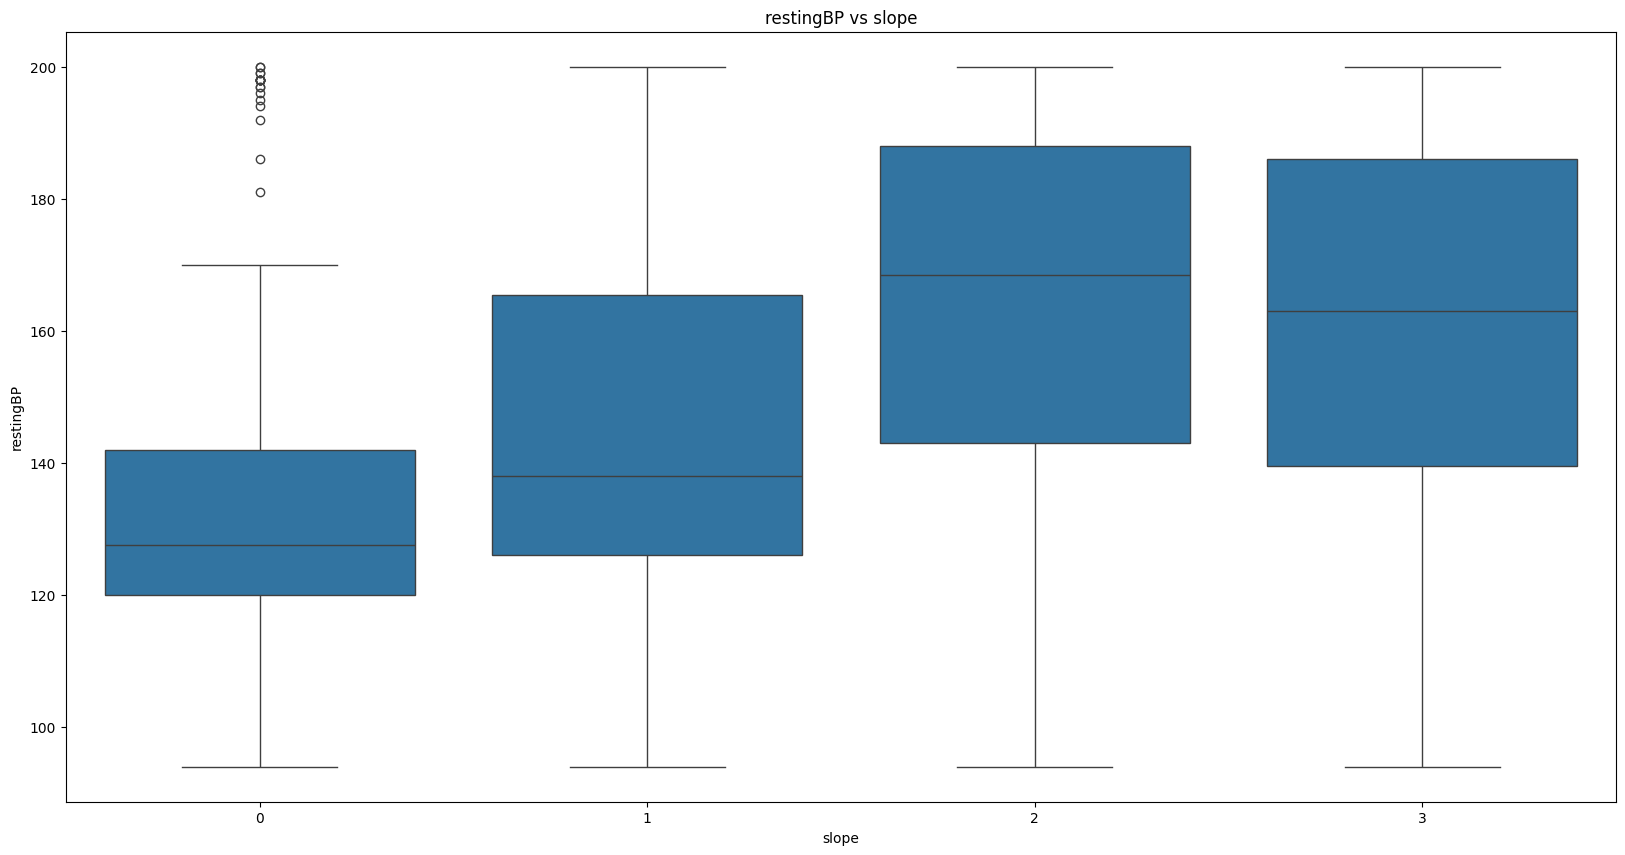

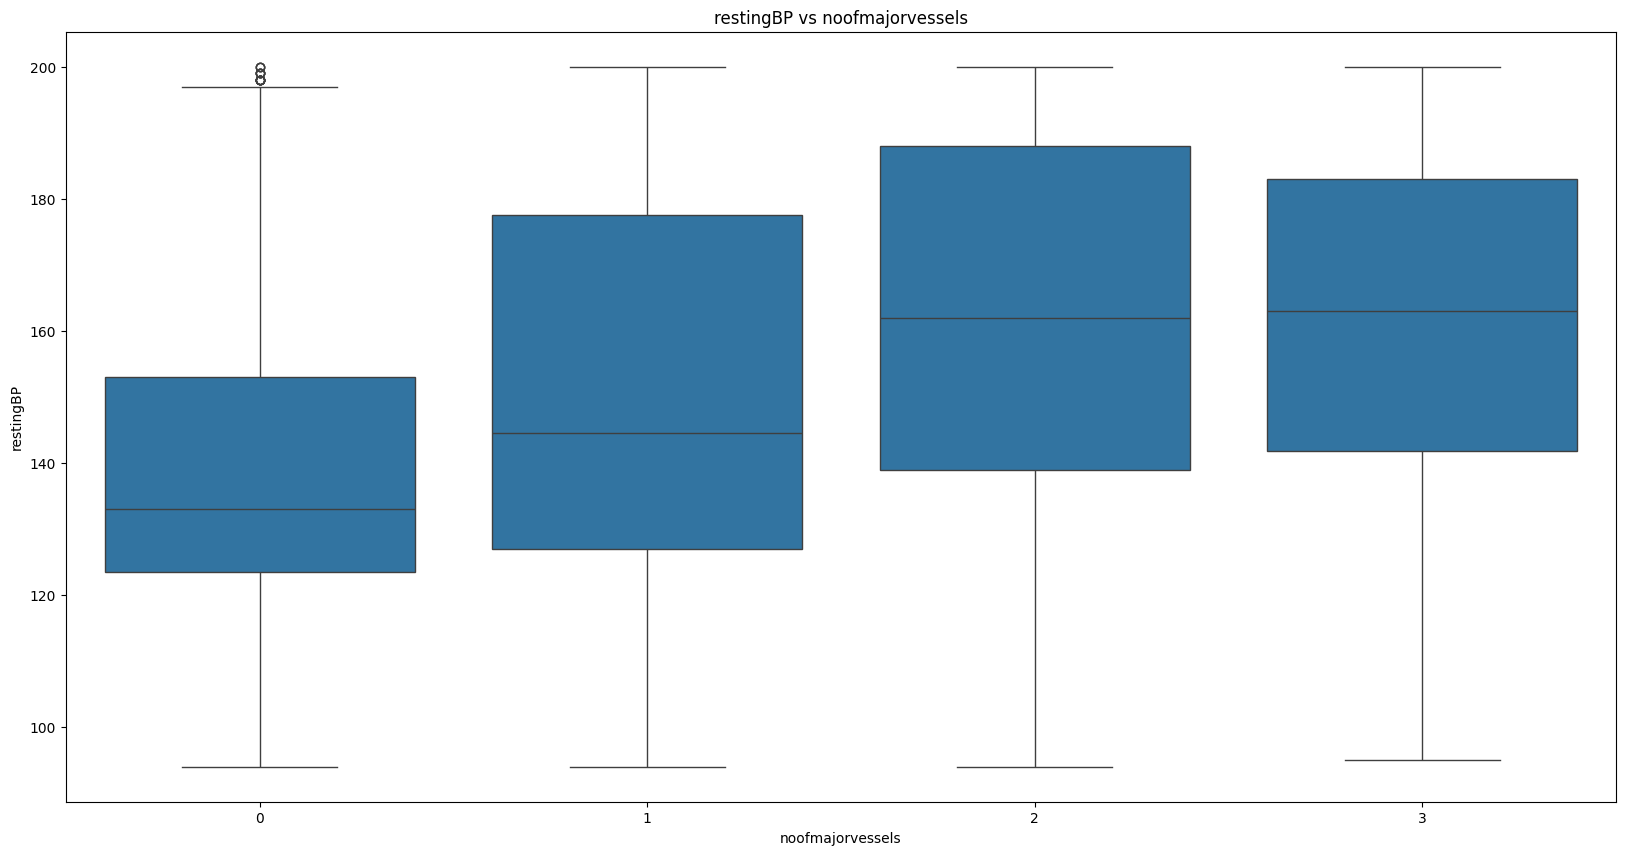

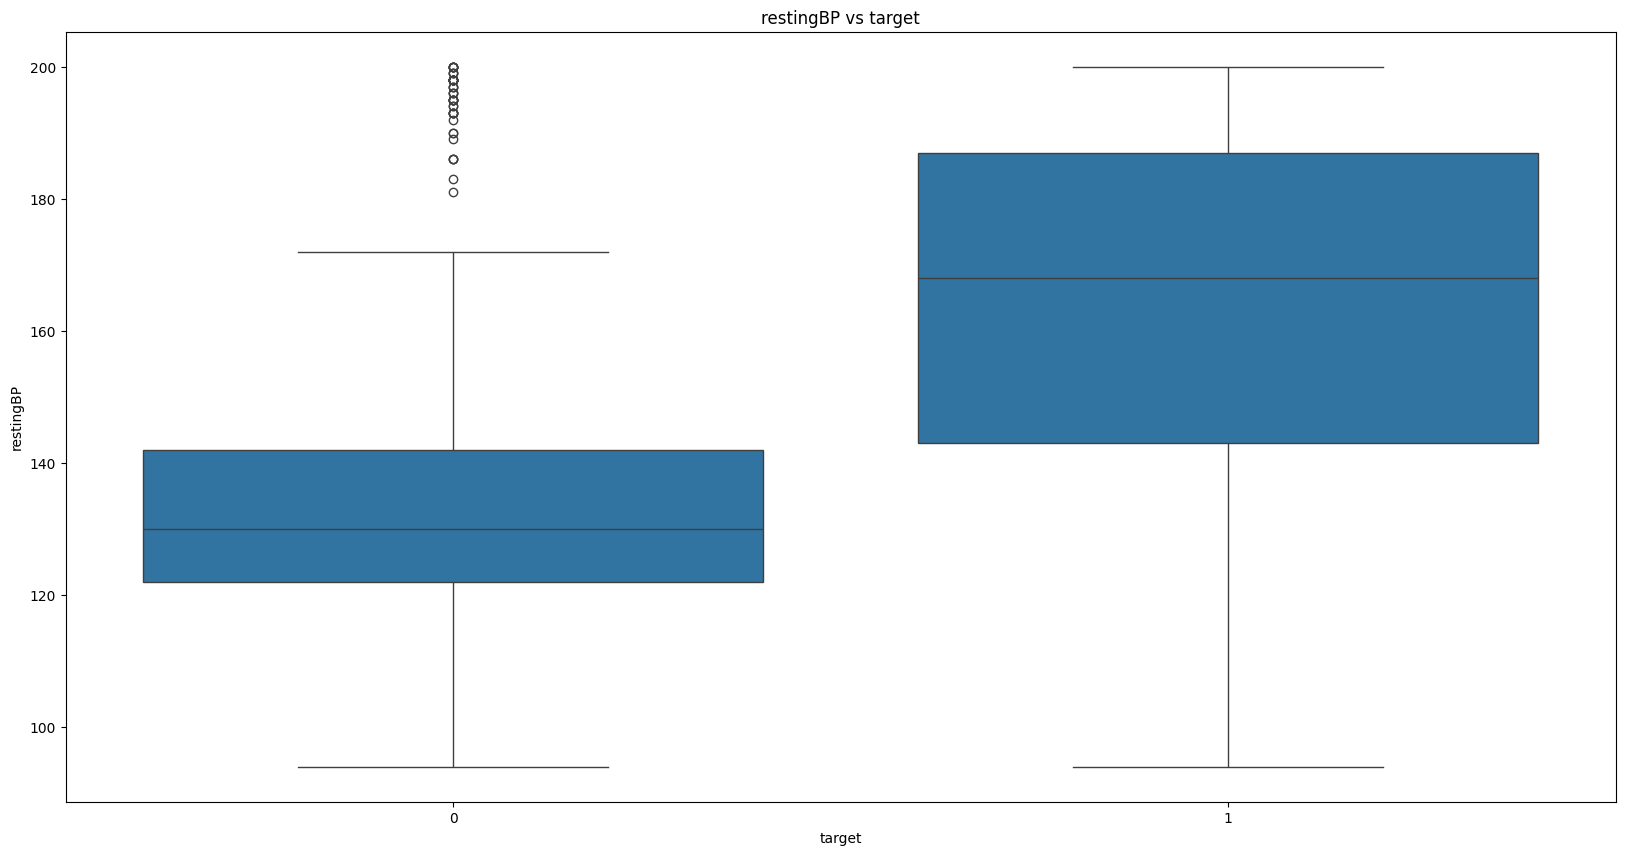

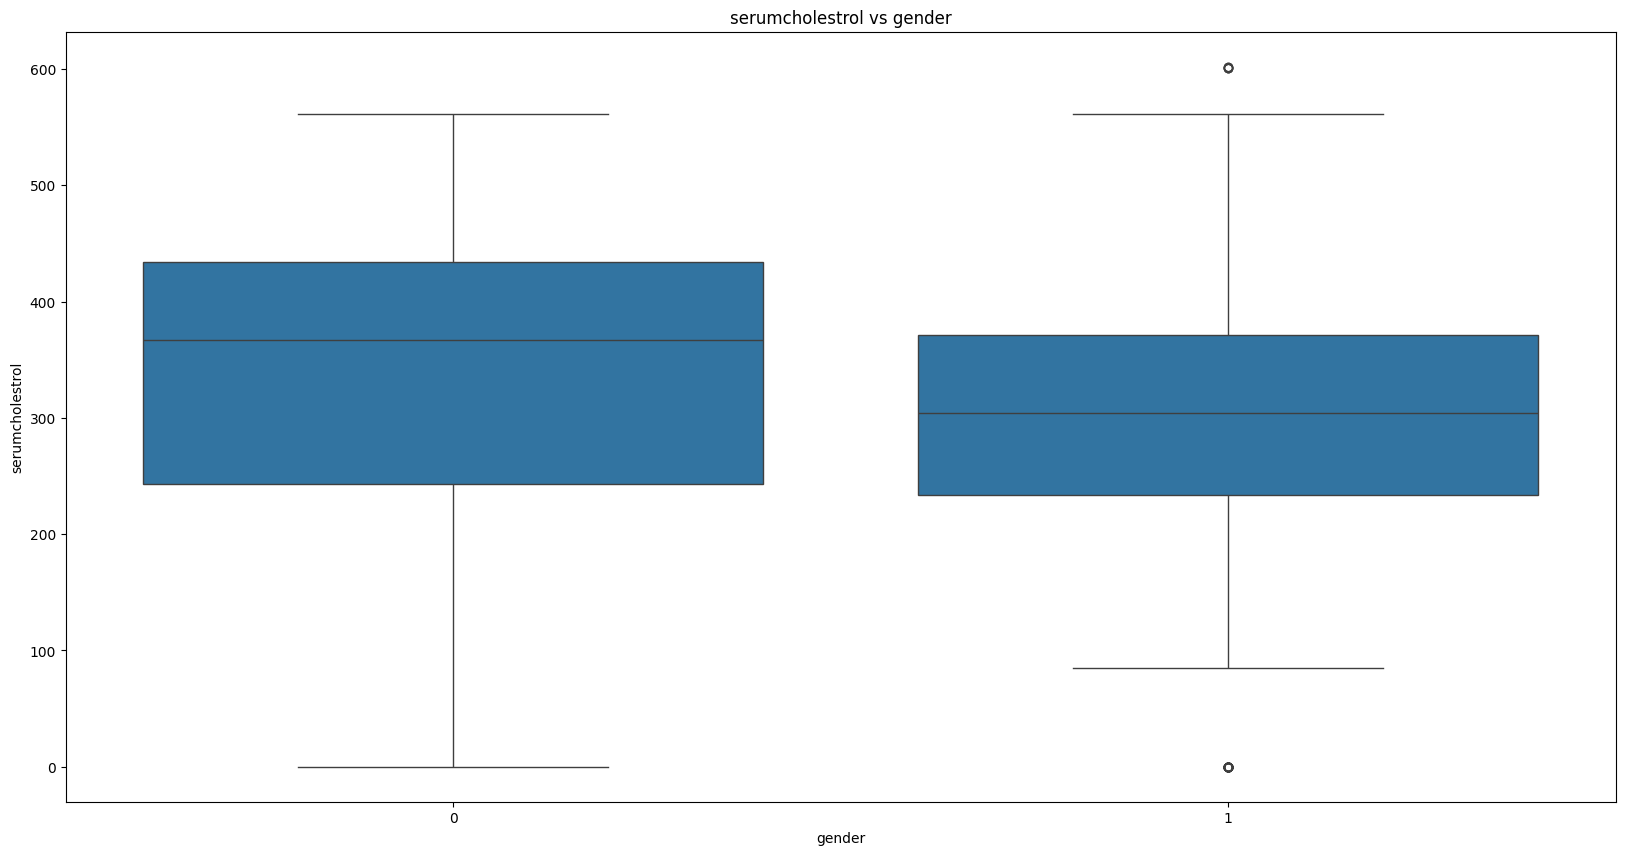

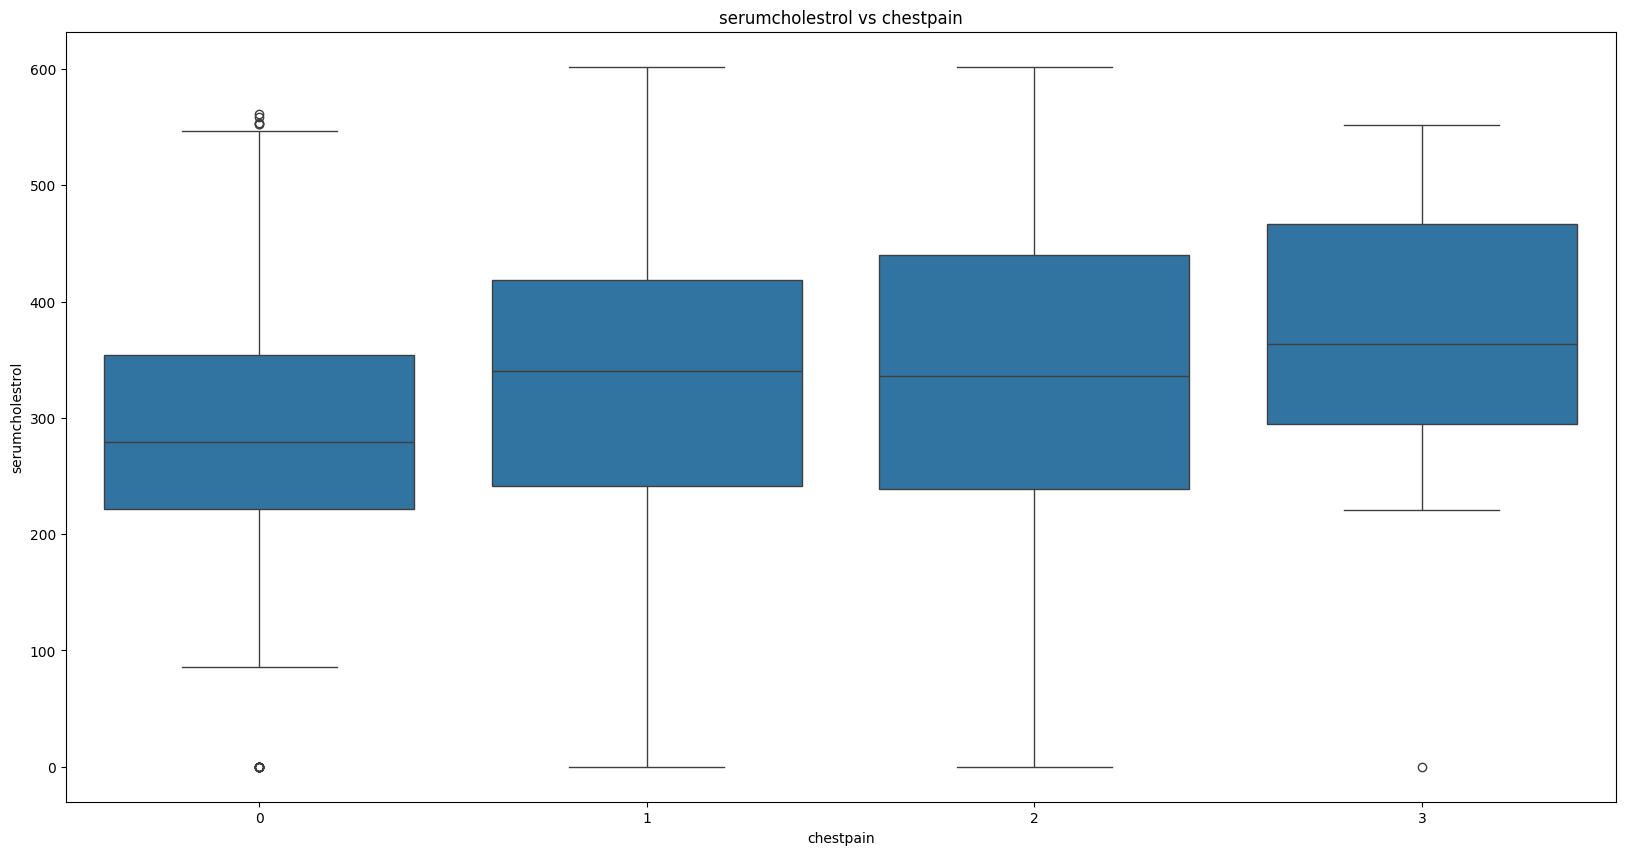

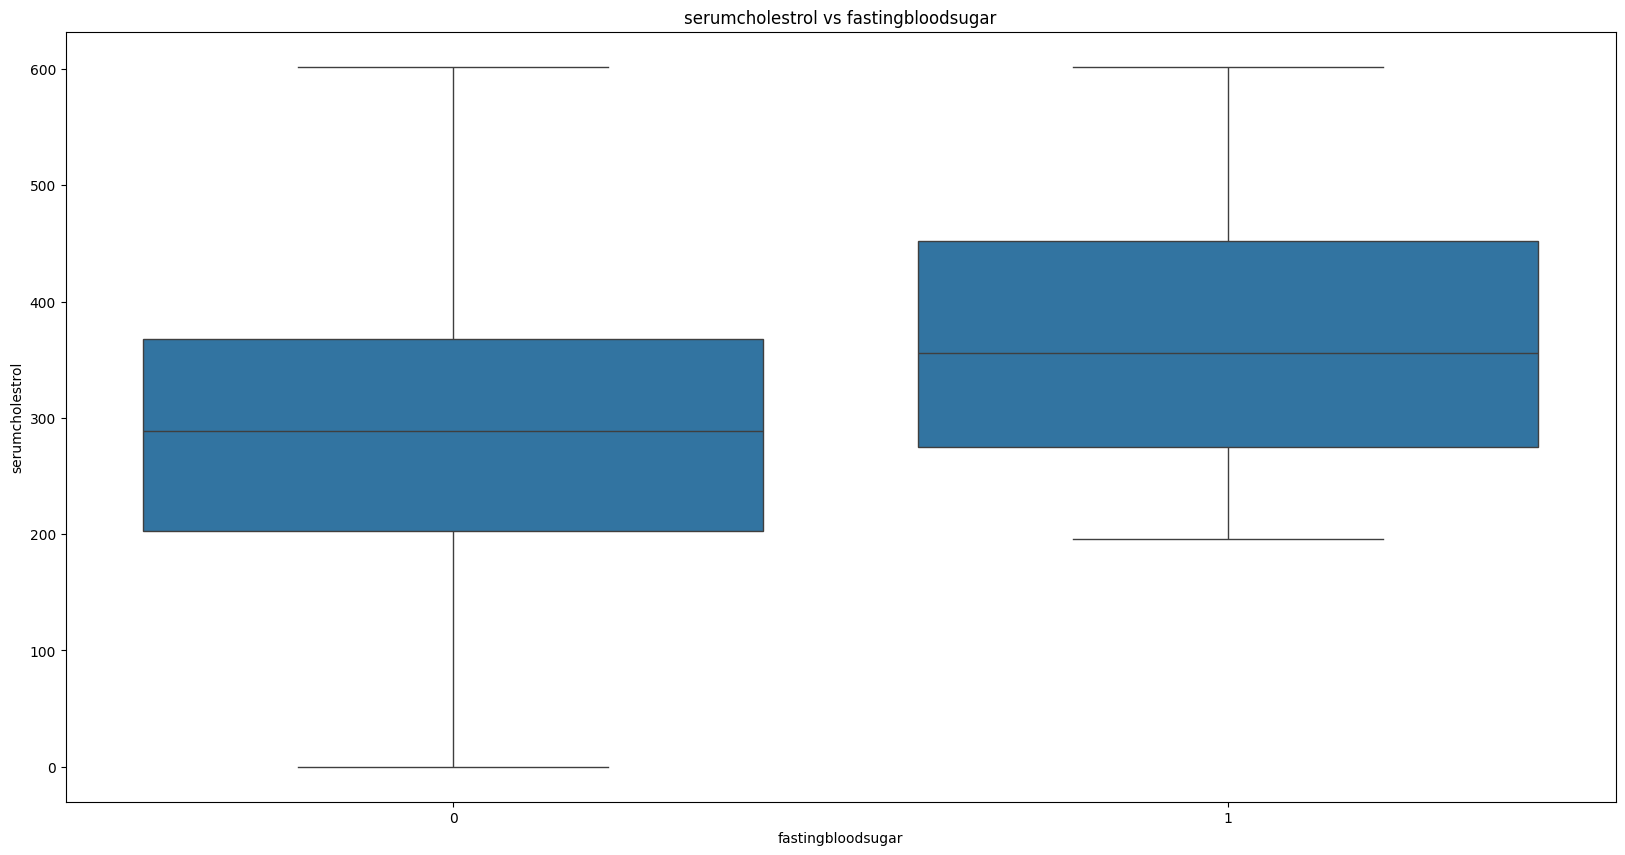

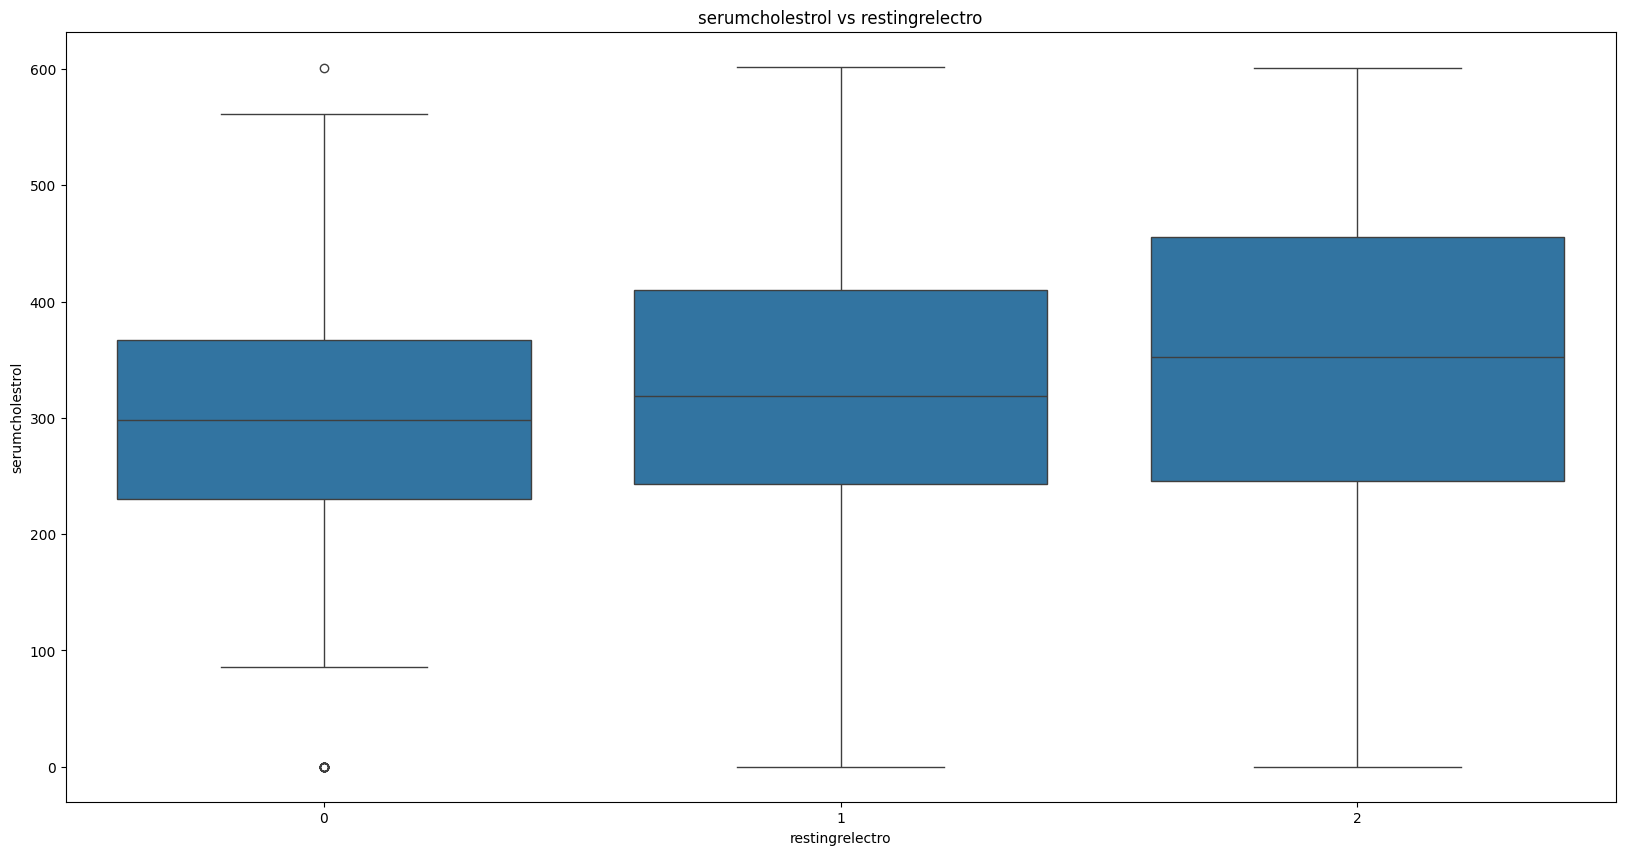

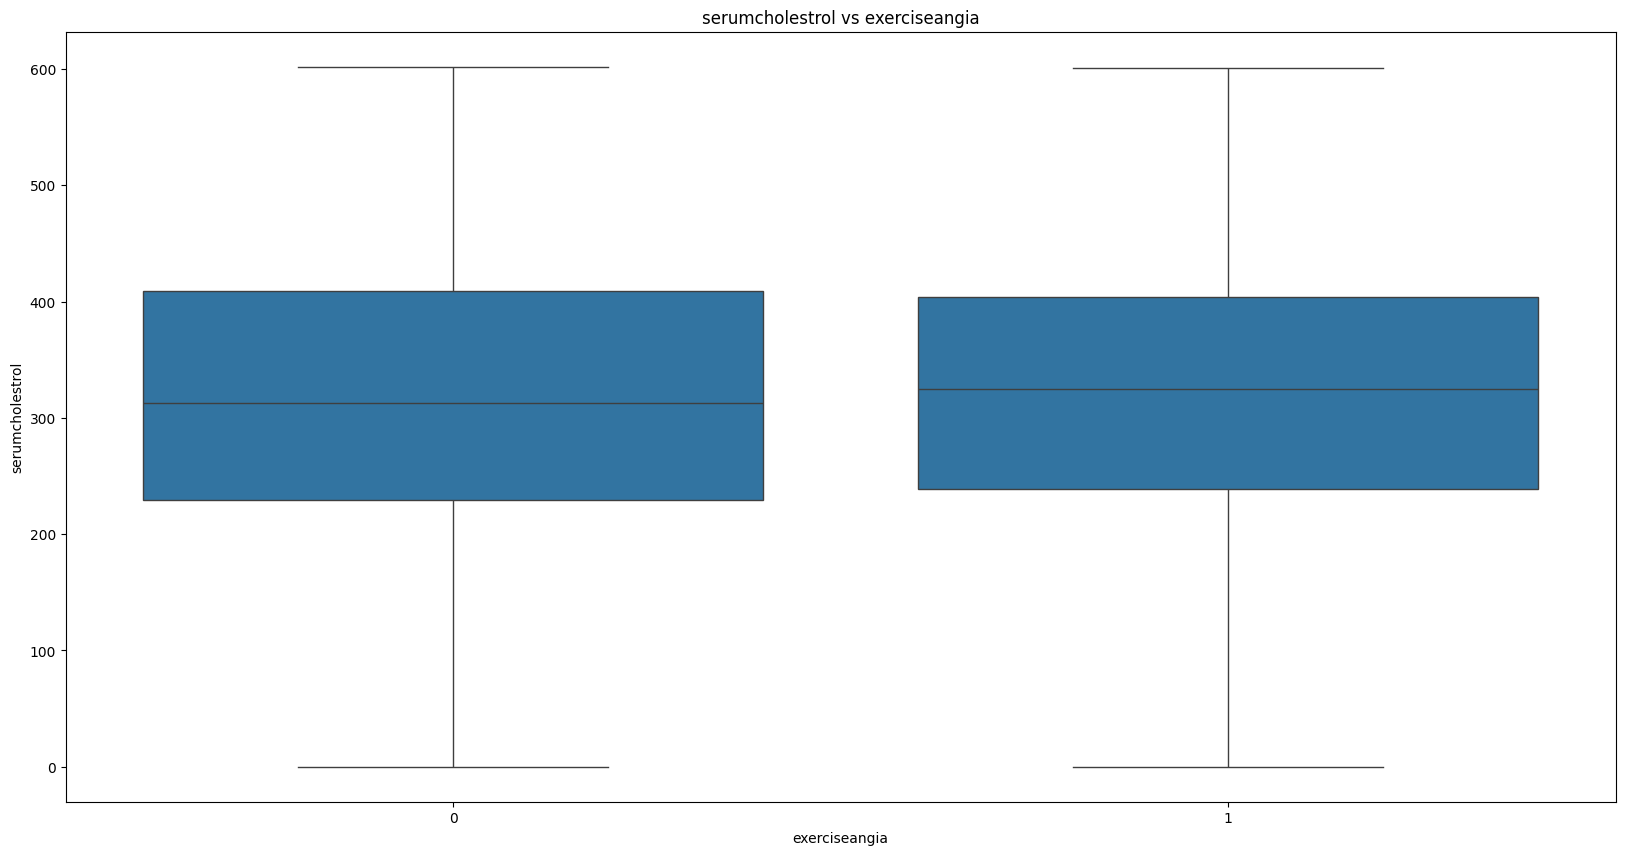

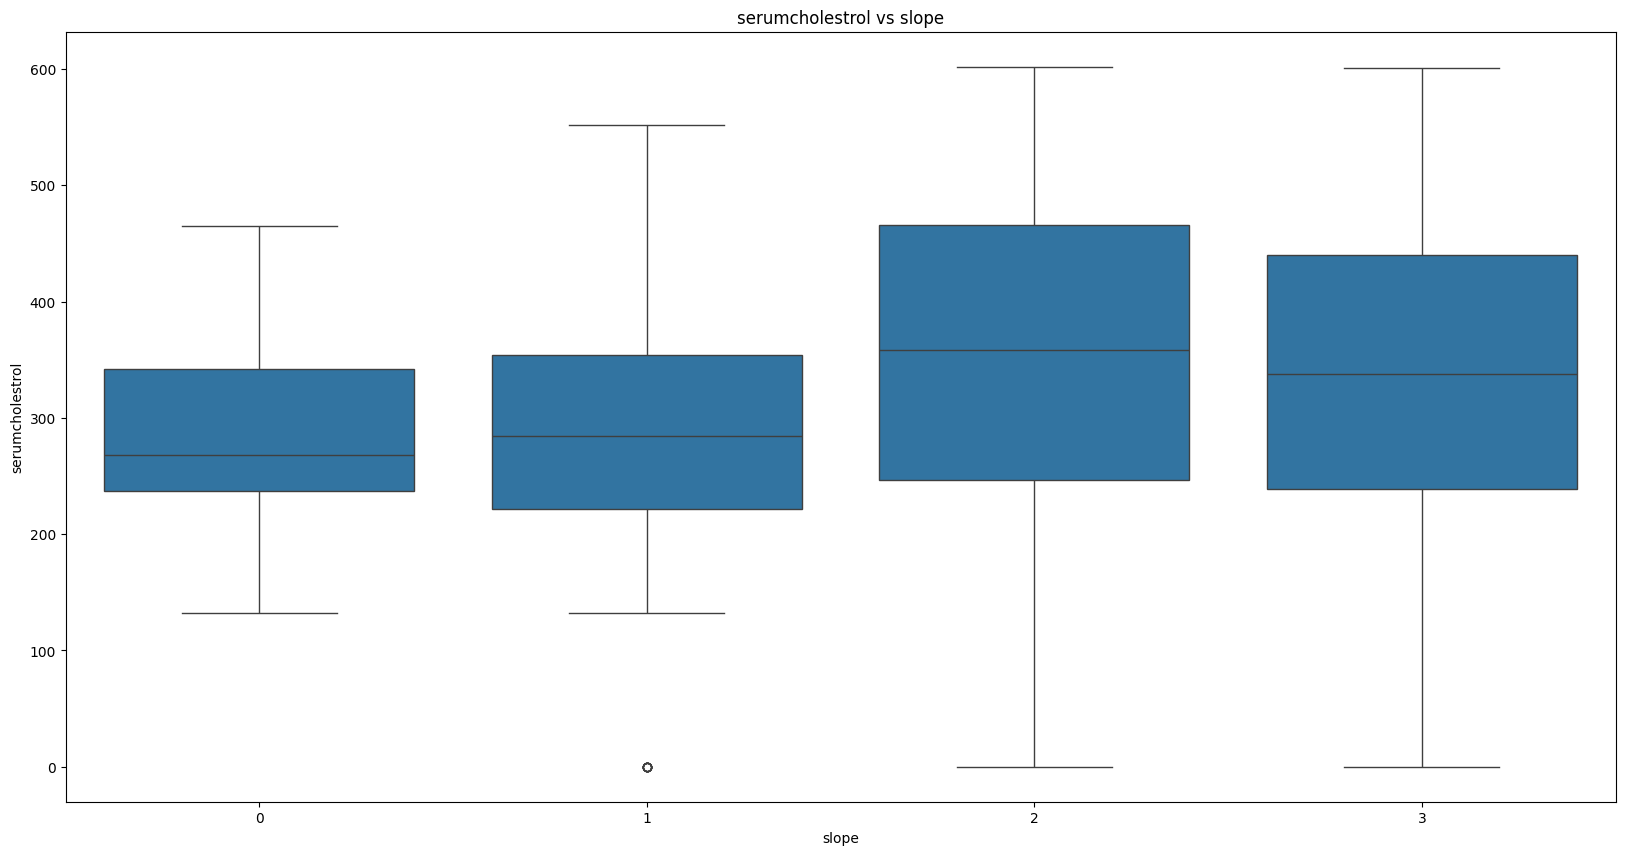

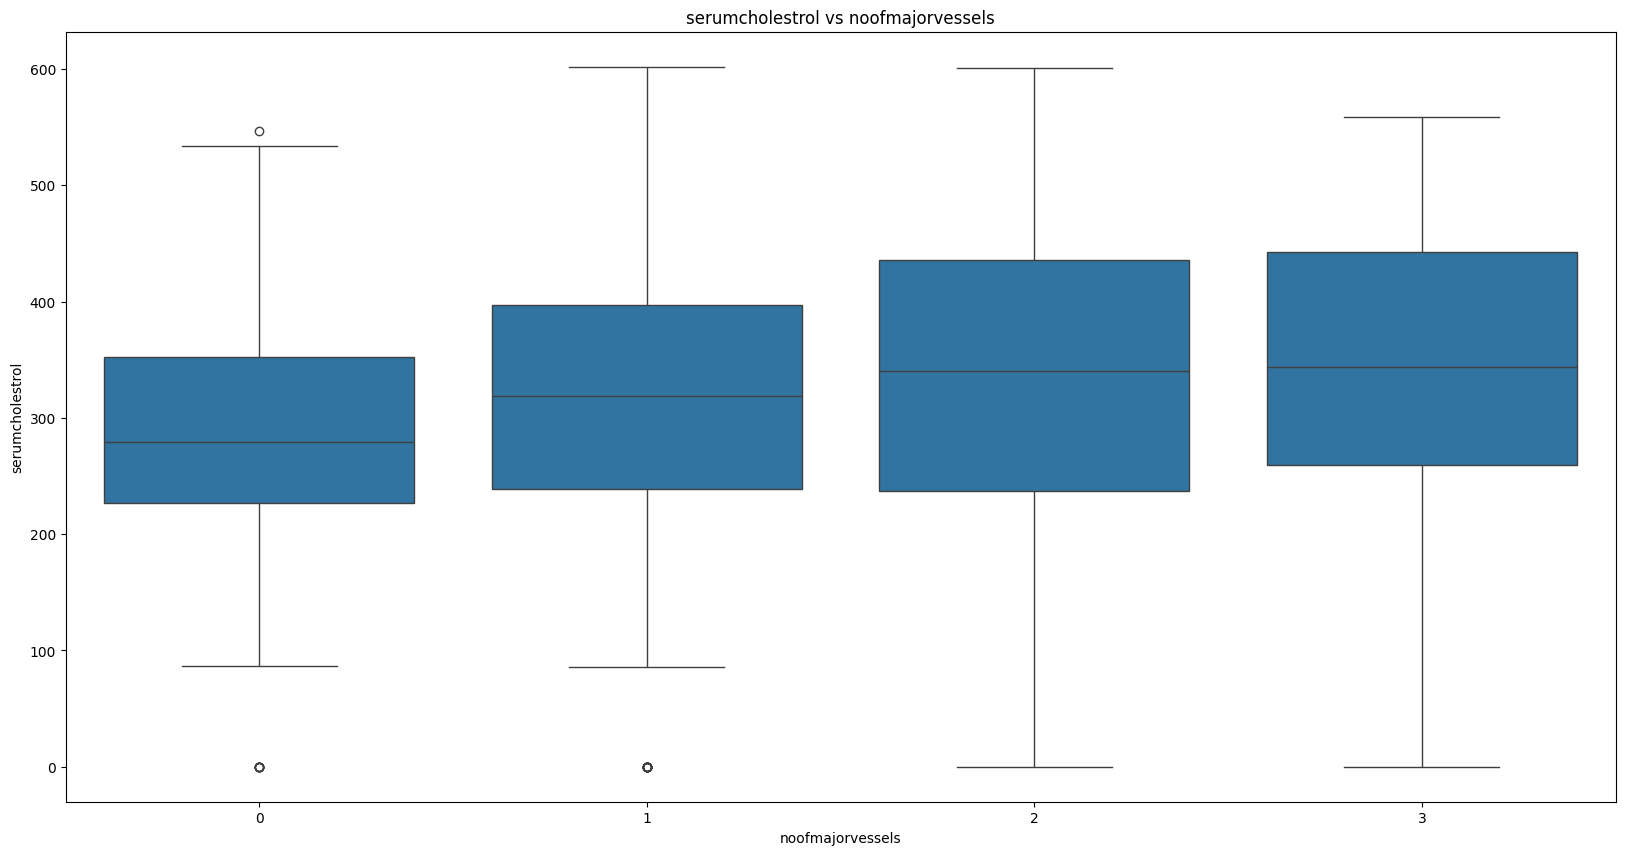

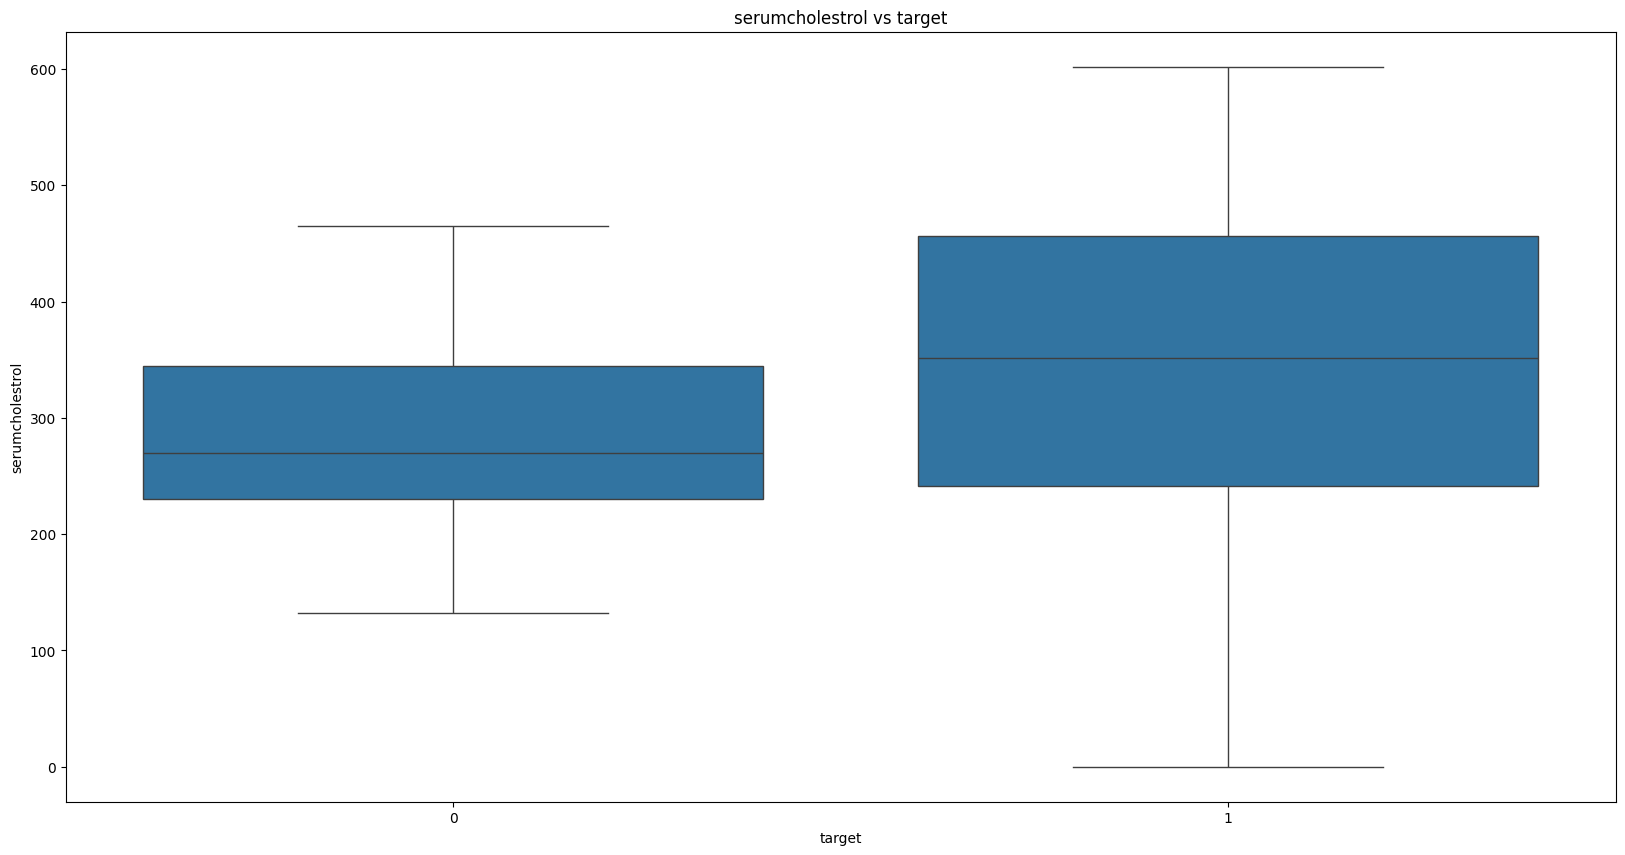

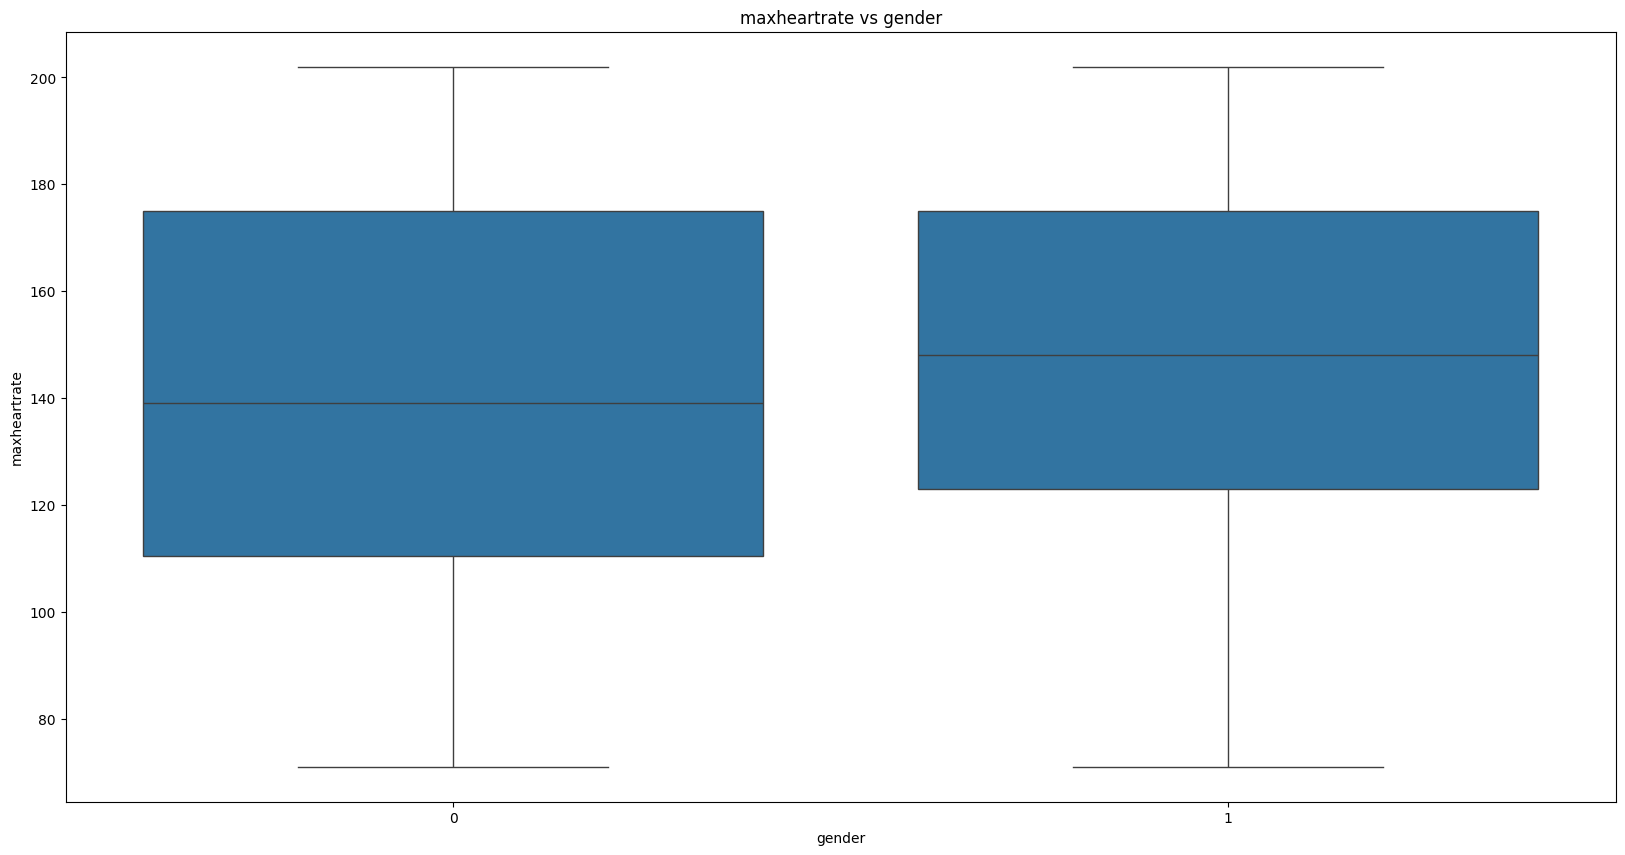

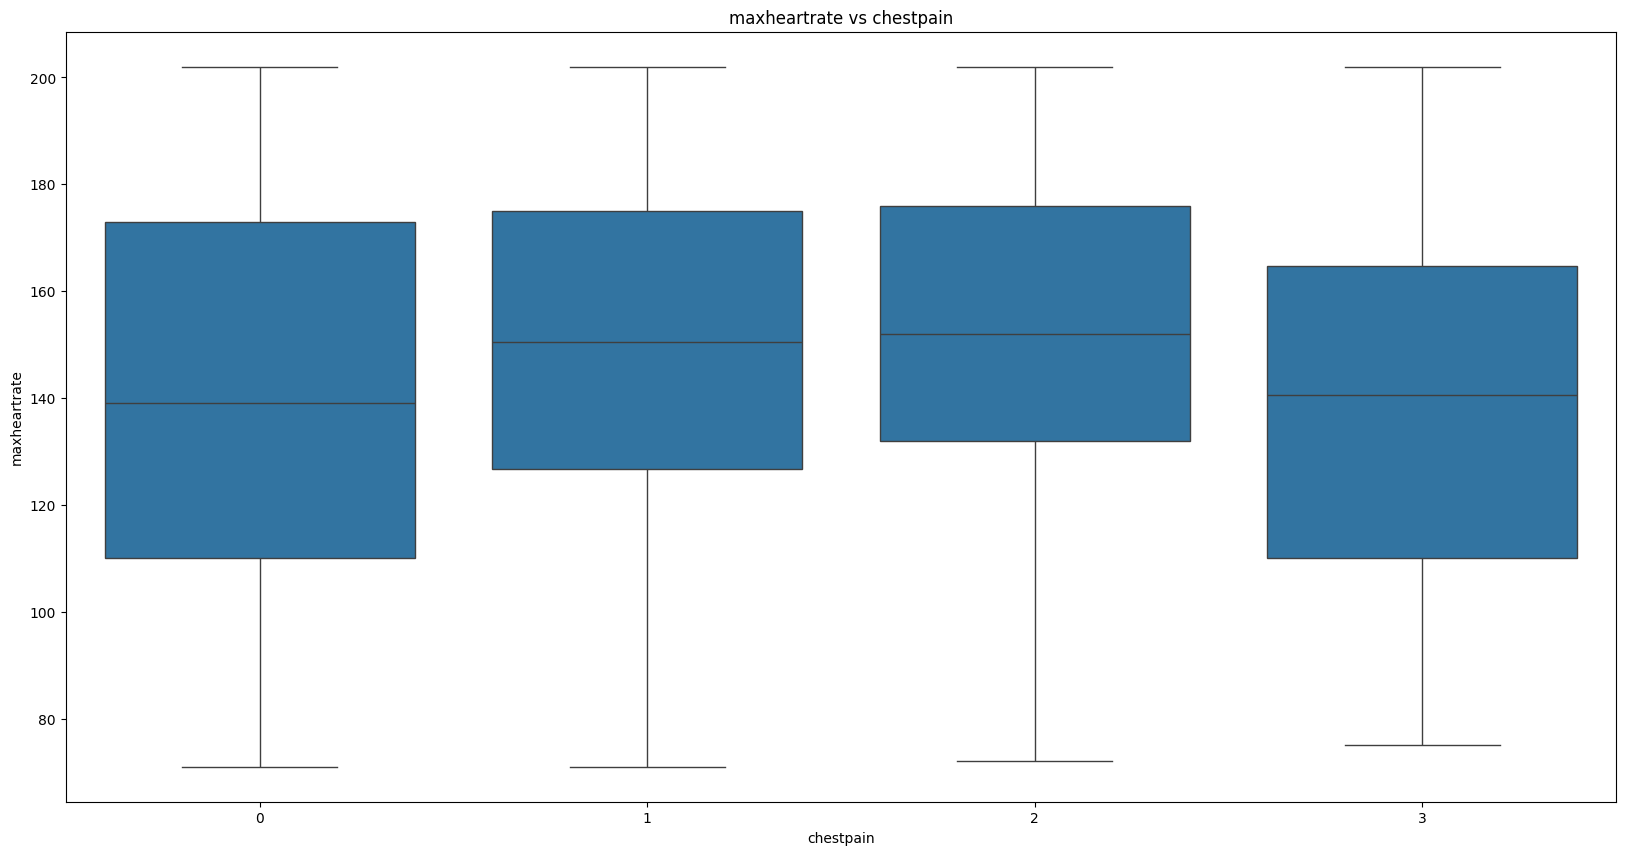

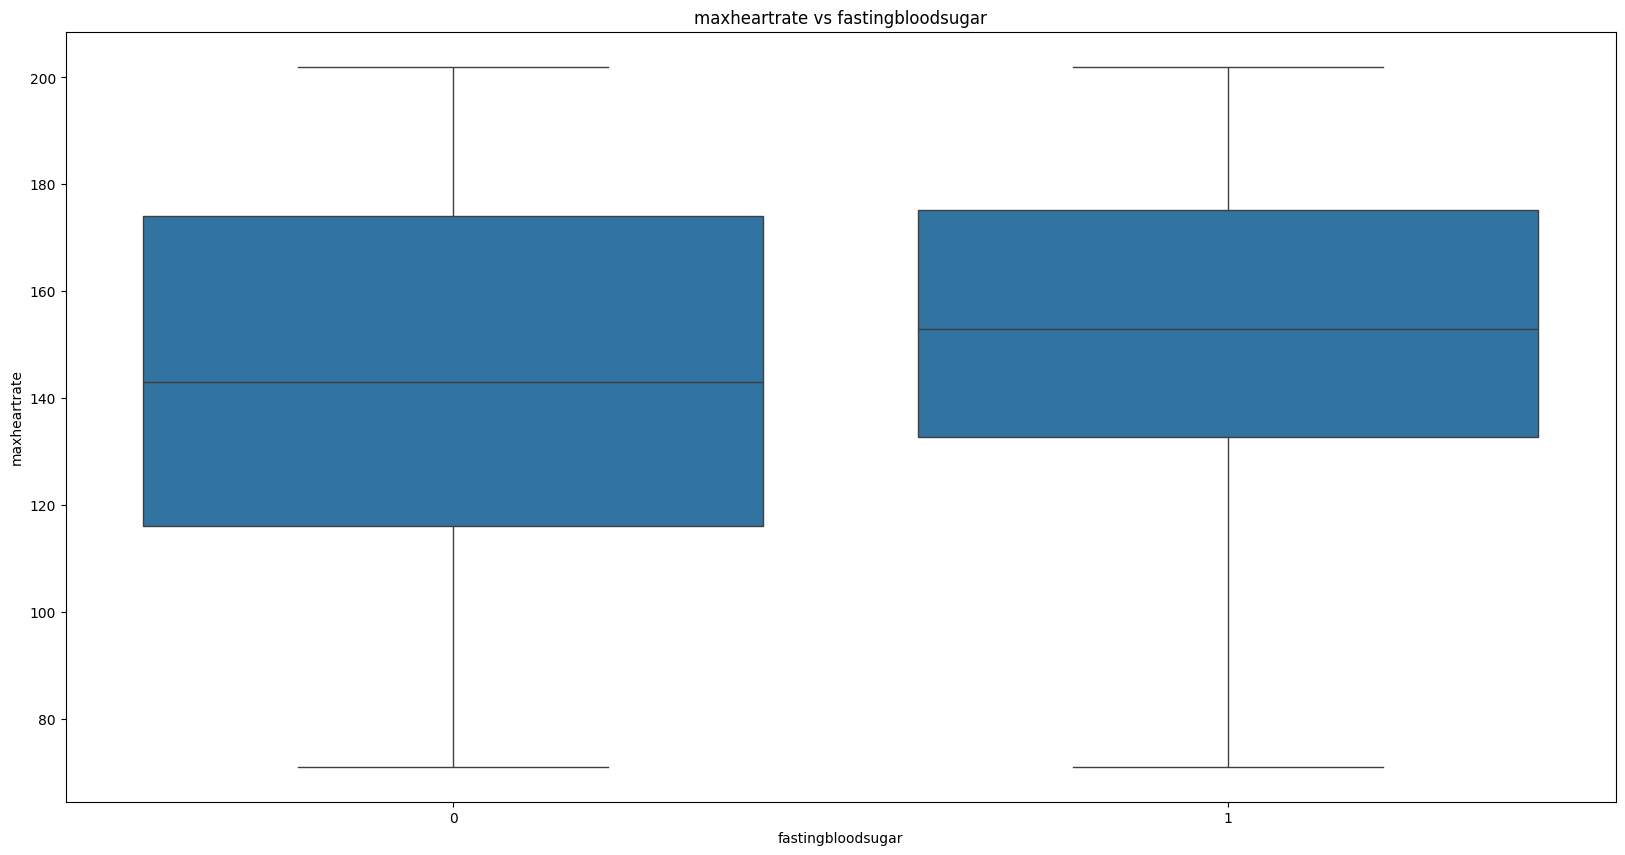

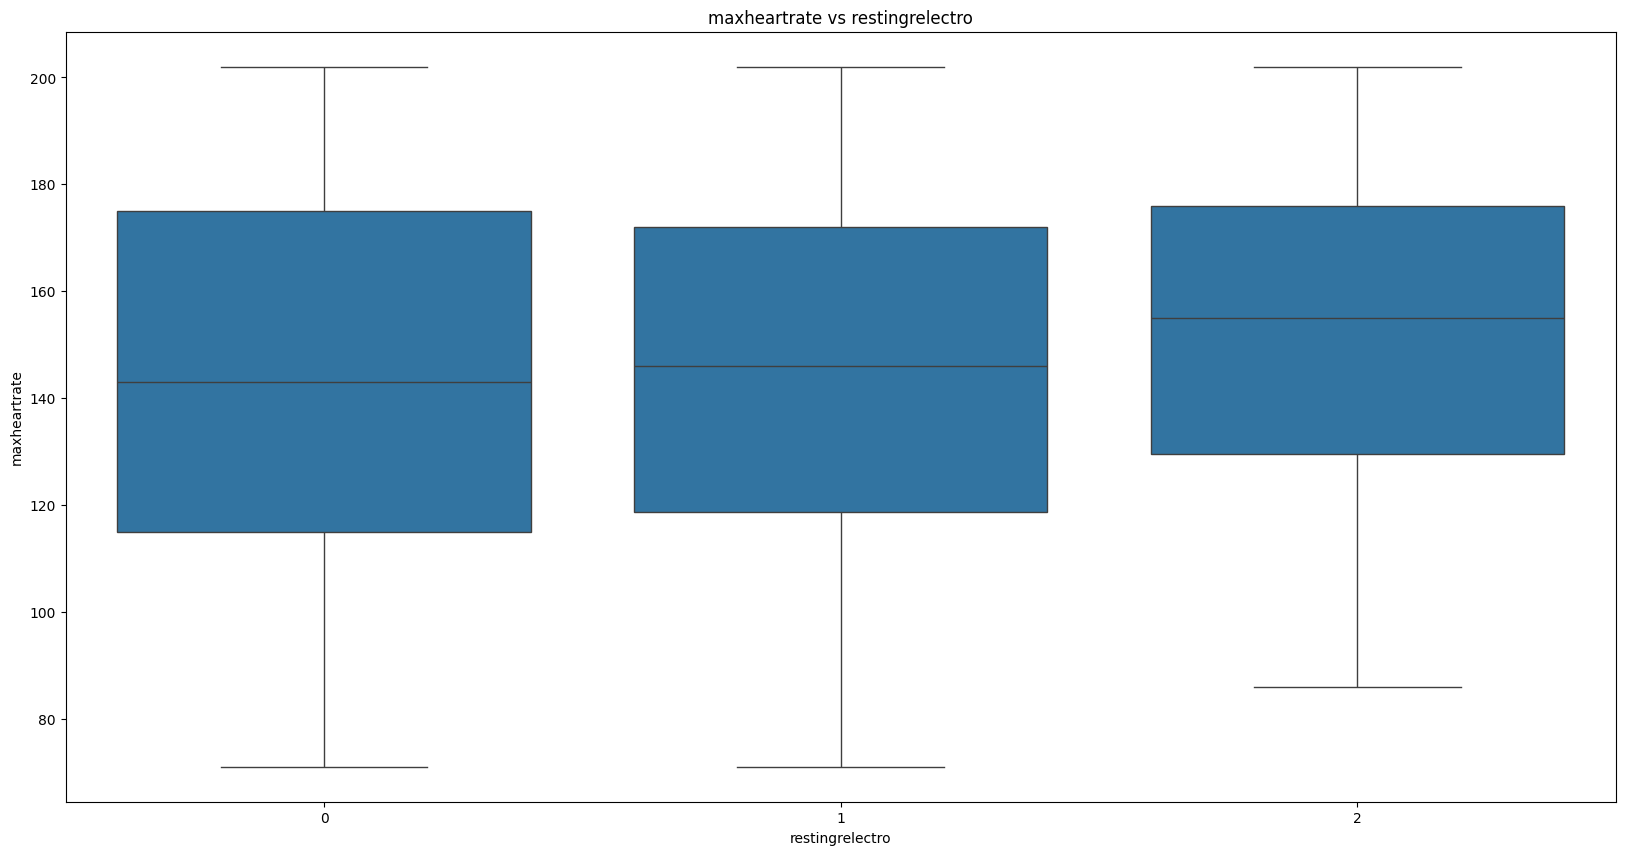

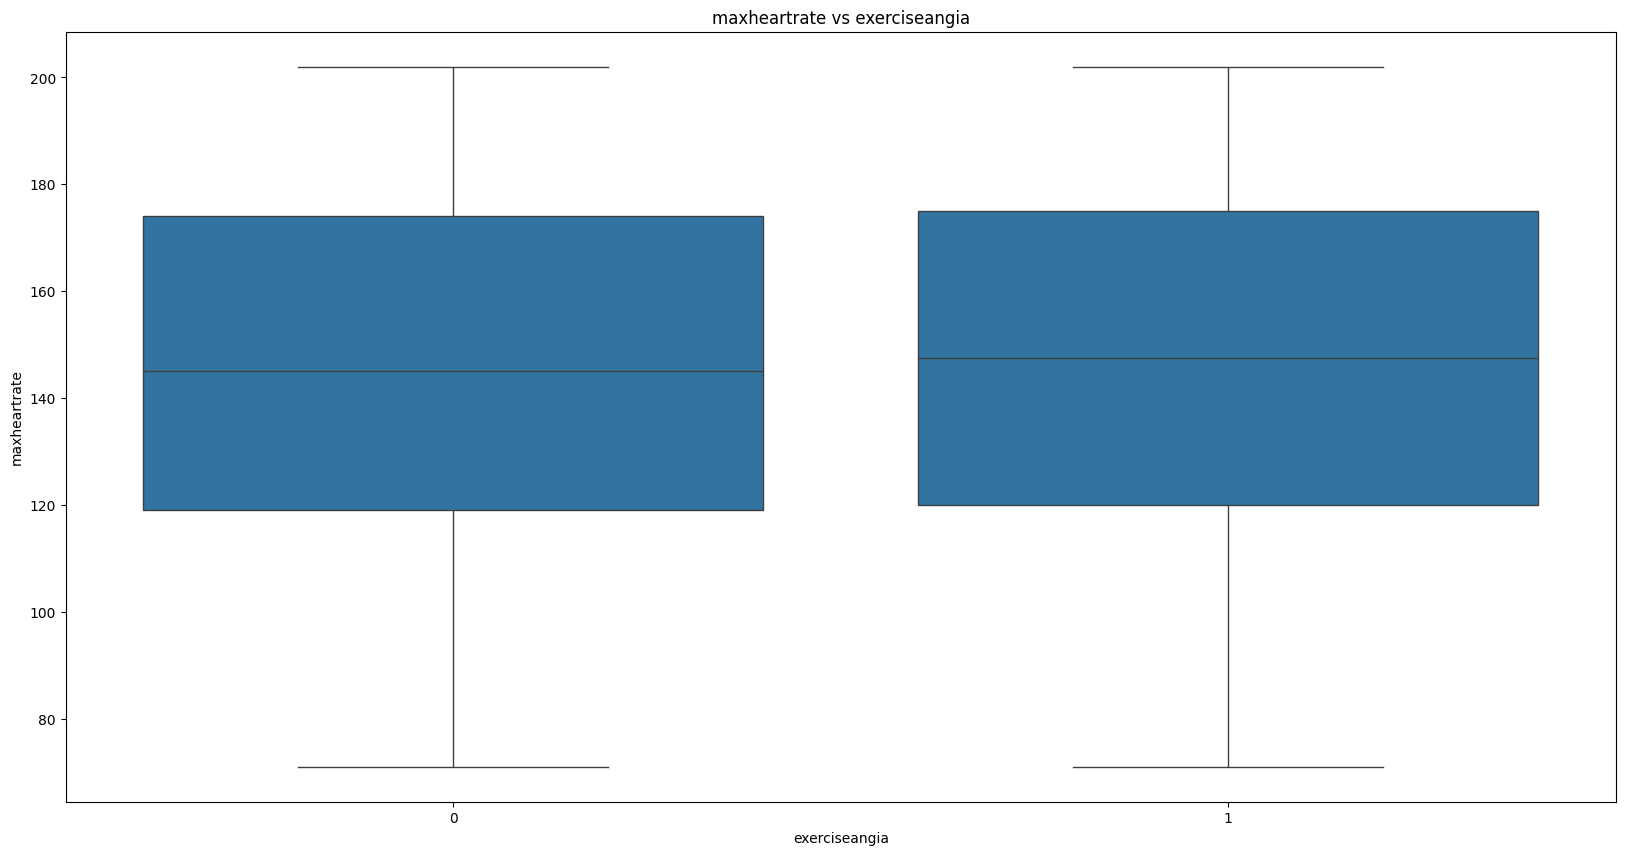

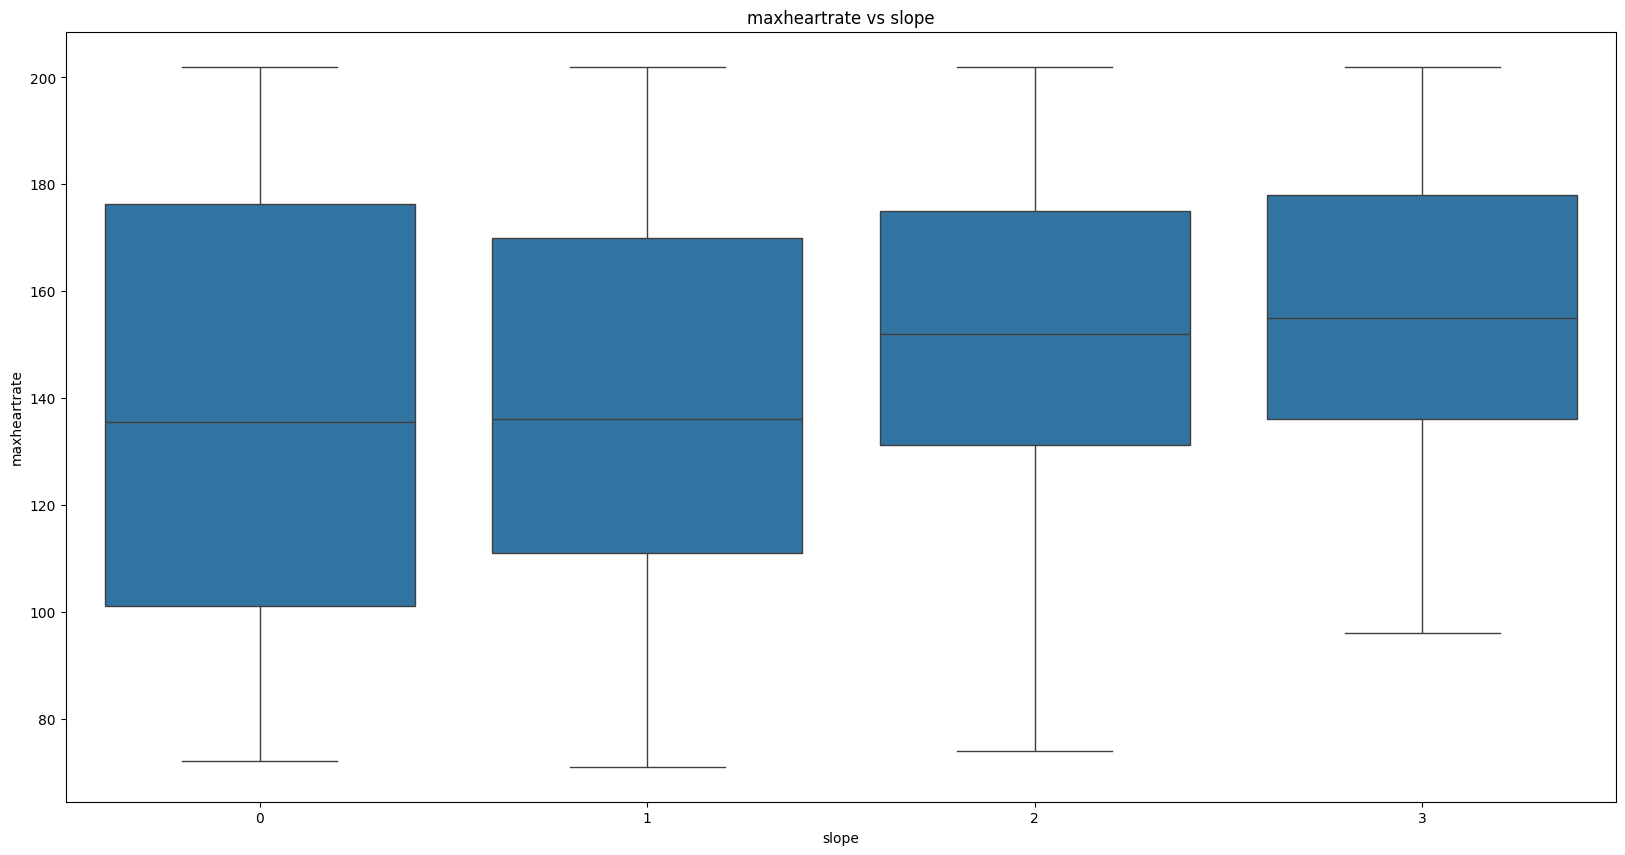

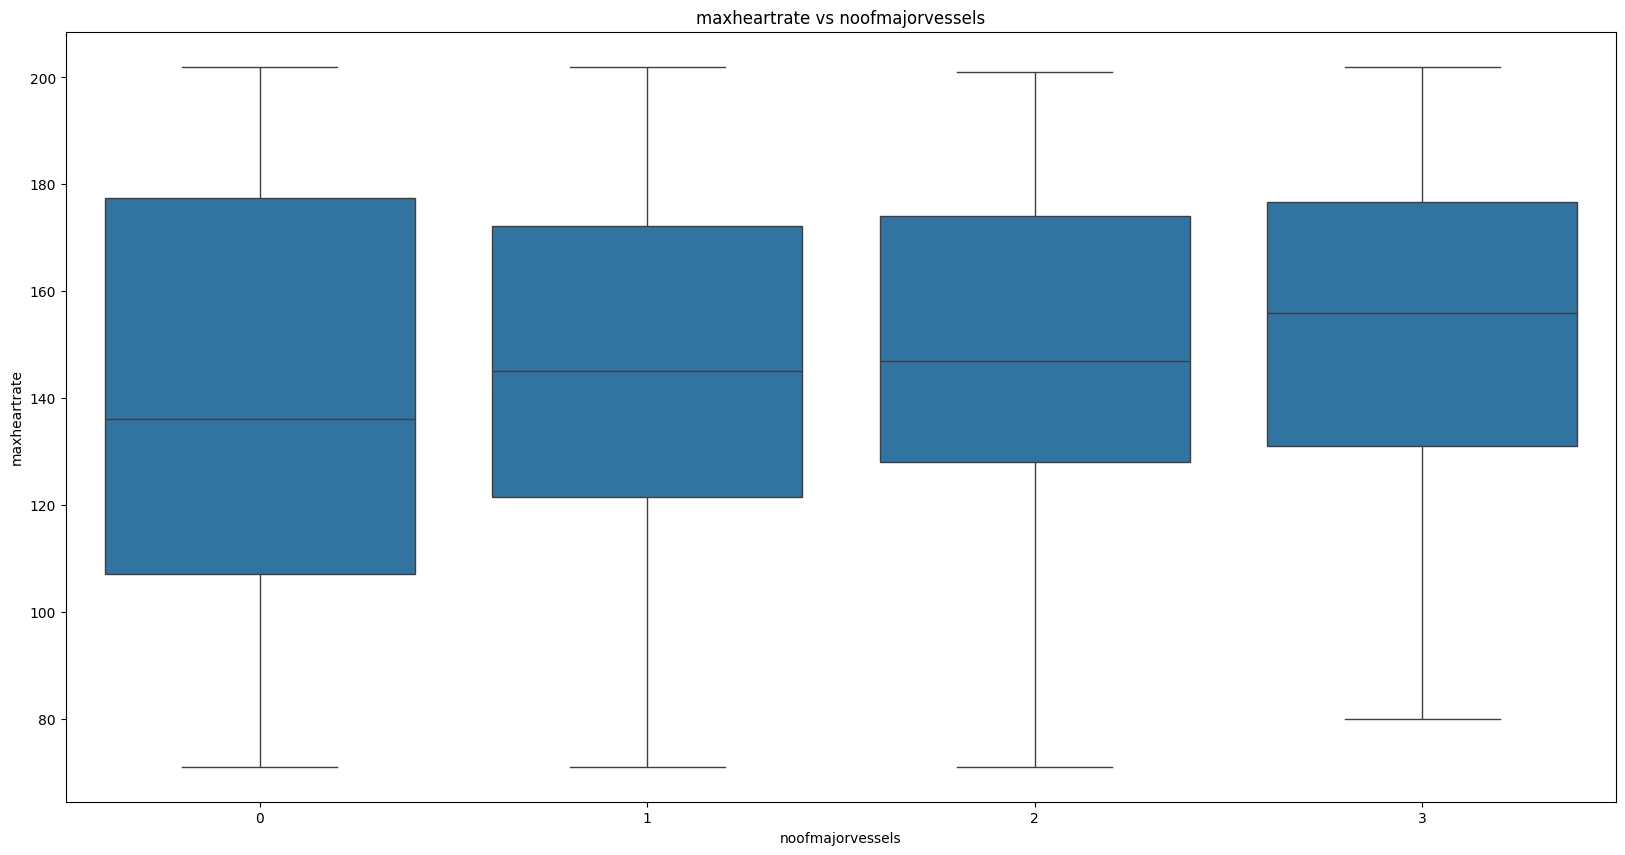

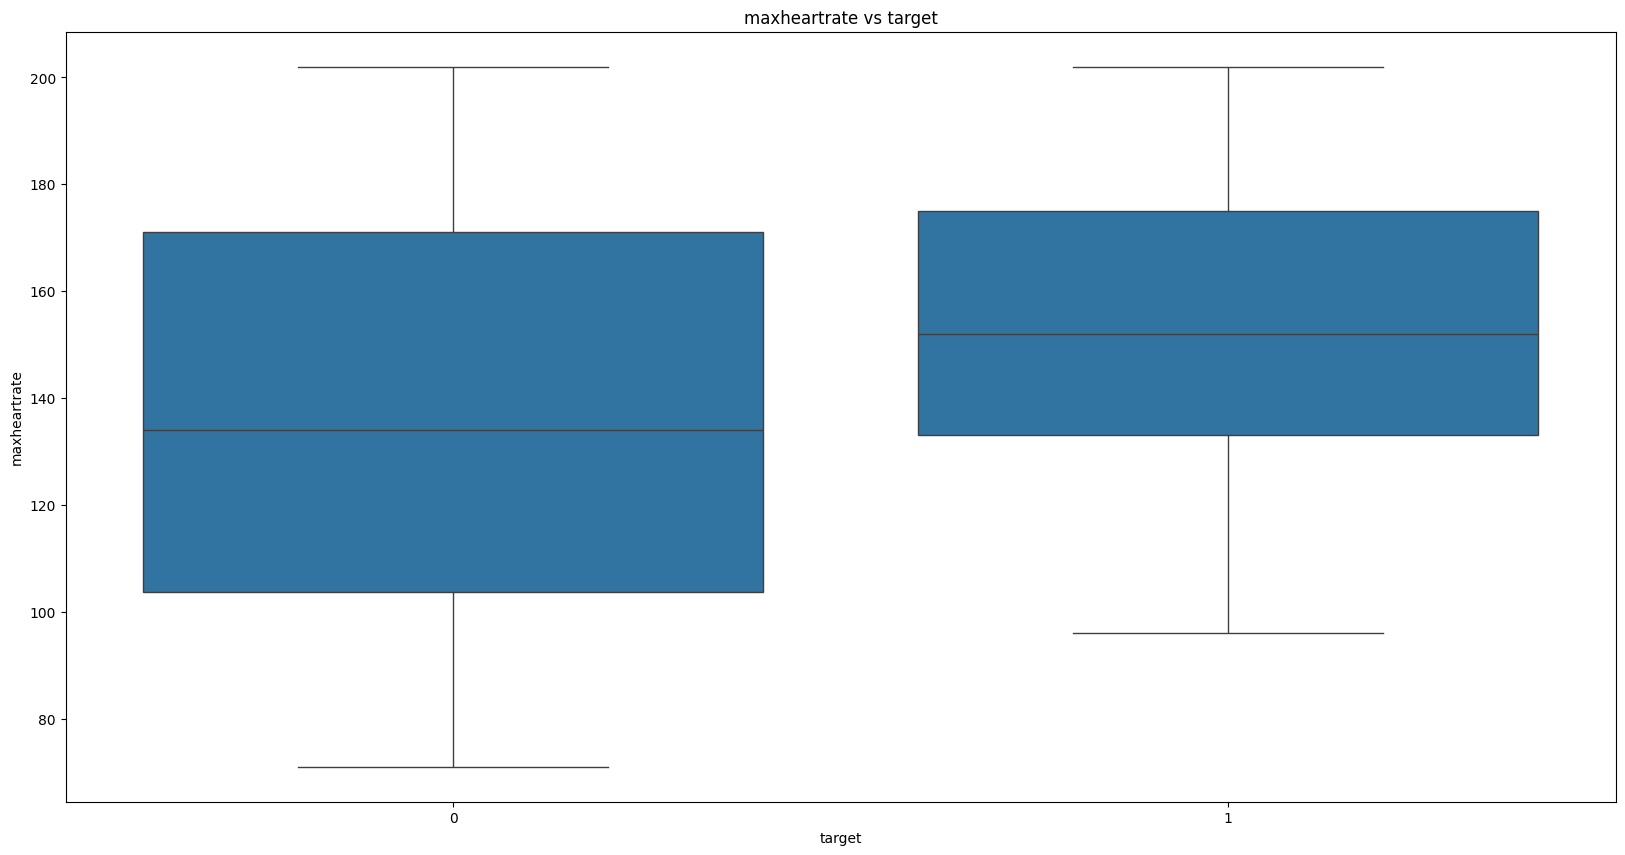

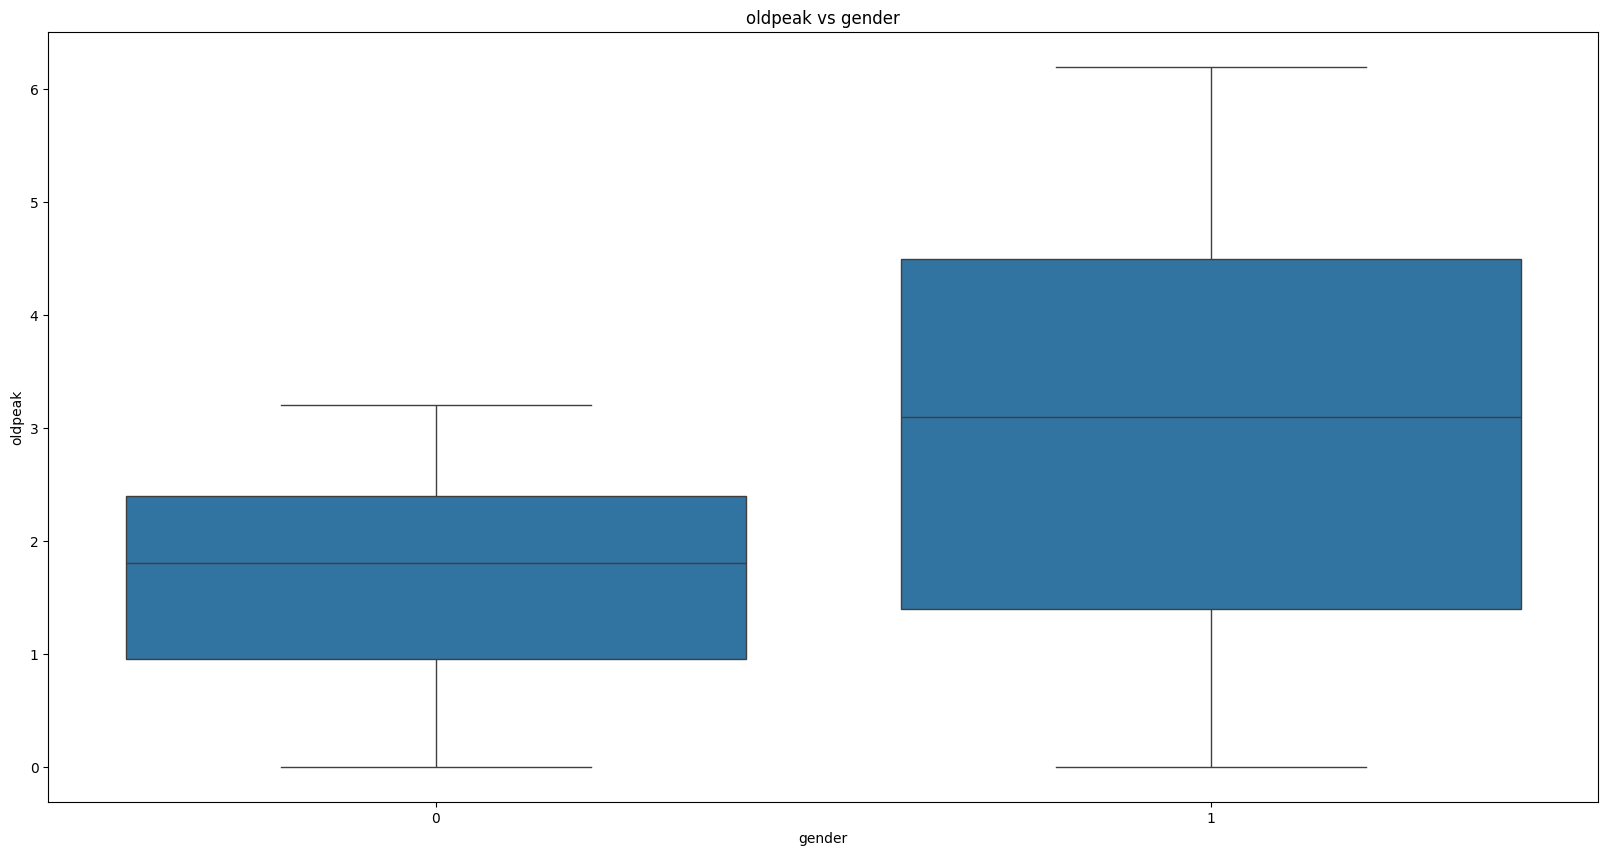

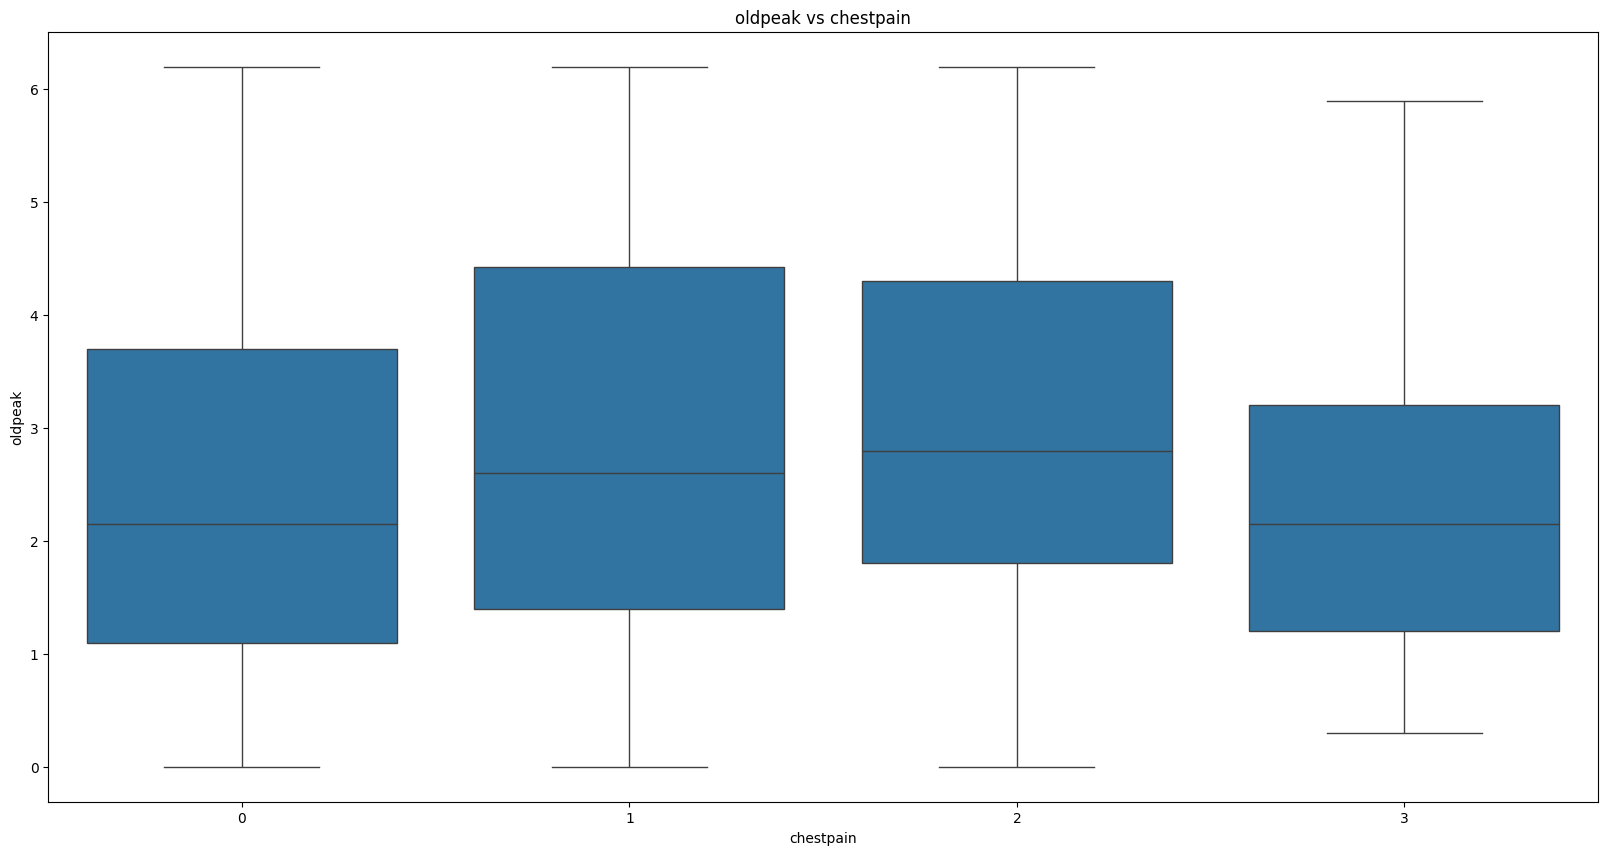

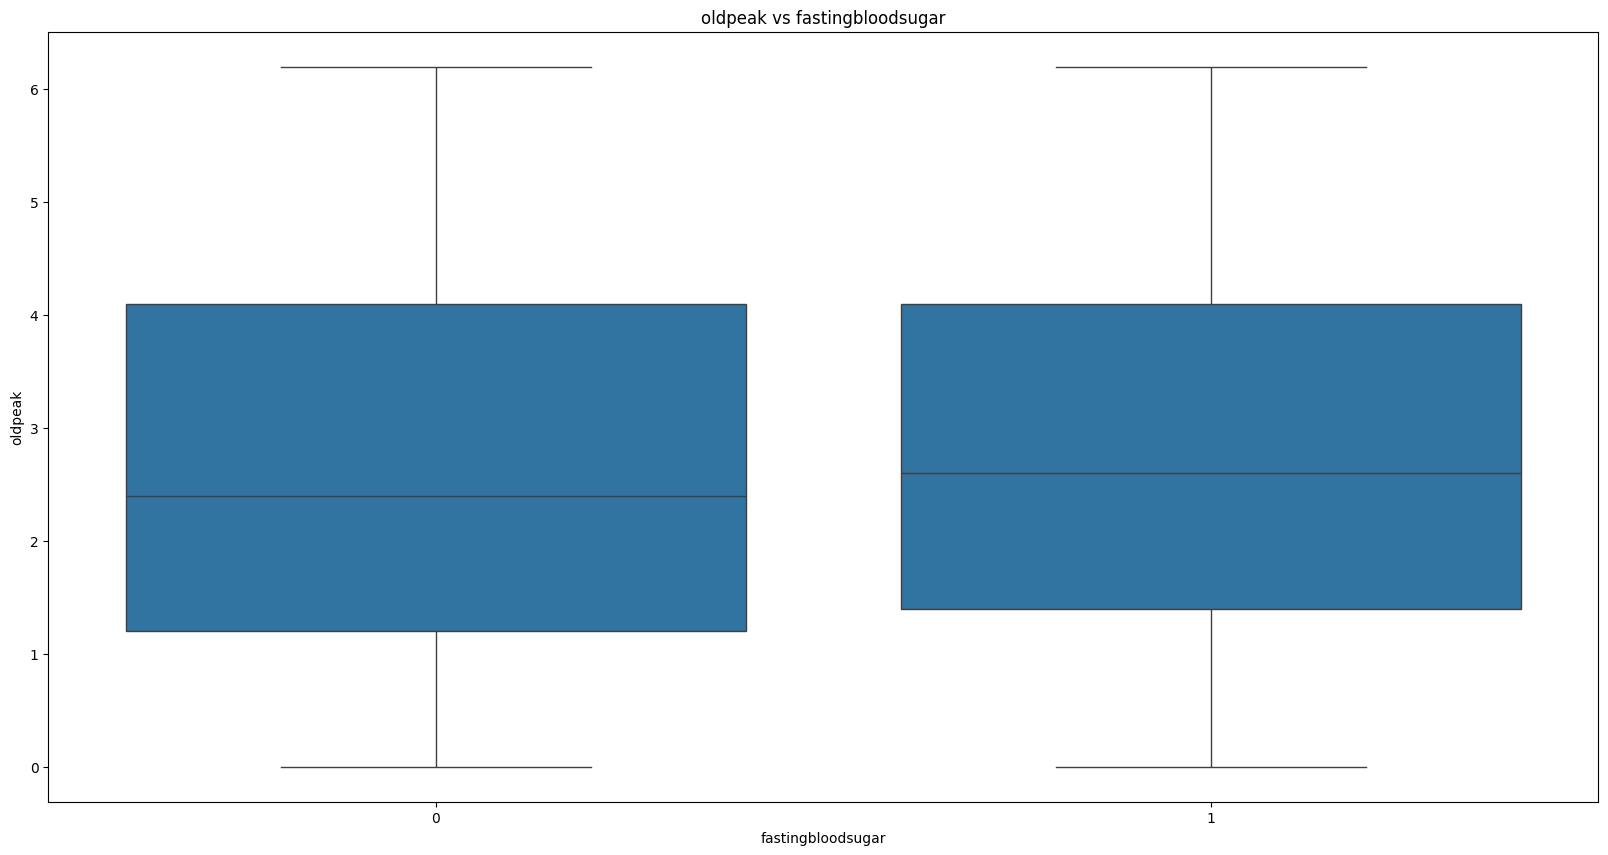

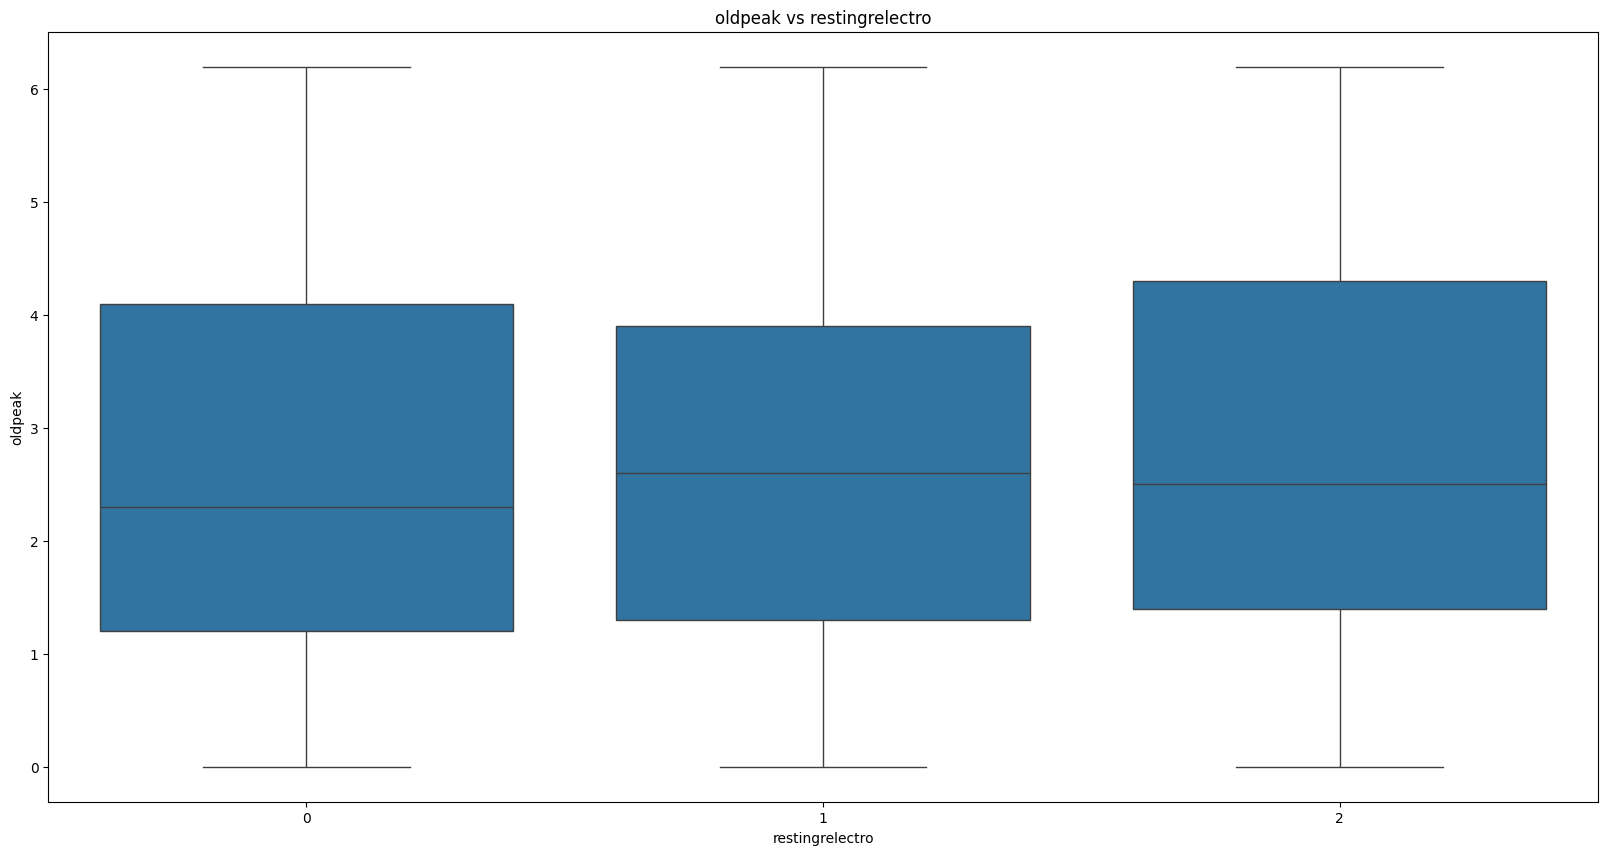

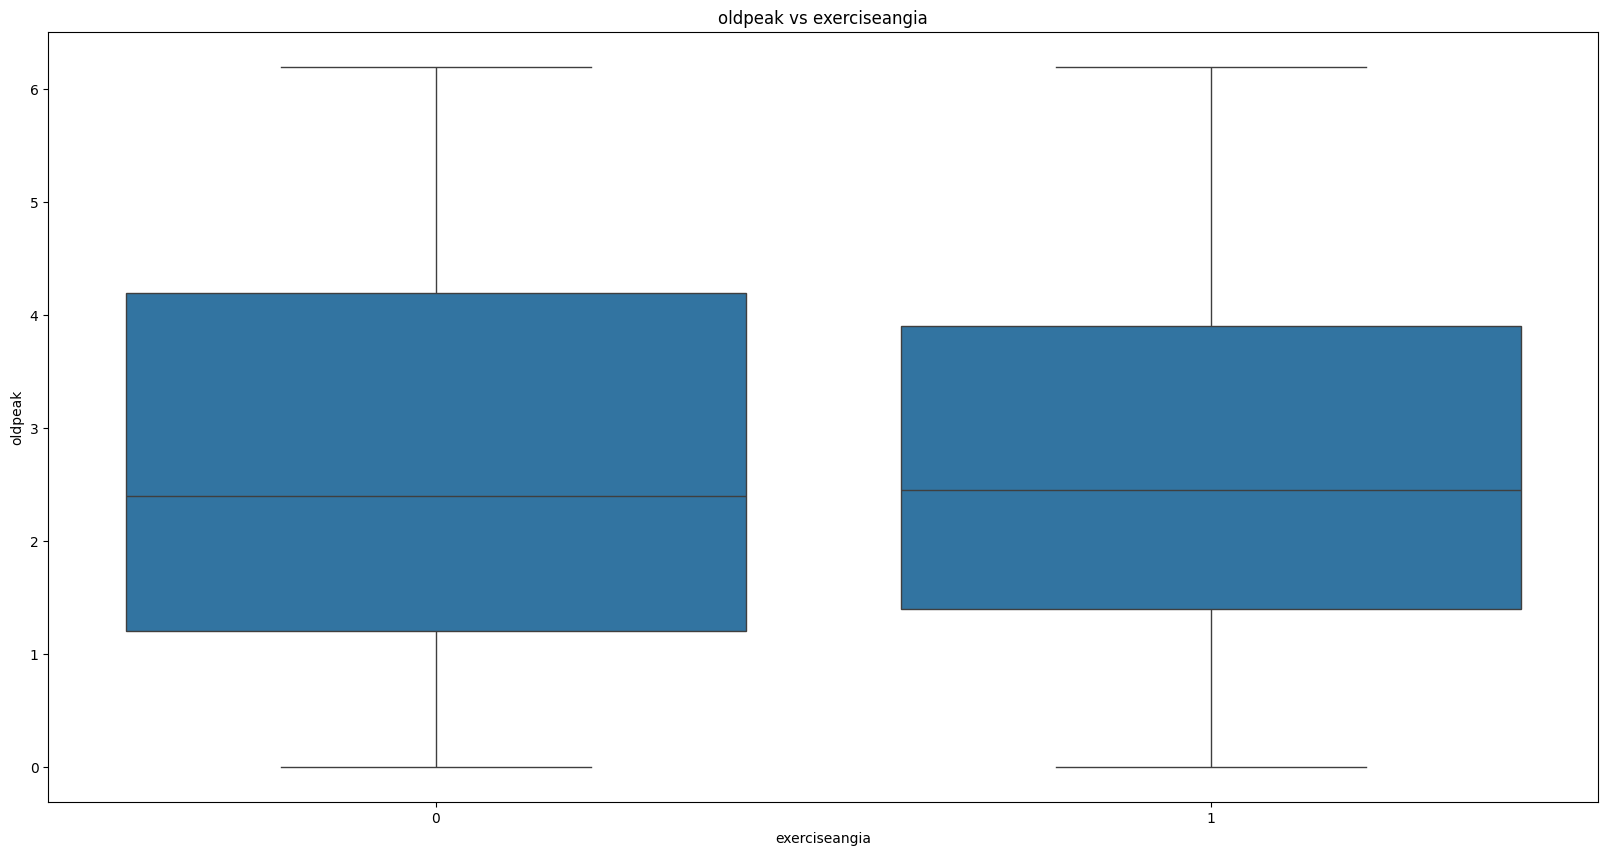

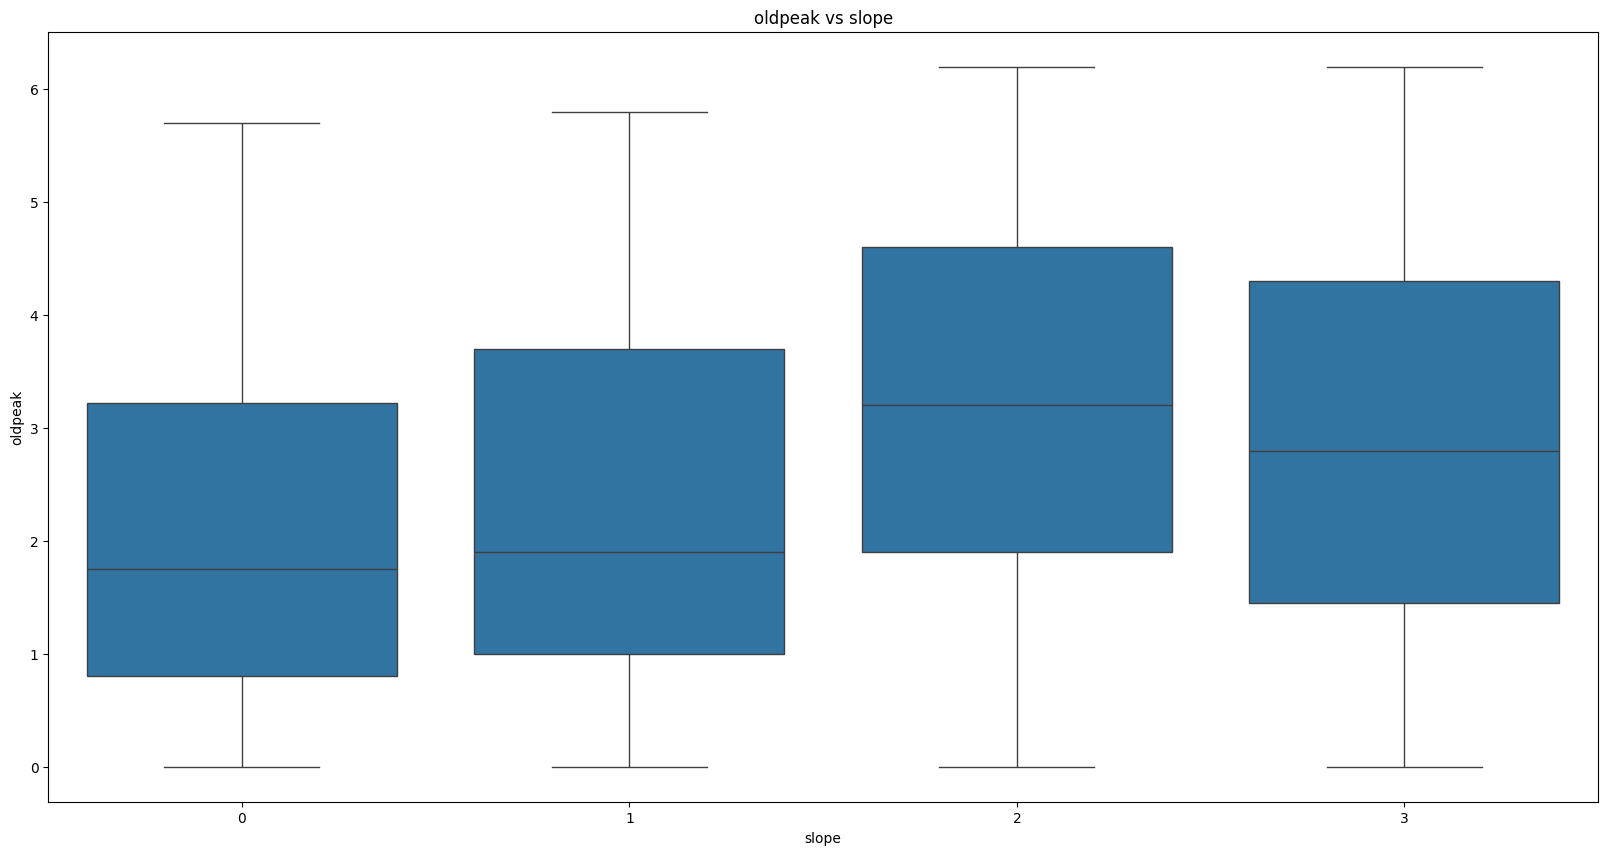

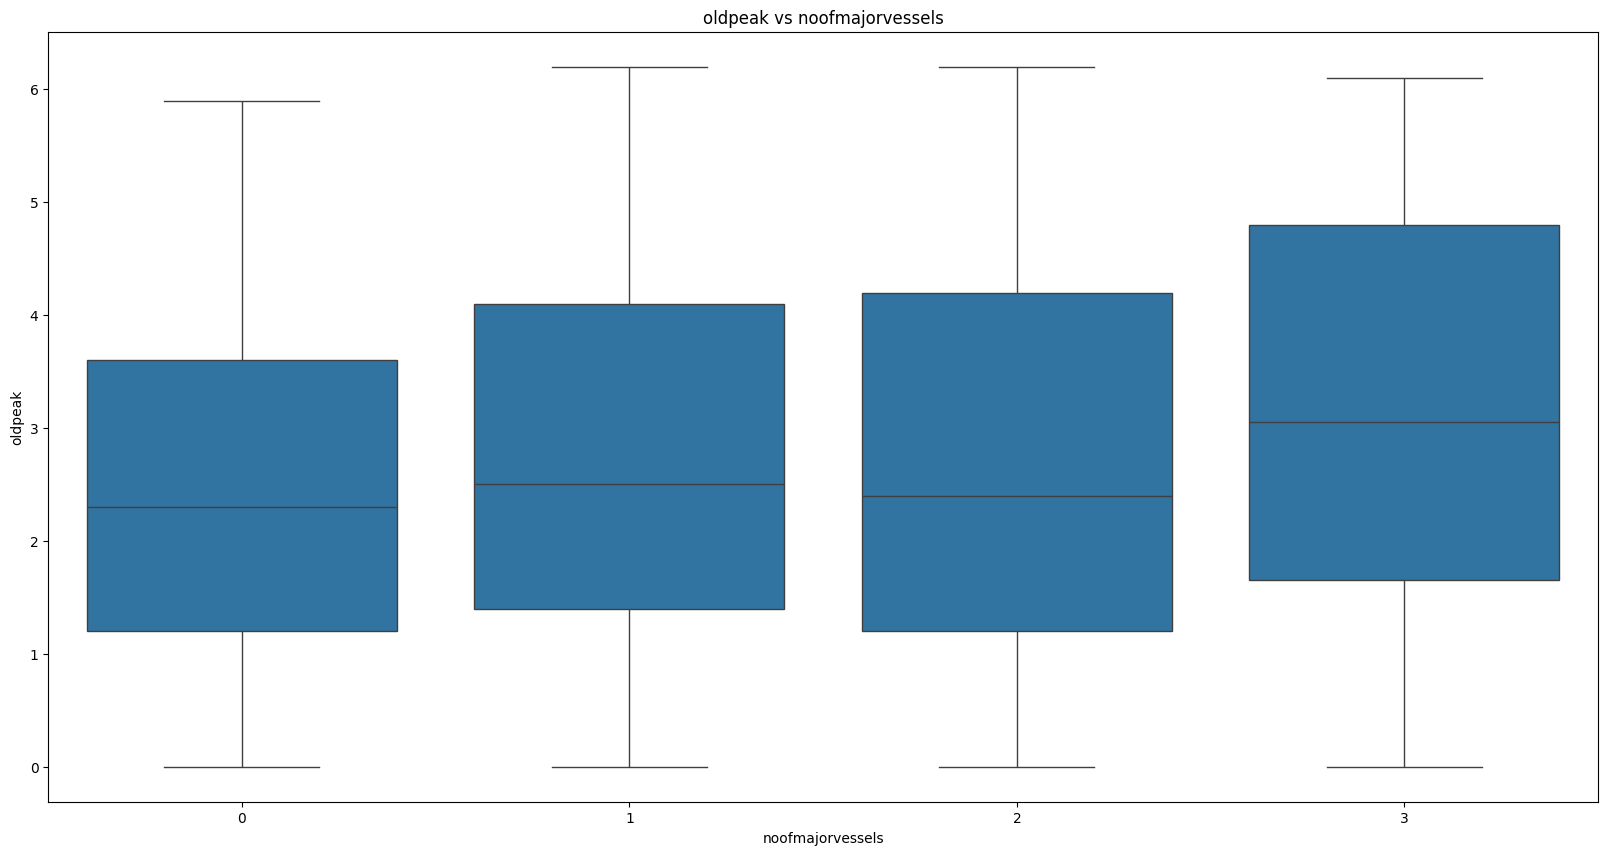

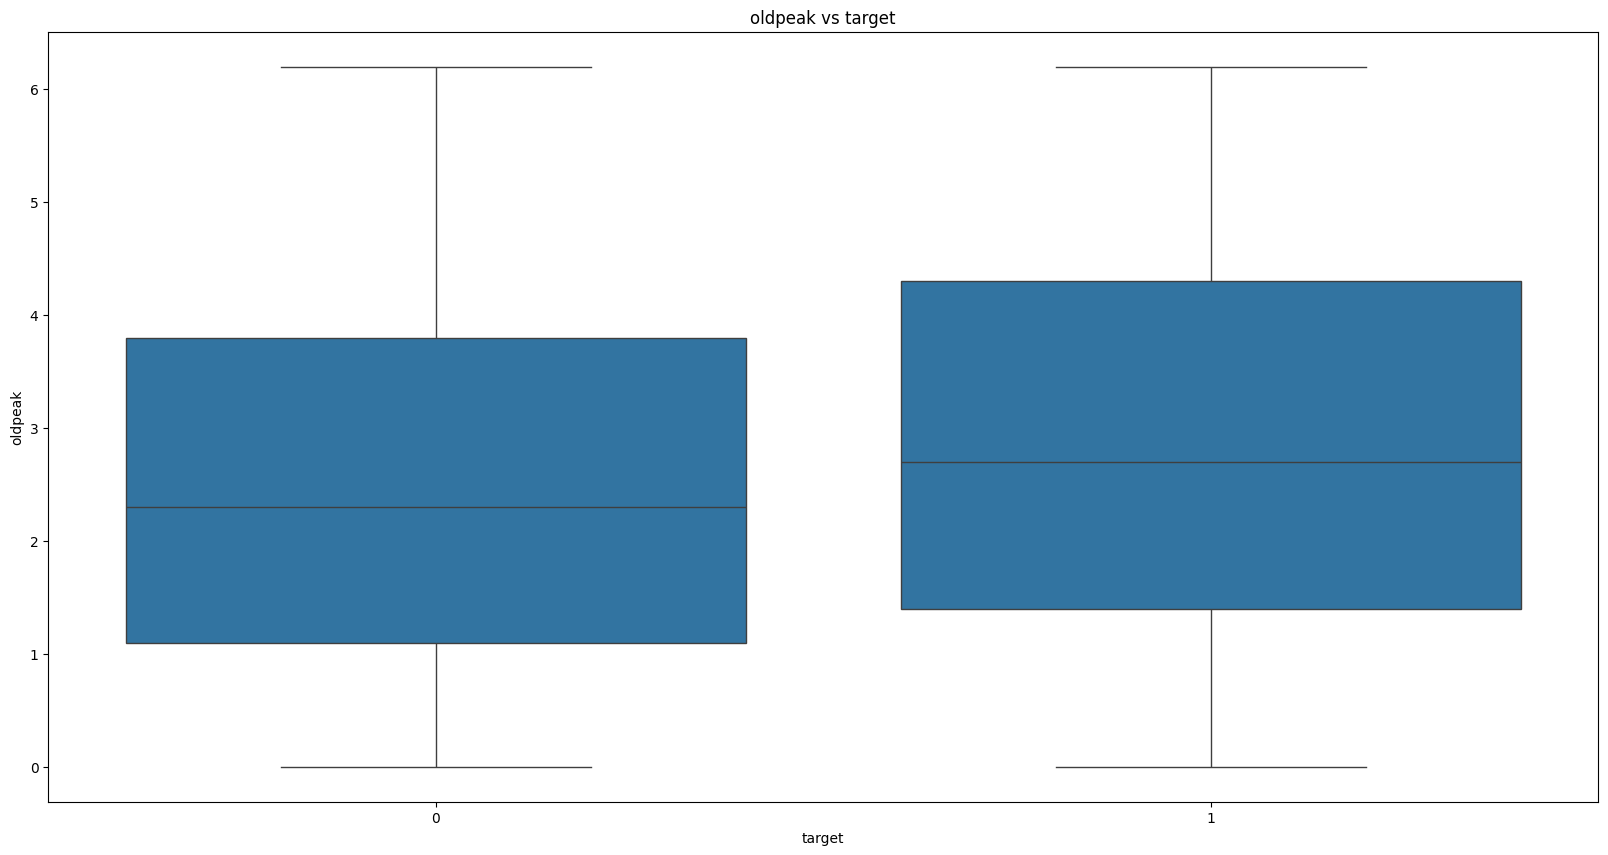

In [15]:
# Identificar columnas numéricas basadas en el umbral de valores únicos
categorical_columns = [col for col in df_cardiovascular_clean.columns if df_cardiovascular_clean[col].nunique() <= threshold]

# Ver la relación entre las variables numéricas y categóricas
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize = (20, 10))
        sns.boxplot(x=cat_col, y=num_col, data=df_cardiovascular_clean)
        plt.title(f'{num_col} vs {cat_col}')
        plt.show()

#### 1.3.3. Relación entre las variables categóricas

En este apartado vamos a ver la relación entre las variables categóricas.



<Figure size 1000x400 with 0 Axes>

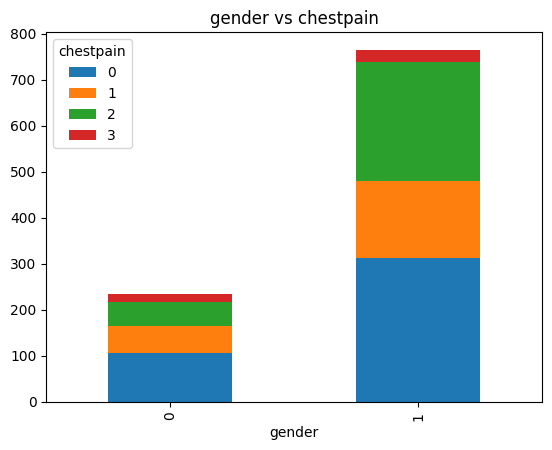

<Figure size 1000x400 with 0 Axes>

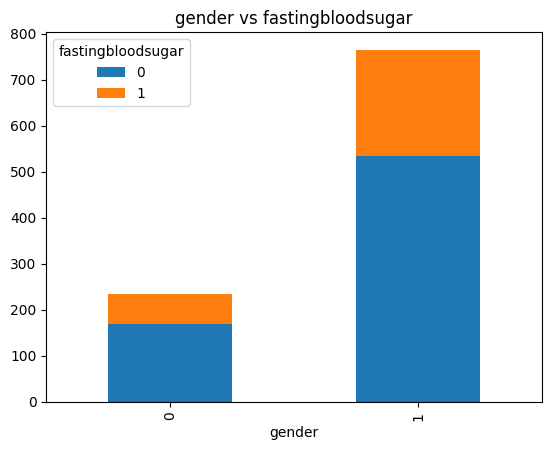

<Figure size 1000x400 with 0 Axes>

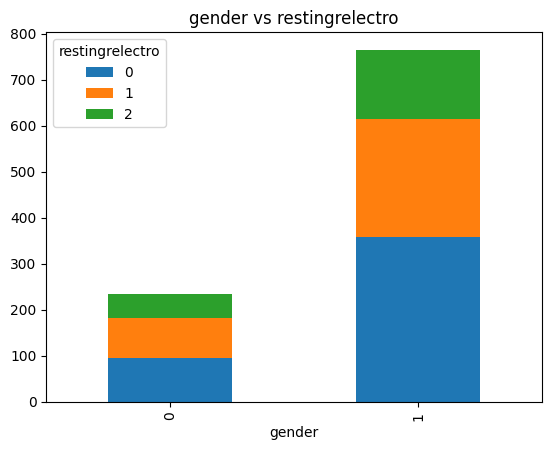

<Figure size 1000x400 with 0 Axes>

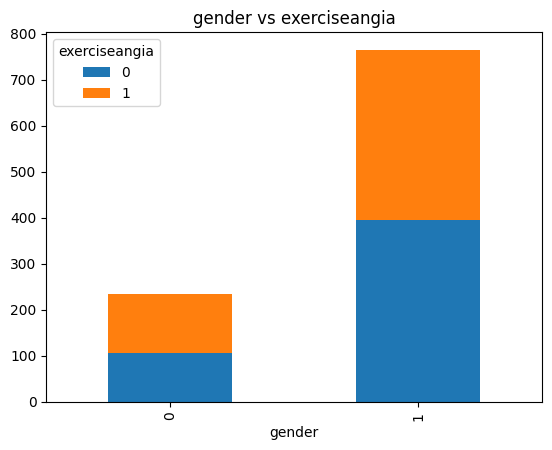

<Figure size 1000x400 with 0 Axes>

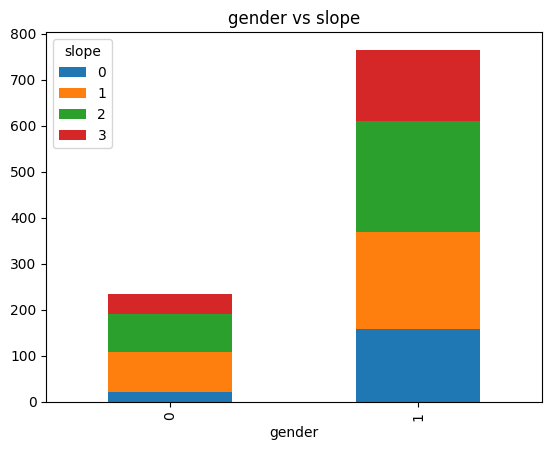

<Figure size 1000x400 with 0 Axes>

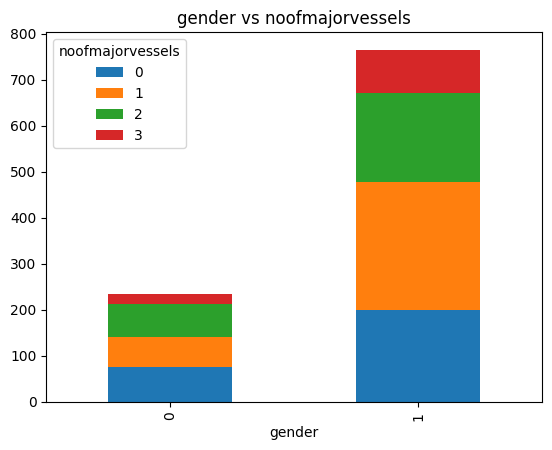

<Figure size 1000x400 with 0 Axes>

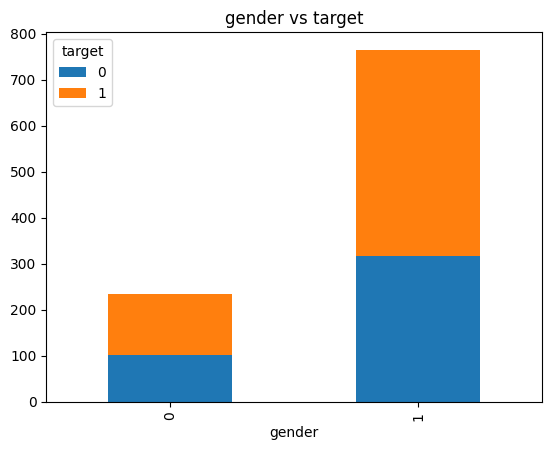

<Figure size 1000x400 with 0 Axes>

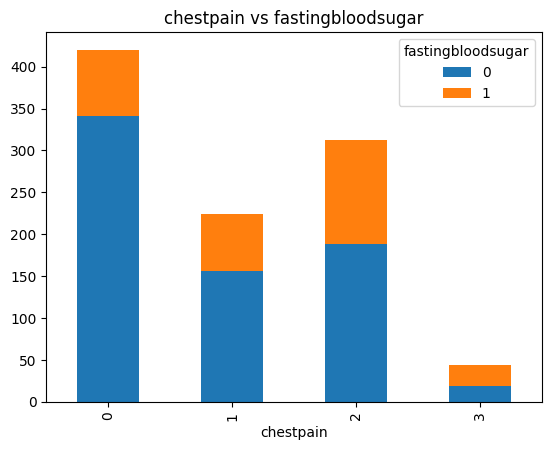

<Figure size 1000x400 with 0 Axes>

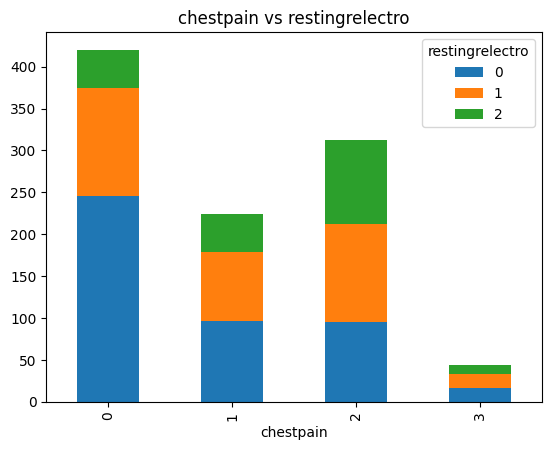

<Figure size 1000x400 with 0 Axes>

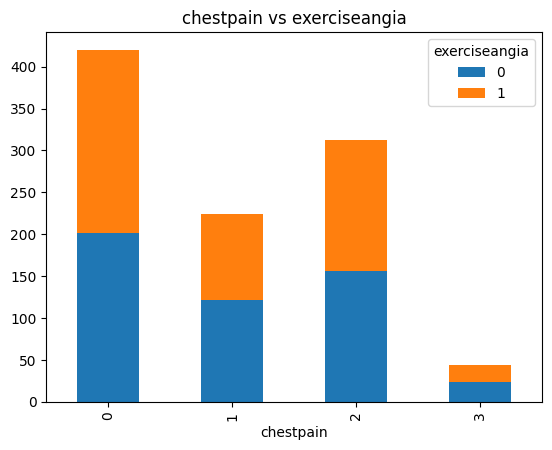

<Figure size 1000x400 with 0 Axes>

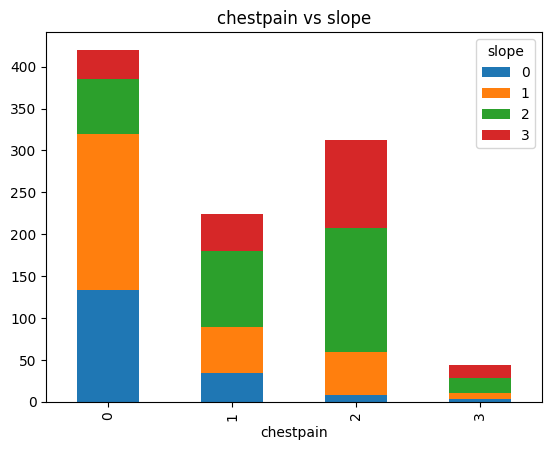

<Figure size 1000x400 with 0 Axes>

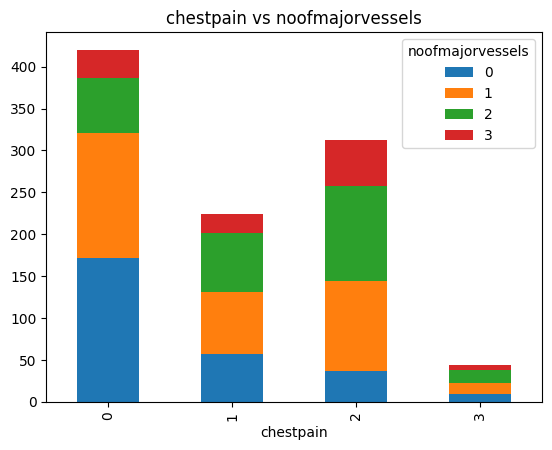

<Figure size 1000x400 with 0 Axes>

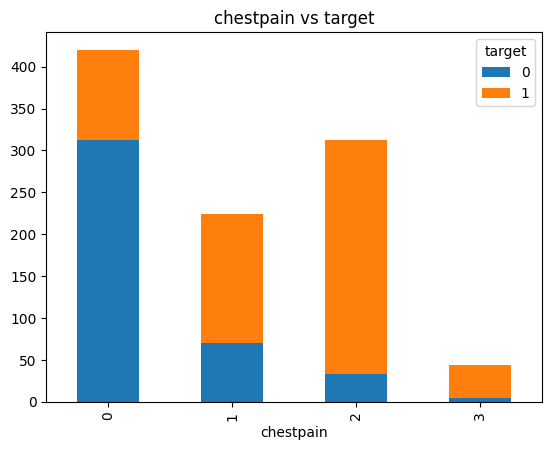

<Figure size 1000x400 with 0 Axes>

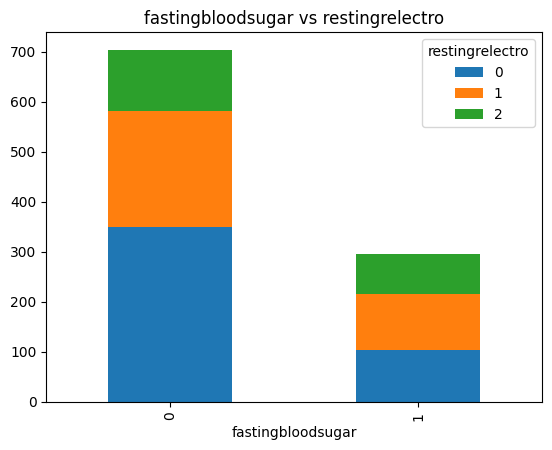

<Figure size 1000x400 with 0 Axes>

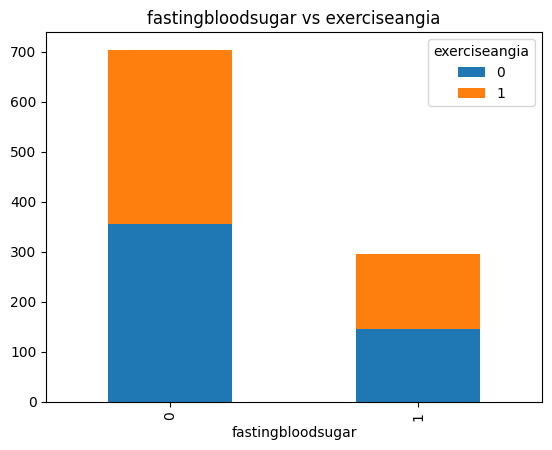

<Figure size 1000x400 with 0 Axes>

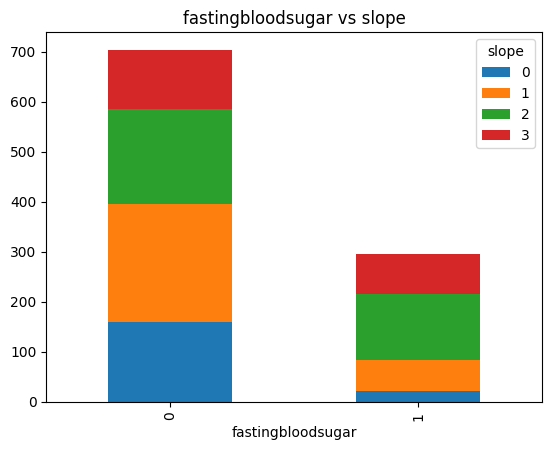

<Figure size 1000x400 with 0 Axes>

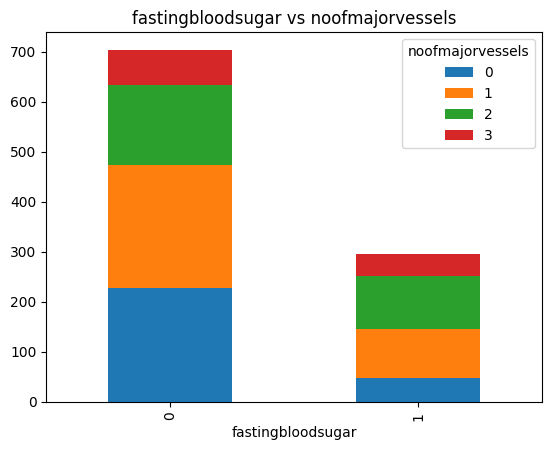

<Figure size 1000x400 with 0 Axes>

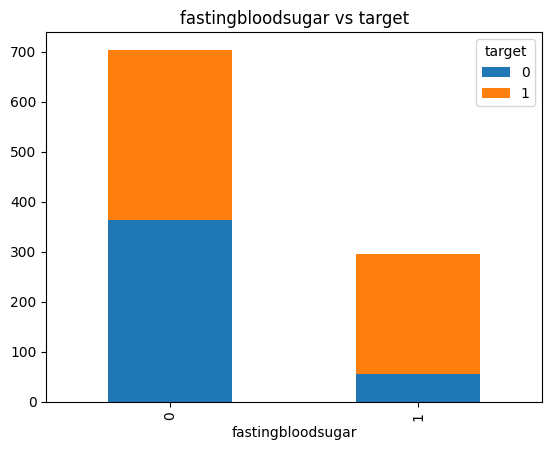

<Figure size 1000x400 with 0 Axes>

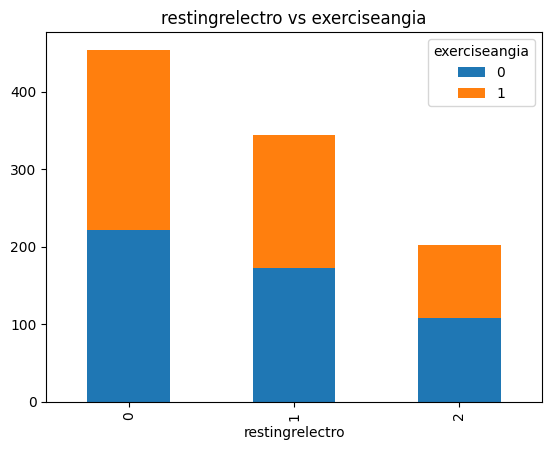

<Figure size 1000x400 with 0 Axes>

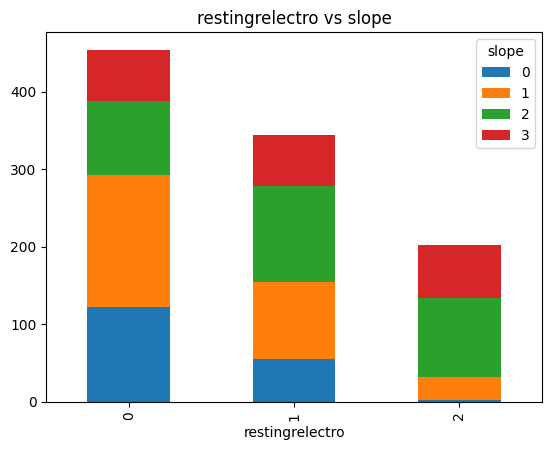

<Figure size 1000x400 with 0 Axes>

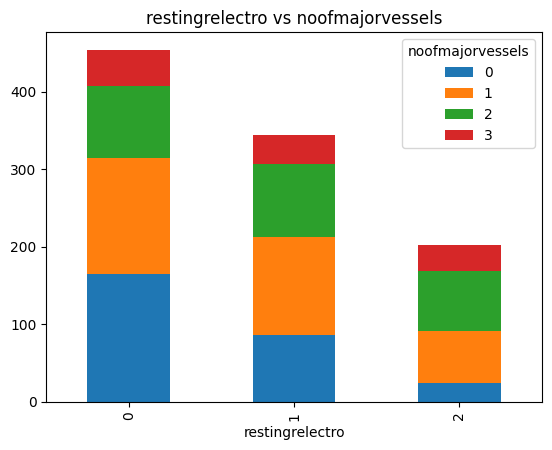

<Figure size 1000x400 with 0 Axes>

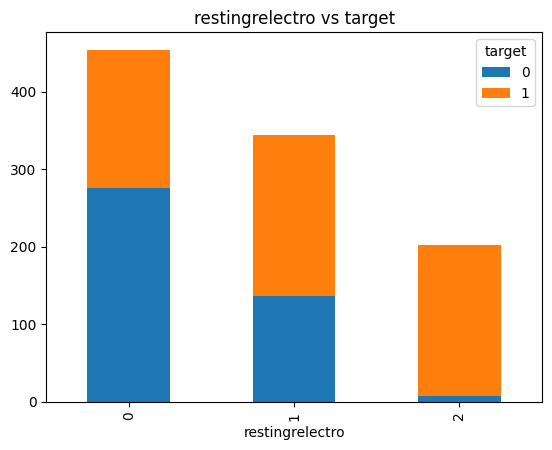

<Figure size 1000x400 with 0 Axes>

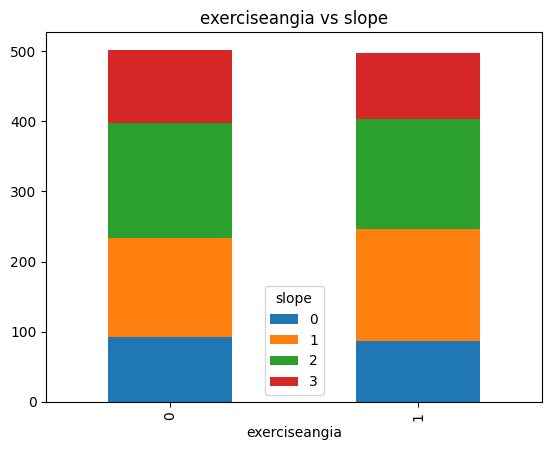

<Figure size 1000x400 with 0 Axes>

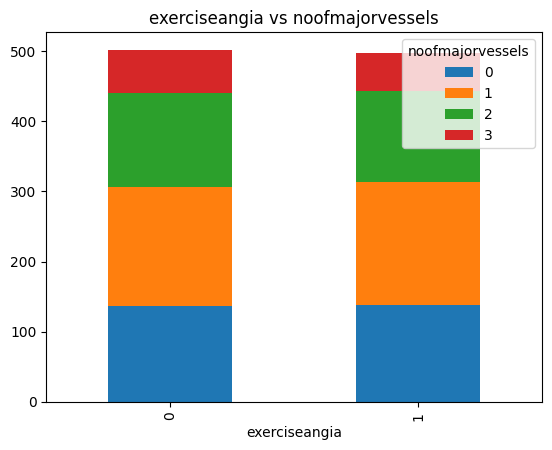

<Figure size 1000x400 with 0 Axes>

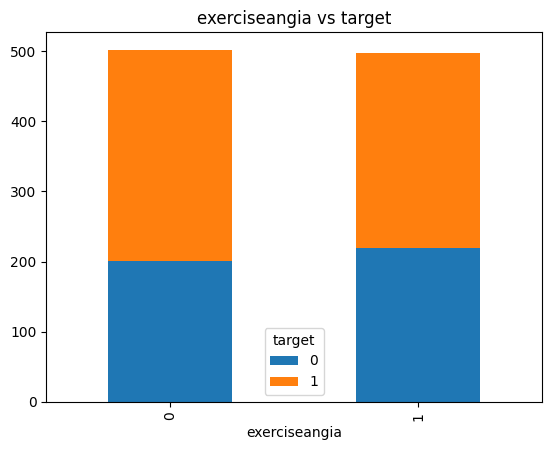

<Figure size 1000x400 with 0 Axes>

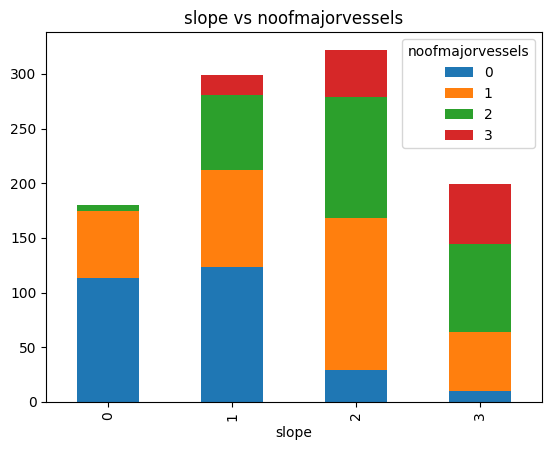

<Figure size 1000x400 with 0 Axes>

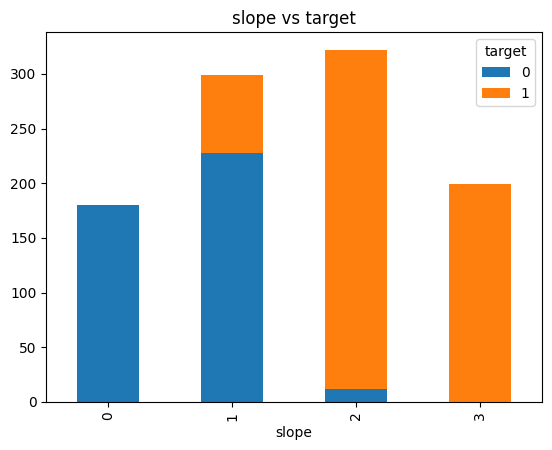

<Figure size 1000x400 with 0 Axes>

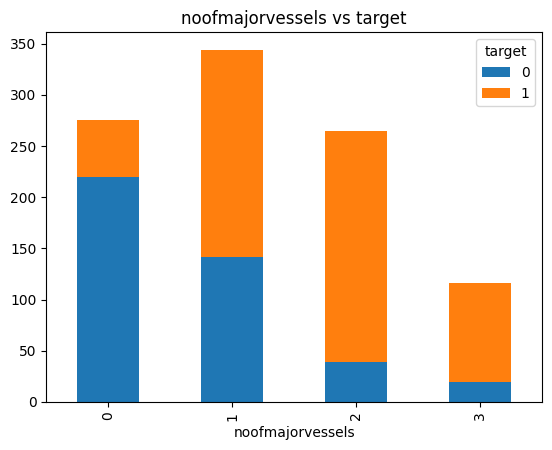

In [16]:
df_cardiovascular_categorical = df_cardiovascular_clean[categorical_columns]

for i, cat_col1 in enumerate(categorical_columns):
    for cat_col2 in categorical_columns[i+1:]:
        plt.figure(figsize=(10, 4))
        contingency_table = pd.crosstab(df_cardiovascular_categorical[cat_col1], df_cardiovascular_categorical[cat_col2])
        contingency_table.plot(kind='bar', stacked=True)
        plt.title(f'{cat_col1} vs {cat_col2}')
        plt.show()

### 1.4. Dividimos el dataset en train y test

En este apartado vamos a dividir el dataset en train y test.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_cardiovascular_clean.drop(columns=['target']),
    df_cardiovascular_clean['target'],
    test_size = 0.2,
    random_state = rn_state
)

## 2. Aplicación de algunos modelos de clasificación


### 2.1. Decission Tree

En este apartado vamos a aplicar un modelo de clasificación basado en árboles de decisión.

In [18]:
from sklearn import tree

DT = tree.DecisionTreeClassifier(random_state=rn_state)
DT.fit(X_train, y_train)

# Imprimimos el accuracy
print('Accuracy en entrenamiento %.2f'%DT.score(X_train,y_train))
print('Accuracy en test %.2f'%DT.score(X_test,y_test))

Accuracy en entrenamiento 1.00
Accuracy en test 0.96


Tenemos un accuracy perfecto en el entrenamiento y muy alto en el test con lo cual el modelo no suele cometer muchos errores a la hora de clasificar la enfermedad.

Vamos a visualizar el árbol de decisión.

[Text(0.4879032258064516, 0.9545454545454546, 'slope <= 1.5\ngini = 0.488\nsamples = 800\nvalue = [337, 463]\nclass = Presencia Enfermedad'),
 Text(0.25806451612903225, 0.8636363636363636, 'restingBP <= 159.0\ngini = 0.256\nsamples = 385\nvalue = [327, 58]\nclass = Ausencia Enfermedad'),
 Text(0.12903225806451613, 0.7727272727272727, 'serumcholestrol <= 467.0\ngini = 0.097\nsamples = 295\nvalue = [280.0, 15.0]\nclass = Ausencia Enfermedad'),
 Text(0.0967741935483871, 0.6818181818181818, 'serumcholestrol <= 66.0\ngini = 0.06\nsamples = 289\nvalue = [280, 9]\nclass = Ausencia Enfermedad'),
 Text(0.06451612903225806, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Presencia Enfermedad'),
 Text(0.12903225806451613, 0.5909090909090909, 'chestpain <= 1.5\ngini = 0.048\nsamples = 287\nvalue = [280, 7]\nclass = Ausencia Enfermedad'),
 Text(0.06451612903225806, 0.5, 'restingrelectro <= 1.5\ngini = 0.008\nsamples = 258\nvalue = [257, 1]\nclass = Ausencia Enfermedad'),
 Text

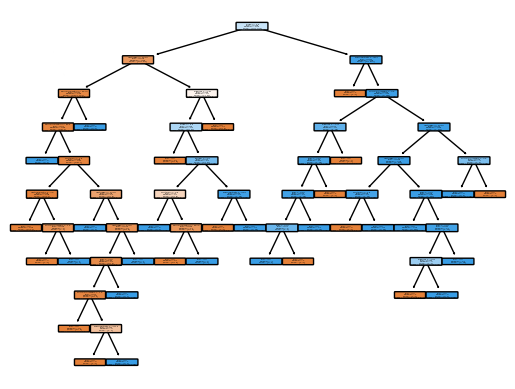

In [19]:
# Imprimimos el arbol de decisión
tree.plot_tree(DT,
               feature_names=X_train.columns,
               class_names=['Ausencia Enfermedad', 'Presencia Enfermedad'],
               filled=True,
               rounded=True)

Comprobamos el resto de métricas del modelo.

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_predicted = DT.predict(X_test)
print('precision: %2f'%precision_score(y_test,y_predicted))
print('recall: %2f'%recall_score(y_test,y_predicted))
print('f1: %2f'%f1_score(y_test,y_predicted))

precision: 0.950820
recall: 0.991453
f1: 0.970711


Tenemos una precisión alta y un recall alto. Lo que nos indica que suele detectar muy bien si alguien está enfermo o no. De todas formas lo visualizamos mejor con una matriz de confusión.

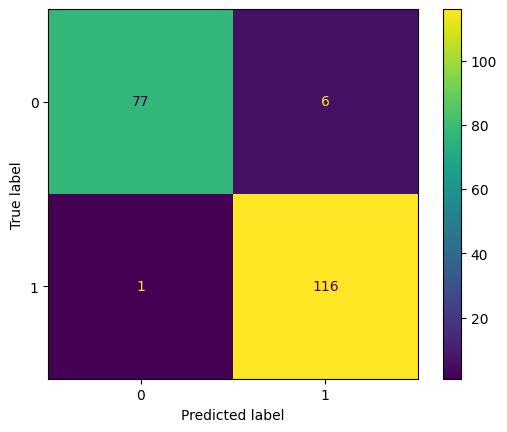

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predicted, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot()
plt.show()

### 2.2. Random Forest

En este apartado vamos a aplicar un modelo de clasificación basado en árboles de decisión.

In [23]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=rn_state)
RF.fit(X_train, y_train)
y_predicted = RF.predict(X_test)
print('test accuracy %.2f'%RF.score(X_test,y_test))
print('test precision: %2f'%precision_score(y_test,y_predicted))
print('test recall: %2f'%recall_score(y_test,y_predicted))
print('test f1: %2f'%f1_score(y_test,y_predicted))

test accuracy 0.99
test precision: 0.983193
test recall: 1.000000
test f1: 0.991525


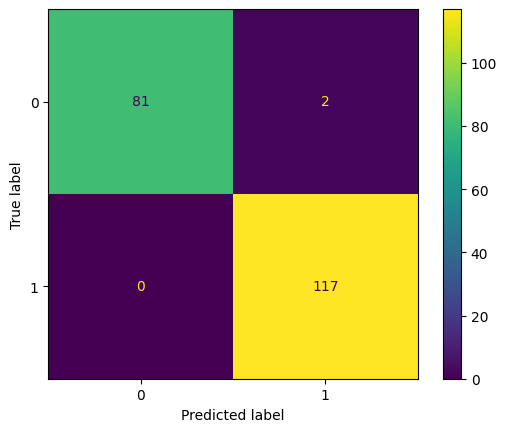

In [24]:
cm_rf = confusion_matrix(y_test, y_predicted, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=RF.classes_)
disp.plot()
plt.show()

No hay mucha diferencia entre el RandomForest y el DecissionTree por lo que se puede apreciar en las métricas. 

Para nuestro problema de aplicación es mejor ya que no clasifica ningún paciente con enfermedad como paciente sano, con lo cual mejora en ese aspecto con respecto al modelo anterior.

## 3. Conclusiones

- El modelo de Decision Tree, aunque clasifica muy bien por lo que hemos podido observar, da algunos falsos negativos que es lo que no nos interesa en este caso.
- El modelo de Random Forest, consigue optimizar la clasificación de manera que a priori no nos da falsos negativos, con lo cual éste sería el modelo a usar para este problema.